In [1]:
import pandas as pd
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal
from statsmodels.stats.weightstats import ttest_ind
micron_conv = 0.01537697 
import matplotlib.pyplot as plt

In [2]:
#read in data
exp_718 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\07182024_master_sheet.csv')
exp_314 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\03142024_master_sheet.csv')
exp_429 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\04292024_master_sheet.csv')
exp_506 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\05062024_master_sheet.csv')

#exclude data where nuclear_are is greater than cell_area and nuclear_area is one
exp_718 = exp_718.drop(exp_718[exp_718['Nuclear_Area (pixels)'] >= exp_718['Cell_Area (pixels)']].index)
exp_314 = exp_314.drop(exp_314[exp_314['Nuclear_Area (pixels)'] >= exp_314['Cell_Area (pixels)']].index)
exp_429 = exp_429.drop(exp_429[exp_429['Nuclear_Area (pixels)'] >= exp_429['Cell_Area (pixels)']].index)
exp_506 = exp_506.drop(exp_506[exp_506['Nuclear_Area (pixels)'] >= exp_506['Cell_Area (pixels)']].index)
exp_718 = exp_718.drop(exp_718[exp_718['Nuclear_Area (pixels)'] == 1].index)
exp_314 = exp_314.drop(exp_314[exp_314['Nuclear_Area (pixels)'] == 1].index)
exp_429 = exp_429.drop(exp_429[exp_429['Nuclear_Area (pixels)'] == 1].index)
exp_506 = exp_506.drop(exp_506[exp_506['Nuclear_Area (pixels)'] == 1].index)

#convert areas to square microns
exp_718["Cell_Area (pixels)"] = exp_718["Cell_Area (pixels)"] * micron_conv
exp_718["Nuclear_Area (pixels)"] = exp_718["Nuclear_Area (pixels)"] * micron_conv
exp_314["Cell_Area (pixels)"] = exp_314["Cell_Area (pixels)"] * micron_conv
exp_314["Nuclear_Area (pixels)"] = exp_314["Nuclear_Area (pixels)"] * micron_conv
exp_429["Cell_Area (pixels)"] = exp_429["Cell_Area (pixels)"] * micron_conv
exp_429["Nuclear_Area (pixels)"] = exp_429["Nuclear_Area (pixels)"] * micron_conv
exp_506["Cell_Area (pixels)"] = exp_506["Cell_Area (pixels)"] * micron_conv
exp_506["Nuclear_Area (pixels)"] = exp_506["Nuclear_Area (pixels)"] * micron_conv

#rename bio rep and strain
exp_718["Bio rep"] = exp_718.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_314["Bio rep"] = exp_314.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_429["Bio rep"] = exp_429.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_506["Bio rep"] = exp_506.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_718["strain"] = exp_718.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
exp_314["strain"] = exp_314.apply(lambda x: x["Nuclei_File"][:-24], axis = 1)
exp_429["strain"] = exp_429.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
exp_506["strain"] = exp_506.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
#CA_718["Bio rep"] = 'CA_' + CA_718["Bio rep"]

#group bio reps 
CA_bioreps_718 = exp_718.groupby('Bio rep').agg("Cell_Area (pixels)")#.agg({"Cell_Area (pixels)": lambda x: list(x)})
NA_bioreps_718 = exp_718.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_718 = exp_718.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_718 = exp_718.groupby('Bio rep').agg("circ.")
eccen_bioreps_718 = exp_718.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_314 = exp_314.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_314 = exp_314.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_314 = exp_314.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_314 = exp_314.groupby('Bio rep').agg("circ.")
eccen_bioreps_314 = exp_314.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_429 = exp_429.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_429 = exp_429.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_429 = exp_429.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_429 = exp_429.groupby('Bio rep').agg("circ.")
eccen_bioreps_429 = exp_429.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_506 = exp_506.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_506 = exp_506.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_506 = exp_506.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_506 = exp_506.groupby('Bio rep').agg("circ.")
eccen_bioreps_506 = exp_506.groupby('Bio rep').agg("Eccentricity")

#group strains
CA_strains_718 = exp_718.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_718 = exp_718.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_718 = exp_718.groupby('strain').agg("N:C_Ratio")
circ_strains_718 = exp_718.groupby('strain').agg("circ.")
eccen_strains_718 = exp_718.groupby('strain').agg("Eccentricity")
CA_strains_314 = exp_314.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_314 = exp_314.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_314 = exp_314.groupby('strain').agg("N:C_Ratio")
circ_strains_314 = exp_314.groupby('strain').agg("circ.")
eccen_strains_314 = exp_314.groupby('strain').agg("Eccentricity")
CA_strains_429 = exp_429.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_429 = exp_429.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_429 = exp_429.groupby('strain').agg("N:C_Ratio")
circ_strains_429 = exp_429.groupby('strain').agg("circ.")
eccen_strains_429 = exp_429.groupby('strain').agg("Eccentricity")
CA_strains_506 = exp_506.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_506 = exp_506.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_506 = exp_506.groupby('strain').agg("N:C_Ratio")
circ_strains_506 = exp_506.groupby('strain').agg("circ.")
eccen_strains_506 = exp_506.groupby('strain').agg("Eccentricity")

In [8]:
#average CA for each strain at 0kGy and 10kGy
CA_718_dsr2_0k = CA_strains_718.get_group("07182024_dsr2_0k")
CA_314_dsr2_0k = CA_strains_314.get_group("03142024_dsr2_0k")
CA_718_dsr6_0k = CA_strains_718.get_group("07182024_dsr6_0k")
CA_429_dsr6_0k = CA_strains_429.get_group("04292024_dsr6_0k")
CA_718_dsr9_0k = CA_strains_718.get_group("07182024_dsr9_0k")
CA_506_dsr9_0k = CA_strains_506.get_group("05062024_dsr9_0k")
CA_718_dsr20_0k = CA_strains_718.get_group("07182024_dsr20_0k")
CA_506_dsr20_0k = CA_strains_506.get_group("05062024_dsr20_0k")
CA_718_dsr27_0k = CA_strains_718.get_group("07182024_dsr27_0k")
CA_314_dsr27_0k = CA_strains_314.get_group("03142024_dsr27_0k")
CA_718_r1_0k = CA_strains_718.get_group("07182024_r1_0k")
CA_314_r1_0k = CA_strains_314.get_group("03142024_r1_0k")
CA_429_r1_0k = CA_strains_429.get_group("04292024_r1_0k")
CA_506_r1_0k = CA_strains_506.get_group("05062024_r1_0k")
CA_718_dsr2_0k_avg = CA_strains_718.get_group("07182024_dsr2_0k").mean()
CA_314_dsr2_0k_avg = CA_strains_314.get_group("03142024_dsr2_0k").mean()
CA_718_dsr6_0k_avg = CA_strains_718.get_group("07182024_dsr6_0k").mean()
CA_429_dsr6_0k_avg = CA_strains_429.get_group("04292024_dsr6_0k").mean()
CA_718_dsr9_0k_avg = CA_strains_718.get_group("07182024_dsr9_0k").mean()
CA_506_dsr9_0k_avg = CA_strains_506.get_group("05062024_dsr9_0k").mean()
CA_718_dsr20_0k_avg = CA_strains_718.get_group("07182024_dsr20_0k").mean()
CA_506_dsr20_0k_avg = CA_strains_506.get_group("05062024_dsr20_0k").mean()
CA_718_dsr27_0k_avg = CA_strains_718.get_group("07182024_dsr27_0k").mean()
CA_314_dsr27_0k_avg = CA_strains_314.get_group("03142024_dsr27_0k").mean()
CA_718_r1_0k_avg = CA_strains_718.get_group("07182024_r1_0k").mean()
CA_314_r1_0k_avg = CA_strains_314.get_group("03142024_r1_0k").mean()
CA_429_r1_0k_avg = CA_strains_429.get_group("04292024_r1_0k").mean()
CA_506_r1_0k_avg = CA_strains_506.get_group("05062024_r1_0k").mean()
CA_718_dsr2_10k_avg = CA_strains_718.get_group("07182024_dsr2_10k").mean()
CA_314_dsr2_10k_avg = CA_strains_314.get_group("03142024_dsr2_10k").mean()
CA_718_dsr6_10k_avg = CA_strains_718.get_group("07182024_dsr6_10k").mean()
CA_429_dsr6_10k_avg = CA_strains_429.get_group("04292024_dsr6_10k").mean()
CA_718_dsr9_10k_avg = CA_strains_718.get_group("07182024_dsr9_10k").mean()
CA_506_dsr9_10k_avg = CA_strains_506.get_group("05062024_dsr9_10k").mean()
CA_718_dsr20_10k_avg = CA_strains_718.get_group("07182024_dsr20_10k").mean()
CA_506_dsr20_10k_avg = CA_strains_506.get_group("05062024_dsr20_10k").mean()
CA_718_dsr27_10k_avg = CA_strains_718.get_group("07182024_dsr27_10k").mean()
CA_314_dsr27_10k_avg = CA_strains_314.get_group("03142024_dsr27_10k").mean()
CA_718_r1_10k_avg = CA_strains_718.get_group("07182024_r1_10k").mean()
CA_314_r1_10k_avg = CA_strains_314.get_group("03142024_r1_10k").mean()
CA_429_r1_10k_avg = CA_strains_429.get_group("04292024_r1_10k").mean()
CA_506_r1_10k_avg = CA_strains_506.get_group("05062024_r1_10k").mean()

#average CA for each bio rep at 0kGy and 10kGy
CA_718_dsr2_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
CA_314_dsr2_0k_A_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
CA_718_dsr6_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
CA_429_dsr6_0k_A_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
CA_718_dsr9_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
CA_506_dsr9_0k_A_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
CA_718_dsr20_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
CA_506_dsr20_0k_A_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
CA_718_dsr27_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
CA_314_dsr27_0k_A_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
CA_718_r1_0k_A_avg = CA_bioreps_718.get_group("07182024_r1_0k_A").mean()
CA_314_r1_0k_A_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
CA_429_r1_0k_A_avg = CA_bioreps_429.get_group("04292024_r1_0k_A").mean()
CA_506_r1_0k_A_avg = CA_bioreps_506.get_group("05062024_r1_0k_A").mean()
CA_718_dsr2_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
CA_314_dsr2_0k_B_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
CA_718_dsr6_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
CA_429_dsr6_0k_B_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
CA_718_dsr9_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
CA_506_dsr9_0k_B_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
CA_718_dsr20_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
CA_506_dsr20_0k_B_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
CA_718_dsr27_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
CA_314_dsr27_0k_B_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
CA_718_r1_0k_B_avg = CA_bioreps_718.get_group("07182024_r1_0k_B").mean()
CA_314_r1_0k_B_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
CA_429_r1_0k_B_avg = CA_bioreps_429.get_group("04292024_r1_0k_B").mean()
CA_506_r1_0k_B_avg = CA_bioreps_506.get_group("05062024_r1_0k_B").mean()
CA_718_dsr2_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
CA_314_dsr2_0k_C_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
CA_718_dsr6_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
CA_429_dsr6_0k_C_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
CA_718_dsr9_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
CA_506_dsr9_0k_C_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
CA_718_dsr20_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
CA_506_dsr20_0k_C_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
CA_718_dsr27_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
CA_314_dsr27_0k_C_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
CA_718_r1_0k_C_avg = CA_bioreps_718.get_group("07182024_r1_0k_C").mean()
CA_314_r1_0k_C_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
CA_429_r1_0k_C_avg = CA_bioreps_429.get_group("04292024_r1_0k_C").mean()
CA_506_r1_0k_C_avg = CA_bioreps_506.get_group("05062024_r1_0k_C").mean()
#average CA for each bio rep at 10kGy
CA_718_dsr2_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
CA_314_dsr2_10k_A_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
CA_718_dsr6_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
CA_429_dsr6_10k_A_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
CA_718_dsr9_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
CA_506_dsr9_10k_A_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
CA_718_dsr20_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
CA_506_dsr20_10k_A_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
CA_718_dsr27_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
CA_314_dsr27_10k_A_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
CA_718_r1_10k_A_avg = CA_bioreps_718.get_group("07182024_r1_10k_A").mean()
CA_314_r1_10k_A_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
CA_429_r1_10k_A_avg = CA_bioreps_429.get_group("04292024_r1_10k_A").mean()
CA_506_r1_10k_A_avg = CA_bioreps_506.get_group("05062024_r1_10k_A").mean()
CA_718_dsr2_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
CA_314_dsr2_10k_B_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
CA_718_dsr6_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
CA_429_dsr6_10k_B_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
CA_718_dsr9_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
CA_506_dsr9_10k_B_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
CA_718_dsr20_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
CA_506_dsr20_10k_B_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
CA_718_dsr27_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
CA_314_dsr27_10k_B_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
CA_718_r1_10k_B_avg = CA_bioreps_718.get_group("07182024_r1_10k_B").mean()
CA_314_r1_10k_B_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
CA_429_r1_10k_B_avg = CA_bioreps_429.get_group("04292024_r1_10k_B").mean()
CA_506_r1_10k_B_avg = CA_bioreps_506.get_group("05062024_r1_10k_B").mean()
CA_718_dsr2_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
CA_314_dsr2_10k_C_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
CA_718_dsr6_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
CA_429_dsr6_10k_C_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
CA_718_dsr9_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
CA_506_dsr9_10k_C_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
CA_718_dsr20_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
CA_506_dsr20_10k_C_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
CA_718_dsr27_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
CA_314_dsr27_10k_C_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
CA_718_r1_10k_C_avg = CA_bioreps_718.get_group("07182024_r1_10k_C").mean()
CA_314_r1_10k_C_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
CA_429_r1_10k_C_avg = CA_bioreps_429.get_group("04292024_r1_10k_C").mean()
CA_506_r1_10k_C_avg = CA_bioreps_506.get_group("05062024_r1_10k_C").mean()

#FC strain at 0k over avg r1 at 0k
CA_718_dsr2_0k_r1_FC = CA_strains_718.get_group("07182024_dsr2_0k")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_FC = CA_strains_314.get_group("03142024_dsr2_0k")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_FC = CA_strains_718.get_group("07182024_dsr6_0k")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_FC = CA_strains_429.get_group("04292024_dsr6_0k")/CA_429_r1_0k_avg
CA_429_dsr6_0k_r1_FC = CA_strains_429.get_group("04292024_dsr6_0k")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_FC = CA_strains_718.get_group("07182024_dsr9_0k")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_FC = CA_strains_506.get_group("05062024_dsr9_0k")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_FC = CA_strains_718.get_group("07182024_dsr20_0k")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_FC = CA_strains_506.get_group("05062024_dsr20_0k")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_FC = CA_strains_718.get_group("07182024_dsr27_0k")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_FC = CA_strains_314.get_group("03142024_dsr27_0k")/CA_314_r1_0k_avg

#FC strain at 10k over avg r1 at 10k                                                
CA_718_dsr2_10k_r1_FC = CA_strains_718.get_group("07182024_dsr2_10k")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_FC = CA_strains_314.get_group("03142024_dsr2_10k")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_FC = CA_strains_718.get_group("07182024_dsr6_10k")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_FC = CA_strains_429.get_group("04292024_dsr6_10k")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_FC = CA_strains_718.get_group("07182024_dsr9_10k")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_FC = CA_strains_506.get_group("05062024_dsr9_10k")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_FC = CA_strains_718.get_group("07182024_dsr20_10k")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_FC = CA_strains_506.get_group("05062024_dsr20_10k")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_FC = CA_strains_718.get_group("07182024_dsr27_10k")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_FC = CA_strains_314.get_group("03142024_dsr27_10k")/CA_314_r1_10k_avg

#FC strain at 10k over avg strain at 0k
CA_718_dsr2_10k_0k_FC = CA_strains_718.get_group("07182024_dsr2_10k")/CA_718_dsr2_0k_avg
CA_314_dsr2_10k_0k_FC = CA_strains_314.get_group("03142024_dsr2_10k")/CA_314_dsr2_0k_avg
CA_718_dsr6_10k_0k_FC = CA_strains_718.get_group("07182024_dsr6_10k")/CA_718_dsr6_0k_avg
CA_429_dsr6_10k_0k_FC = CA_strains_429.get_group("04292024_dsr6_10k")/CA_429_dsr6_0k_avg
CA_718_dsr9_10k_0k_FC = CA_strains_718.get_group("07182024_dsr9_10k")/CA_718_dsr9_0k_avg
CA_506_dsr9_10k_0k_FC = CA_strains_506.get_group("05062024_dsr9_10k")/CA_506_dsr9_0k_avg
CA_718_dsr20_10k_0k_FC = CA_strains_718.get_group("07182024_dsr20_10k")/CA_718_dsr20_0k_avg
CA_506_dsr20_10k_0k_FC = CA_strains_506.get_group("05062024_dsr20_10k")/CA_506_dsr20_0k_avg
CA_718_dsr27_10k_0k_FC = CA_strains_718.get_group("07182024_dsr27_10k")/CA_718_dsr27_0k_avg
CA_314_dsr27_10k_0k_FC = CA_strains_314.get_group("03142024_dsr27_10k")/CA_314_dsr27_0k_avg

#FC r1 at 10k over avg r1 at 0k
CA_718_r1_10k_0k_FC = CA_strains_718.get_group("07182024_r1_10k")/CA_718_r1_0k_avg
CA_314_r1_10k_0k_FC = CA_strains_314.get_group("03142024_r1_10k")/CA_314_r1_0k_avg
CA_429_r1_10k_0k_FC = CA_strains_429.get_group("04292024_r1_10k")/CA_429_r1_0k_avg
CA_506_r1_10k_0k_FC = CA_strains_506.get_group("05062024_r1_10k")/CA_506_r1_0k_avg

#lists of bio reps
CA_718_dsr2_0k_A = CA_bioreps_718.get_group("07182024_dsr2_0k_A")
CA_314_dsr2_0k_A = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
CA_718_dsr6_0k_A = CA_bioreps_718.get_group("07182024_dsr6_0k_A")
CA_429_dsr6_0k_A = CA_bioreps_429.get_group("04292024_dsr6_0k_A")
CA_718_dsr9_0k_A = CA_bioreps_718.get_group("07182024_dsr9_0k_A")
CA_506_dsr9_0k_A = CA_bioreps_506.get_group("05062024_dsr9_0k_A")
CA_718_dsr20_0k_A = CA_bioreps_718.get_group("07182024_dsr20_0k_A")
CA_506_dsr20_0k_A = CA_bioreps_506.get_group("05062024_dsr20_0k_A")
CA_718_dsr27_0k_A = CA_bioreps_718.get_group("07182024_dsr27_0k_A")
CA_314_dsr27_0k_A = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
CA_718_r1_0k_A = CA_bioreps_718.get_group("07182024_r1_0k_A")
CA_314_r1_0k_A = CA_bioreps_314.get_group("03142024_r1_0k_2h_A")
CA_429_r1_0k_A = CA_bioreps_429.get_group("04292024_r1_0k_A")
CA_506_r1_0k_A = CA_bioreps_506.get_group("05062024_r1_0k_A")
CA_718_dsr2_0k_B = CA_bioreps_718.get_group("07182024_dsr2_0k_B")
CA_314_dsr2_0k_B = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
CA_718_dsr6_0k_B = CA_bioreps_718.get_group("07182024_dsr6_0k_B")
CA_429_dsr6_0k_B = CA_bioreps_429.get_group("04292024_dsr6_0k_B")
CA_718_dsr9_0k_B = CA_bioreps_718.get_group("07182024_dsr9_0k_B")
CA_506_dsr9_0k_B = CA_bioreps_506.get_group("05062024_dsr9_0k_B")
CA_718_dsr20_0k_B = CA_bioreps_718.get_group("07182024_dsr20_0k_B")
CA_506_dsr20_0k_B = CA_bioreps_506.get_group("05062024_dsr20_0k_B")
CA_718_dsr27_0k_B = CA_bioreps_718.get_group("07182024_dsr27_0k_B")
CA_314_dsr27_0k_B = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
CA_718_r1_0k_B = CA_bioreps_718.get_group("07182024_r1_0k_B")
CA_314_r1_0k_B = CA_bioreps_314.get_group("03142024_r1_0k_2h_B")
CA_429_r1_0k_B = CA_bioreps_429.get_group("04292024_r1_0k_B")
CA_506_r1_0k_B = CA_bioreps_506.get_group("05062024_r1_0k_B")
CA_718_dsr2_0k_C = CA_bioreps_718.get_group("07182024_dsr2_0k_C")
CA_314_dsr2_0k_C = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
CA_718_dsr6_0k_C = CA_bioreps_718.get_group("07182024_dsr6_0k_C")
CA_429_dsr6_0k_C = CA_bioreps_429.get_group("04292024_dsr6_0k_C")
CA_718_dsr9_0k_C = CA_bioreps_718.get_group("07182024_dsr9_0k_C")
CA_506_dsr9_0k_C = CA_bioreps_506.get_group("05062024_dsr9_0k_C")
CA_718_dsr20_0k_C = CA_bioreps_718.get_group("07182024_dsr20_0k_C")
CA_506_dsr20_0k_C = CA_bioreps_506.get_group("05062024_dsr20_0k_C")
CA_718_dsr27_0k_C = CA_bioreps_718.get_group("07182024_dsr27_0k_C")
CA_314_dsr27_0k_C = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
CA_718_r1_0k_C = CA_bioreps_718.get_group("07182024_r1_0k_C")
CA_314_r1_0k_C = CA_bioreps_314.get_group("03142024_r1_0k_2h_C")
CA_429_r1_0k_C = CA_bioreps_429.get_group("04292024_r1_0k_C")
CA_506_r1_0k_C = CA_bioreps_506.get_group("05062024_r1_0k_C")


#FC in CA for each bio rep at 0kGy compared to r1
CA_718_dsr2_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_A")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_A")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_A_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_A")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_A")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_A")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_A")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_A")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_A")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_B")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_B")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_B_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_B")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_B")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_B")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_B")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_B")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_B")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_C")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_C")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_C_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_C")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_C")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_C")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_C")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_C")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_C")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/CA_314_r1_0k_avg

#list of CA for each bio rep at 10kGy
CA_718_dsr2_10k_A = CA_bioreps_718.get_group("07182024_dsr2_10k_A")
CA_314_dsr2_10k_A = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
CA_718_dsr6_10k_A = CA_bioreps_718.get_group("07182024_dsr6_10k_A")
CA_429_dsr6_10k_A = CA_bioreps_429.get_group("04292024_dsr6_10k_A")
CA_718_dsr9_10k_A = CA_bioreps_718.get_group("07182024_dsr9_10k_A")
CA_506_dsr9_10k_A = CA_bioreps_506.get_group("05062024_dsr9_10k_A")
CA_718_dsr20_10k_A = CA_bioreps_718.get_group("07182024_dsr20_10k_A")
CA_506_dsr20_10k_A = CA_bioreps_506.get_group("05062024_dsr20_10k_A")
CA_718_dsr27_10k_A = CA_bioreps_718.get_group("07182024_dsr27_10k_A")
CA_314_dsr27_10k_A = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
CA_718_r1_10k_A = CA_bioreps_718.get_group("07182024_r1_10k_A")
CA_314_r1_10k_A = CA_bioreps_314.get_group("03142024_r1_10k_2h_A")
CA_429_r1_10k_A = CA_bioreps_429.get_group("04292024_r1_10k_A")
CA_506_r1_10k_A = CA_bioreps_506.get_group("05062024_r1_10k_A")
CA_718_dsr2_10k_B = CA_bioreps_718.get_group("07182024_dsr2_10k_B")
CA_314_dsr2_10k_B = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
CA_718_dsr6_10k_B = CA_bioreps_718.get_group("07182024_dsr6_10k_B")
CA_429_dsr6_10k_B = CA_bioreps_429.get_group("04292024_dsr6_10k_B")
CA_718_dsr9_10k_B = CA_bioreps_718.get_group("07182024_dsr9_10k_B")
CA_506_dsr9_10k_B = CA_bioreps_506.get_group("05062024_dsr9_10k_B")
CA_718_dsr20_10k_B = CA_bioreps_718.get_group("07182024_dsr20_10k_B")
CA_506_dsr20_10k_B = CA_bioreps_506.get_group("05062024_dsr20_10k_B")
CA_718_dsr27_10k_B = CA_bioreps_718.get_group("07182024_dsr27_10k_B")
CA_314_dsr27_10k_B = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
CA_718_r1_10k_B = CA_bioreps_718.get_group("07182024_r1_10k_B")
CA_314_r1_10k_B = CA_bioreps_314.get_group("03142024_r1_10k_2h_B")
CA_429_r1_10k_B = CA_bioreps_429.get_group("04292024_r1_10k_B")
CA_506_r1_10k_B = CA_bioreps_506.get_group("05062024_r1_10k_B")
CA_718_dsr2_10k_C = CA_bioreps_718.get_group("07182024_dsr2_10k_C")
CA_314_dsr2_10k_C = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
CA_718_dsr6_10k_C = CA_bioreps_718.get_group("07182024_dsr6_10k_C")
CA_429_dsr6_10k_C = CA_bioreps_429.get_group("04292024_dsr6_10k_C")
CA_718_dsr9_10k_C = CA_bioreps_718.get_group("07182024_dsr9_10k_C")
CA_506_dsr9_10k_C = CA_bioreps_506.get_group("05062024_dsr9_10k_C")
CA_718_dsr20_10k_C = CA_bioreps_718.get_group("07182024_dsr20_10k_C")
CA_506_dsr20_10k_C = CA_bioreps_506.get_group("05062024_dsr20_10k_C")
CA_718_dsr27_10k_C = CA_bioreps_718.get_group("07182024_dsr27_10k_C")
CA_314_dsr27_10k_C = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
CA_718_r1_10k_C = CA_bioreps_718.get_group("07182024_r1_10k_C")
CA_314_r1_10k_C = CA_bioreps_314.get_group("03142024_r1_10k_2h_C")
CA_429_r1_10k_C = CA_bioreps_429.get_group("04292024_r1_10k_C")
CA_506_r1_10k_C = CA_bioreps_506.get_group("05062024_r1_10k_C")

#FC in CA for each bio rep at 10kGy compared to 0ky
CA_718_dsr2_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_A")/CA_718_dsr2_0k_A_avg
CA_314_dsr2_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/CA_314_dsr2_0k_A_avg
CA_718_dsr6_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_A")/CA_718_dsr6_0k_A_avg
CA_429_dsr6_10k_0k_A_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_A")/CA_429_dsr6_0k_A_avg
CA_718_dsr9_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_A")/CA_718_dsr9_0k_A_avg
CA_506_dsr9_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_A")/CA_506_dsr9_0k_A_avg
CA_718_dsr20_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_A")/CA_718_dsr20_0k_A_avg
CA_506_dsr20_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_A")/CA_506_dsr20_0k_A_avg
CA_718_dsr27_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_A")/CA_718_dsr27_0k_A_avg
CA_314_dsr27_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/CA_314_dsr27_0k_A_avg
CA_718_r1_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_r1_10k_A")/CA_718_r1_0k_A_avg
CA_314_r1_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_A")/CA_314_r1_0k_A_avg
CA_429_r1_10k_0k_A_FC = CA_bioreps_429.get_group("04292024_r1_10k_A")/CA_429_r1_0k_A_avg
CA_506_r1_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_r1_10k_A")/CA_506_r1_0k_A_avg
CA_718_dsr2_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_B")/CA_718_dsr2_0k_B_avg
CA_314_dsr2_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/CA_314_dsr2_0k_B_avg
CA_718_dsr6_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_B")/CA_718_dsr6_0k_B_avg
CA_429_dsr6_10k_0k_B_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_B")/CA_429_dsr6_0k_B_avg
CA_718_dsr9_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_B")/CA_718_dsr9_0k_B_avg
CA_506_dsr9_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_B")/CA_506_dsr9_0k_B_avg
CA_718_dsr20_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_B")/CA_718_dsr20_0k_B_avg
CA_506_dsr20_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_B")/CA_506_dsr20_0k_B_avg
CA_718_dsr27_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_B")/CA_718_dsr27_0k_B_avg
CA_314_dsr27_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/CA_314_dsr27_0k_B_avg
CA_718_r1_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_r1_10k_B")/CA_718_r1_0k_B_avg
CA_314_r1_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_B")/CA_314_r1_0k_B_avg
CA_429_r1_10k_0k_B_FC = CA_bioreps_429.get_group("04292024_r1_10k_B")/CA_429_r1_0k_B_avg
CA_506_r1_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_r1_10k_B")/CA_506_r1_0k_B_avg
CA_718_dsr2_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_C")/CA_718_dsr2_0k_C_avg
CA_314_dsr2_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/CA_314_dsr2_0k_C_avg
CA_718_dsr6_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_C")/CA_718_dsr6_0k_C_avg
CA_429_dsr6_10k_0k_C_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_C")/CA_429_dsr6_0k_C_avg
CA_718_dsr9_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_C")/CA_718_dsr9_0k_C_avg
CA_506_dsr9_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_C")/CA_506_dsr9_0k_C_avg
CA_718_dsr20_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_C")/CA_718_dsr20_0k_C_avg
CA_506_dsr20_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_C")/CA_506_dsr20_0k_C_avg
CA_718_dsr27_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_C")/CA_718_dsr27_0k_C_avg
CA_314_dsr27_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/CA_314_dsr27_0k_C_avg
CA_718_r1_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_r1_10k_C")/CA_718_r1_0k_C_avg
CA_314_r1_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_C")/CA_314_r1_0k_C_avg
CA_429_r1_10k_0k_C_FC = CA_bioreps_429.get_group("04292024_r1_10k_C")/CA_429_r1_0k_C_avg
CA_506_r1_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_r1_10k_C")/CA_506_r1_0k_C_avg

#FC at 10k vs r1 at 10k
CA_718_dsr2_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_A")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_A")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_A_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_A")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_A")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_A")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_A")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_A")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_A")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_B")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_B")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_B_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_B")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_B")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_B")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_B")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_B")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_B")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_C")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_C")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_C_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_C")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_C")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_C")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_C")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_C")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_C")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/CA_314_r1_10k_avg

#lists of FC in CA for each strain at 0k
CA_FC_dsr2_0k_r1_718 = [*CA_718_dsr2_0k_r1_A_FC,*CA_718_dsr2_0k_r1_B_FC,*CA_718_dsr2_0k_r1_C_FC]
CA_FC_dsr6_0k_r1_718 = [*CA_718_dsr6_0k_r1_A_FC,*CA_718_dsr6_0k_r1_B_FC,*CA_718_dsr6_0k_r1_C_FC]
CA_FC_dsr9_0k_r1_718 = [*CA_718_dsr9_0k_r1_A_FC,*CA_718_dsr9_0k_r1_B_FC,*CA_718_dsr9_0k_r1_C_FC]
CA_FC_dsr20_0k_r1_718 = [*CA_718_dsr20_0k_r1_A_FC,*CA_718_dsr20_0k_r1_B_FC,*CA_718_dsr20_0k_r1_C_FC]
CA_FC_dsr27_0k_r1_718 = [*CA_718_dsr27_0k_r1_A_FC,*CA_718_dsr27_0k_r1_B_FC,*CA_718_dsr27_0k_r1_C_FC]
CA_FC_dsr2_0k_r1_314 = [*CA_314_dsr2_0k_r1_A_FC,*CA_314_dsr2_0k_r1_B_FC,*CA_314_dsr2_0k_r1_C_FC]
CA_FC_dsr6_0k_r1_429 = [*CA_429_dsr6_0k_r1_A_FC,*CA_429_dsr6_0k_r1_B_FC,*CA_429_dsr6_0k_r1_C_FC]
CA_FC_dsr9_0k_r1_506 = [*CA_506_dsr9_0k_r1_A_FC,*CA_506_dsr9_0k_r1_B_FC,*CA_506_dsr9_0k_r1_C_FC]
CA_FC_dsr20_0k_r1_506 = [*CA_506_dsr20_0k_r1_A_FC,*CA_506_dsr20_0k_r1_B_FC,*CA_506_dsr20_0k_r1_C_FC]
CA_FC_dsr27_0k_r1_314 = [*CA_314_dsr27_0k_r1_A_FC,*CA_314_dsr27_0k_r1_B_FC,*CA_314_dsr27_0k_r1_C_FC]

#lists of FC in CA for each strain at 10k compared to r1
CA_FC_dsr2_10k_r1_718 = [*CA_718_dsr2_10k_r1_A_FC,*CA_718_dsr2_10k_r1_B_FC,*CA_718_dsr2_10k_r1_C_FC]
CA_FC_dsr6_10k_r1_718 = [*CA_718_dsr6_10k_r1_A_FC,*CA_718_dsr6_10k_r1_B_FC,*CA_718_dsr6_10k_r1_C_FC]
CA_FC_dsr9_10k_r1_718 = [*CA_718_dsr9_10k_r1_A_FC,*CA_718_dsr9_10k_r1_B_FC,*CA_718_dsr9_10k_r1_C_FC]
CA_FC_dsr20_10k_r1_718 = [*CA_718_dsr20_10k_r1_A_FC,*CA_718_dsr20_10k_r1_B_FC,*CA_718_dsr20_10k_r1_C_FC]
CA_FC_dsr27_10k_r1_718 = [*CA_718_dsr27_10k_r1_A_FC,*CA_718_dsr27_10k_r1_B_FC,*CA_718_dsr27_10k_r1_C_FC]
CA_FC_dsr2_10k_r1_314 = [*CA_314_dsr2_10k_r1_A_FC,*CA_314_dsr2_10k_r1_B_FC,*CA_314_dsr2_10k_r1_C_FC]
CA_FC_dsr6_10k_r1_429 = [*CA_429_dsr6_10k_r1_A_FC,*CA_429_dsr6_10k_r1_B_FC,*CA_429_dsr6_10k_r1_C_FC]
CA_FC_dsr9_10k_r1_506 = [*CA_506_dsr9_10k_r1_A_FC,*CA_506_dsr9_10k_r1_B_FC,*CA_506_dsr9_10k_r1_C_FC]
CA_FC_dsr20_10k_r1_506 = [*CA_506_dsr20_10k_r1_A_FC,*CA_506_dsr20_10k_r1_B_FC,*CA_506_dsr20_10k_r1_C_FC]
CA_FC_dsr27_10k_r1_314 = [*CA_314_dsr27_10k_r1_A_FC,*CA_314_dsr27_10k_r1_B_FC,*CA_314_dsr27_10k_r1_C_FC]

#lists of FC in CA for each strain at 10k compared to 0k
CA_FC_dsr2_10k_0k_718 = [*CA_718_dsr2_10k_0k_A_FC,*CA_718_dsr2_10k_0k_B_FC,*CA_718_dsr2_10k_0k_C_FC]
CA_FC_dsr6_10k_0k_718 = [*CA_718_dsr6_10k_0k_A_FC,*CA_718_dsr6_10k_0k_B_FC,*CA_718_dsr6_10k_0k_C_FC]
CA_FC_dsr9_10k_0k_718 = [*CA_718_dsr9_10k_0k_A_FC,*CA_718_dsr9_10k_0k_B_FC,*CA_718_dsr9_10k_0k_C_FC]
CA_FC_dsr20_10k_0k_718 = [*CA_718_dsr20_10k_0k_A_FC,*CA_718_dsr20_10k_0k_B_FC,*CA_718_dsr20_10k_0k_C_FC]
CA_FC_dsr27_10k_0k_718 = [*CA_718_dsr27_10k_0k_A_FC,*CA_718_dsr27_10k_0k_B_FC,*CA_718_dsr27_10k_0k_C_FC]
CA_FC_dsr2_10k_0k_314 = [*CA_314_dsr2_10k_0k_A_FC,*CA_314_dsr2_10k_0k_B_FC,*CA_314_dsr2_10k_0k_C_FC]
CA_FC_dsr6_10k_0k_429 = [*CA_429_dsr6_10k_0k_A_FC,*CA_429_dsr6_10k_0k_B_FC,*CA_429_dsr6_10k_0k_C_FC]
CA_FC_dsr9_10k_0k_506 = [*CA_506_dsr9_10k_0k_A_FC,*CA_506_dsr9_10k_0k_B_FC,*CA_506_dsr9_10k_0k_C_FC]
CA_FC_dsr20_10k_0k_506 = [*CA_506_dsr20_10k_0k_A_FC,*CA_506_dsr20_10k_0k_B_FC,*CA_506_dsr20_10k_0k_C_FC]
CA_FC_dsr27_10k_0k_314 = [*CA_314_dsr27_10k_0k_A_FC,*CA_314_dsr27_10k_0k_B_FC,*CA_314_dsr27_10k_0k_C_FC]
CA_FC_r1_10k_0k_718 = [*CA_718_r1_10k_0k_A_FC,*CA_718_r1_10k_0k_B_FC,*CA_718_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_314 = [*CA_314_r1_10k_0k_A_FC,*CA_314_r1_10k_0k_B_FC,*CA_314_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_429 = [*CA_429_r1_10k_0k_A_FC,*CA_429_r1_10k_0k_B_FC,*CA_429_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_506 = [*CA_506_r1_10k_0k_A_FC,*CA_506_r1_10k_0k_B_FC,*CA_506_r1_10k_0k_C_FC]


In [ ]:
#average NA for each strain at 0kGy and 10kGy
NA_718_dsr2_0k = NA_strains_718.get_group("07182024_dsr2_0k")
NA_314_dsr2_0k = NA_strains_314.get_group("03142024_dsr2_0k")
NA_718_dsr6_0k = NA_strains_718.get_group("07182024_dsr6_0k")
NA_429_dsr6_0k = NA_strains_429.get_group("04292024_dsr6_0k")
NA_718_dsr9_0k = NA_strains_718.get_group("07182024_dsr9_0k")
NA_506_dsr9_0k = NA_strains_506.get_group("05062024_dsr9_0k")
NA_718_dsr20_0k = NA_strains_718.get_group("07182024_dsr20_0k")
NA_506_dsr20_0k = NA_strains_506.get_group("05062024_dsr20_0k")
NA_718_dsr27_0k = NA_strains_718.get_group("07182024_dsr27_0k")
NA_314_dsr27_0k = NA_strains_314.get_group("03142024_dsr27_0k")
NA_718_r1_0k = NA_strains_718.get_group("07182024_r1_0k")
NA_314_r1_0k = NA_strains_314.get_group("03142024_r1_0k")
NA_429_r1_0k = NA_strains_429.get_group("04292024_r1_0k")
NA_506_r1_0k = NA_strains_506.get_group("05062024_r1_0k")
NA_718_dsr2_0k_avg = NA_strains_718.get_group("07182024_dsr2_0k").mean()
NA_314_dsr2_0k_avg = NA_strains_314.get_group("03142024_dsr2_0k").mean()
NA_718_dsr6_0k_avg = NA_strains_718.get_group("07182024_dsr6_0k").mean()
NA_429_dsr6_0k_avg = NA_strains_429.get_group("04292024_dsr6_0k").mean()
NA_718_dsr9_0k_avg = NA_strains_718.get_group("07182024_dsr9_0k").mean()
NA_506_dsr9_0k_avg = NA_strains_506.get_group("05062024_dsr9_0k").mean()
NA_718_dsr20_0k_avg = NA_strains_718.get_group("07182024_dsr20_0k").mean()
NA_506_dsr20_0k_avg = NA_strains_506.get_group("05062024_dsr20_0k").mean()
NA_718_dsr27_0k_avg = NA_strains_718.get_group("07182024_dsr27_0k").mean()
NA_314_dsr27_0k_avg = NA_strains_314.get_group("03142024_dsr27_0k").mean()
NA_718_r1_0k_avg = NA_strains_718.get_group("07182024_r1_0k").mean()
NA_314_r1_0k_avg = NA_strains_314.get_group("03142024_r1_0k").mean()
NA_429_r1_0k_avg = NA_strains_429.get_group("04292024_r1_0k").mean()
NA_506_r1_0k_avg = NA_strains_506.get_group("05062024_r1_0k").mean()
NA_718_dsr2_10k_avg = NA_strains_718.get_group("07182024_dsr2_10k").mean()
NA_314_dsr2_10k_avg = NA_strains_314.get_group("03142024_dsr2_10k").mean()
NA_718_dsr6_10k_avg = NA_strains_718.get_group("07182024_dsr6_10k").mean()
NA_429_dsr6_10k_avg = NA_strains_429.get_group("04292024_dsr6_10k").mean()
NA_718_dsr9_10k_avg = NA_strains_718.get_group("07182024_dsr9_10k").mean()
NA_506_dsr9_10k_avg = NA_strains_506.get_group("05062024_dsr9_10k").mean()
NA_718_dsr20_10k_avg = NA_strains_718.get_group("07182024_dsr20_10k").mean()
NA_506_dsr20_10k_avg = NA_strains_506.get_group("05062024_dsr20_10k").mean()
NA_718_dsr27_10k_avg = NA_strains_718.get_group("07182024_dsr27_10k").mean()
NA_314_dsr27_10k_avg = NA_strains_314.get_group("03142024_dsr27_10k").mean()
NA_718_r1_10k_avg = NA_strains_718.get_group("07182024_r1_10k").mean()
NA_314_r1_10k_avg = NA_strains_314.get_group("03142024_r1_10k").mean()
NA_429_r1_10k_avg = NA_strains_429.get_group("04292024_r1_10k").mean()
NA_506_r1_10k_avg = NA_strains_506.get_group("05062024_r1_10k").mean()

#average NA for each bio rep at 0kGy and 10kGy
NA_718_dsr2_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
NA_314_dsr2_0k_A_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
NA_718_dsr6_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
NA_429_dsr6_0k_A_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
NA_718_dsr9_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
NA_506_dsr9_0k_A_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
NA_718_dsr20_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
NA_506_dsr20_0k_A_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
NA_718_dsr27_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
NA_314_dsr27_0k_A_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
NA_718_r1_0k_A_avg = NA_bioreps_718.get_group("07182024_r1_0k_A").mean()
NA_314_r1_0k_A_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
NA_429_r1_0k_A_avg = NA_bioreps_429.get_group("04292024_r1_0k_A").mean()
NA_506_r1_0k_A_avg = NA_bioreps_506.get_group("05062024_r1_0k_A").mean()
NA_718_dsr2_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
NA_314_dsr2_0k_B_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
NA_718_dsr6_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
NA_429_dsr6_0k_B_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
NA_718_dsr9_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
NA_506_dsr9_0k_B_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
NA_718_dsr20_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
NA_506_dsr20_0k_B_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
NA_718_dsr27_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
NA_314_dsr27_0k_B_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
NA_718_r1_0k_B_avg = NA_bioreps_718.get_group("07182024_r1_0k_B").mean()
NA_314_r1_0k_B_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
NA_429_r1_0k_B_avg = NA_bioreps_429.get_group("04292024_r1_0k_B").mean()
NA_506_r1_0k_B_avg = NA_bioreps_506.get_group("05062024_r1_0k_B").mean()
NA_718_dsr2_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
NA_314_dsr2_0k_C_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
NA_718_dsr6_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
NA_429_dsr6_0k_C_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
NA_718_dsr9_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
NA_506_dsr9_0k_C_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
NA_718_dsr20_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
NA_506_dsr20_0k_C_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
NA_718_dsr27_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
NA_314_dsr27_0k_C_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
NA_718_r1_0k_C_avg = NA_bioreps_718.get_group("07182024_r1_0k_C").mean()
NA_314_r1_0k_C_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
NA_429_r1_0k_C_avg = NA_bioreps_429.get_group("04292024_r1_0k_C").mean()
NA_506_r1_0k_C_avg = NA_bioreps_506.get_group("05062024_r1_0k_C").mean()
#average NA for each bio rep at 10kGy
NA_718_dsr2_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
NA_314_dsr2_10k_A_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
NA_718_dsr6_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
NA_429_dsr6_10k_A_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
NA_718_dsr9_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
NA_506_dsr9_10k_A_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
NA_718_dsr20_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
NA_506_dsr20_10k_A_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
NA_718_dsr27_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
NA_314_dsr27_10k_A_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
NA_718_r1_10k_A_avg = NA_bioreps_718.get_group("07182024_r1_10k_A").mean()
NA_314_r1_10k_A_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
NA_429_r1_10k_A_avg = NA_bioreps_429.get_group("04292024_r1_10k_A").mean()
NA_506_r1_10k_A_avg = NA_bioreps_506.get_group("05062024_r1_10k_A").mean()
NA_718_dsr2_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
NA_314_dsr2_10k_B_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
NA_718_dsr6_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
NA_429_dsr6_10k_B_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
NA_718_dsr9_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
NA_506_dsr9_10k_B_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
NA_718_dsr20_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
NA_506_dsr20_10k_B_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
NA_718_dsr27_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
NA_314_dsr27_10k_B_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
NA_718_r1_10k_B_avg = NA_bioreps_718.get_group("07182024_r1_10k_B").mean()
NA_314_r1_10k_B_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
NA_429_r1_10k_B_avg = NA_bioreps_429.get_group("04292024_r1_10k_B").mean()
NA_506_r1_10k_B_avg = NA_bioreps_506.get_group("05062024_r1_10k_B").mean()
NA_718_dsr2_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
NA_314_dsr2_10k_C_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
NA_718_dsr6_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
NA_429_dsr6_10k_C_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
NA_718_dsr9_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
NA_506_dsr9_10k_C_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
NA_718_dsr20_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
NA_506_dsr20_10k_C_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
NA_718_dsr27_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
NA_314_dsr27_10k_C_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
NA_718_r1_10k_C_avg = NA_bioreps_718.get_group("07182024_r1_10k_C").mean()
NA_314_r1_10k_C_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
NA_429_r1_10k_C_avg = NA_bioreps_429.get_group("04292024_r1_10k_C").mean()
NA_506_r1_10k_C_avg = NA_bioreps_506.get_group("05062024_r1_10k_C").mean()

#FC strain at 0k over avg r1 at 0k
NA_718_dsr2_0k_r1_FC = NA_strains_718.get_group("07182024_dsr2_0k")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_FC = NA_strains_314.get_group("03142024_dsr2_0k")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_FC = NA_strains_718.get_group("07182024_dsr6_0k")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_FC = NA_strains_429.get_group("04292024_dsr6_0k")/NA_429_r1_0k_avg
NA_429_dsr6_0k_r1_FC = NA_strains_429.get_group("04292024_dsr6_0k")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_FC = NA_strains_718.get_group("07182024_dsr9_0k")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_FC = NA_strains_506.get_group("05062024_dsr9_0k")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_FC = NA_strains_718.get_group("07182024_dsr20_0k")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_FC = NA_strains_506.get_group("05062024_dsr20_0k")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_FC = NA_strains_718.get_group("07182024_dsr27_0k")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_FC = NA_strains_314.get_group("03142024_dsr27_0k")/NA_314_r1_0k_avg

#FC strain at 10k over avg r1 at 10k                                                
NA_718_dsr2_10k_r1_FC = NA_strains_718.get_group("07182024_dsr2_10k")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_FC = NA_strains_314.get_group("03142024_dsr2_10k")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_FC = NA_strains_718.get_group("07182024_dsr6_10k")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_FC = NA_strains_429.get_group("04292024_dsr6_10k")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_FC = NA_strains_718.get_group("07182024_dsr9_10k")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_FC = NA_strains_506.get_group("05062024_dsr9_10k")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_FC = NA_strains_718.get_group("07182024_dsr20_10k")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_FC = NA_strains_506.get_group("05062024_dsr20_10k")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_FC = NA_strains_718.get_group("07182024_dsr27_10k")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_FC = NA_strains_314.get_group("03142024_dsr27_10k")/NA_314_r1_10k_avg

#FC strain at 10k over avg strain at 0k
NA_718_dsr2_10k_0k_FC = NA_strains_718.get_group("07182024_dsr2_10k")/NA_718_dsr2_0k_avg
NA_314_dsr2_10k_0k_FC = NA_strains_314.get_group("03142024_dsr2_10k")/NA_314_dsr2_0k_avg
NA_718_dsr6_10k_0k_FC = NA_strains_718.get_group("07182024_dsr6_10k")/NA_718_dsr6_0k_avg
NA_429_dsr6_10k_0k_FC = NA_strains_429.get_group("04292024_dsr6_10k")/NA_429_dsr6_0k_avg
NA_718_dsr9_10k_0k_FC = NA_strains_718.get_group("07182024_dsr9_10k")/NA_718_dsr9_0k_avg
NA_506_dsr9_10k_0k_FC = NA_strains_506.get_group("05062024_dsr9_10k")/NA_506_dsr9_0k_avg
NA_718_dsr20_10k_0k_FC = NA_strains_718.get_group("07182024_dsr20_10k")/NA_718_dsr20_0k_avg
NA_506_dsr20_10k_0k_FC = NA_strains_506.get_group("05062024_dsr20_10k")/NA_506_dsr20_0k_avg
NA_718_dsr27_10k_0k_FC = NA_strains_718.get_group("07182024_dsr27_10k")/NA_718_dsr27_0k_avg
NA_314_dsr27_10k_0k_FC = NA_strains_314.get_group("03142024_dsr27_10k")/NA_314_dsr27_0k_avg

#FC r1 at 10k over avg r1 at 0k
NA_718_r1_10k_0k_FC = NA_strains_718.get_group("07182024_r1_10k")/NA_718_r1_0k_avg
NA_314_r1_10k_0k_FC = NA_strains_314.get_group("03142024_r1_10k")/NA_314_r1_0k_avg
NA_429_r1_10k_0k_FC = NA_strains_429.get_group("04292024_r1_10k")/NA_429_r1_0k_avg
NA_506_r1_10k_0k_FC = NA_strains_506.get_group("05062024_r1_10k")/NA_506_r1_0k_avg

#lists of bio reps
NA_718_dsr2_0k_A = NA_bioreps_718.get_group("07182024_dsr2_0k_A")
NA_314_dsr2_0k_A = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
NA_718_dsr6_0k_A = NA_bioreps_718.get_group("07182024_dsr6_0k_A")
NA_429_dsr6_0k_A = NA_bioreps_429.get_group("04292024_dsr6_0k_A")
NA_718_dsr9_0k_A = NA_bioreps_718.get_group("07182024_dsr9_0k_A")
NA_506_dsr9_0k_A = NA_bioreps_506.get_group("05062024_dsr9_0k_A")
NA_718_dsr20_0k_A = NA_bioreps_718.get_group("07182024_dsr20_0k_A")
NA_506_dsr20_0k_A = NA_bioreps_506.get_group("05062024_dsr20_0k_A")
NA_718_dsr27_0k_A = NA_bioreps_718.get_group("07182024_dsr27_0k_A")
NA_314_dsr27_0k_A = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
NA_718_r1_0k_A = NA_bioreps_718.get_group("07182024_r1_0k_A")
NA_314_r1_0k_A = NA_bioreps_314.get_group("03142024_r1_0k_2h_A")
NA_429_r1_0k_A = NA_bioreps_429.get_group("04292024_r1_0k_A")
NA_506_r1_0k_A = NA_bioreps_506.get_group("05062024_r1_0k_A")
NA_718_dsr2_0k_B = NA_bioreps_718.get_group("07182024_dsr2_0k_B")
NA_314_dsr2_0k_B = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
NA_718_dsr6_0k_B = NA_bioreps_718.get_group("07182024_dsr6_0k_B")
NA_429_dsr6_0k_B = NA_bioreps_429.get_group("04292024_dsr6_0k_B")
NA_718_dsr9_0k_B = NA_bioreps_718.get_group("07182024_dsr9_0k_B")
NA_506_dsr9_0k_B = NA_bioreps_506.get_group("05062024_dsr9_0k_B")
NA_718_dsr20_0k_B = NA_bioreps_718.get_group("07182024_dsr20_0k_B")
NA_506_dsr20_0k_B = NA_bioreps_506.get_group("05062024_dsr20_0k_B")
NA_718_dsr27_0k_B = NA_bioreps_718.get_group("07182024_dsr27_0k_B")
NA_314_dsr27_0k_B = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
NA_718_r1_0k_B = NA_bioreps_718.get_group("07182024_r1_0k_B")
NA_314_r1_0k_B = NA_bioreps_314.get_group("03142024_r1_0k_2h_B")
NA_429_r1_0k_B = NA_bioreps_429.get_group("04292024_r1_0k_B")
NA_506_r1_0k_B = NA_bioreps_506.get_group("05062024_r1_0k_B")
NA_718_dsr2_0k_C = NA_bioreps_718.get_group("07182024_dsr2_0k_C")
NA_314_dsr2_0k_C = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
NA_718_dsr6_0k_C = NA_bioreps_718.get_group("07182024_dsr6_0k_C")
NA_429_dsr6_0k_C = NA_bioreps_429.get_group("04292024_dsr6_0k_C")
NA_718_dsr9_0k_C = NA_bioreps_718.get_group("07182024_dsr9_0k_C")
NA_506_dsr9_0k_C = NA_bioreps_506.get_group("05062024_dsr9_0k_C")
NA_718_dsr20_0k_C = NA_bioreps_718.get_group("07182024_dsr20_0k_C")
NA_506_dsr20_0k_C = NA_bioreps_506.get_group("05062024_dsr20_0k_C")
NA_718_dsr27_0k_C = NA_bioreps_718.get_group("07182024_dsr27_0k_C")
NA_314_dsr27_0k_C = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
NA_718_r1_0k_C = NA_bioreps_718.get_group("07182024_r1_0k_C")
NA_314_r1_0k_C = NA_bioreps_314.get_group("03142024_r1_0k_2h_C")
NA_429_r1_0k_C = NA_bioreps_429.get_group("04292024_r1_0k_C")
NA_506_r1_0k_C = NA_bioreps_506.get_group("05062024_r1_0k_C")


#FC in NA for each bio rep at 0kGy compared to r1
NA_718_dsr2_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_A")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_A")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_A_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_A")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_A")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_A")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_A")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_A")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_A")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_B")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_B")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_B_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_B")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_B")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_B")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_B")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_B")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_B")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_C")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_C")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_C_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_C")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_C")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_C")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_C")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_C")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_C")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NA_314_r1_0k_avg

#list of NA for each bio rep at 10kGy
NA_718_dsr2_10k_A = NA_bioreps_718.get_group("07182024_dsr2_10k_A")
NA_314_dsr2_10k_A = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
NA_718_dsr6_10k_A = NA_bioreps_718.get_group("07182024_dsr6_10k_A")
NA_429_dsr6_10k_A = NA_bioreps_429.get_group("04292024_dsr6_10k_A")
NA_718_dsr9_10k_A = NA_bioreps_718.get_group("07182024_dsr9_10k_A")
NA_506_dsr9_10k_A = NA_bioreps_506.get_group("05062024_dsr9_10k_A")
NA_718_dsr20_10k_A = NA_bioreps_718.get_group("07182024_dsr20_10k_A")
NA_506_dsr20_10k_A = NA_bioreps_506.get_group("05062024_dsr20_10k_A")
NA_718_dsr27_10k_A = NA_bioreps_718.get_group("07182024_dsr27_10k_A")
NA_314_dsr27_10k_A = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
NA_718_r1_10k_A = NA_bioreps_718.get_group("07182024_r1_10k_A")
NA_314_r1_10k_A = NA_bioreps_314.get_group("03142024_r1_10k_2h_A")
NA_429_r1_10k_A = NA_bioreps_429.get_group("04292024_r1_10k_A")
NA_506_r1_10k_A = NA_bioreps_506.get_group("05062024_r1_10k_A")
NA_718_dsr2_10k_B = NA_bioreps_718.get_group("07182024_dsr2_10k_B")
NA_314_dsr2_10k_B = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
NA_718_dsr6_10k_B = NA_bioreps_718.get_group("07182024_dsr6_10k_B")
NA_429_dsr6_10k_B = NA_bioreps_429.get_group("04292024_dsr6_10k_B")
NA_718_dsr9_10k_B = NA_bioreps_718.get_group("07182024_dsr9_10k_B")
NA_506_dsr9_10k_B = NA_bioreps_506.get_group("05062024_dsr9_10k_B")
NA_718_dsr20_10k_B = NA_bioreps_718.get_group("07182024_dsr20_10k_B")
NA_506_dsr20_10k_B = NA_bioreps_506.get_group("05062024_dsr20_10k_B")
NA_718_dsr27_10k_B = NA_bioreps_718.get_group("07182024_dsr27_10k_B")
NA_314_dsr27_10k_B = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
NA_718_r1_10k_B = NA_bioreps_718.get_group("07182024_r1_10k_B")
NA_314_r1_10k_B = NA_bioreps_314.get_group("03142024_r1_10k_2h_B")
NA_429_r1_10k_B = NA_bioreps_429.get_group("04292024_r1_10k_B")
NA_506_r1_10k_B = NA_bioreps_506.get_group("05062024_r1_10k_B")
NA_718_dsr2_10k_C = NA_bioreps_718.get_group("07182024_dsr2_10k_C")
NA_314_dsr2_10k_C = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
NA_718_dsr6_10k_C = NA_bioreps_718.get_group("07182024_dsr6_10k_C")
NA_429_dsr6_10k_C = NA_bioreps_429.get_group("04292024_dsr6_10k_C")
NA_718_dsr9_10k_C = NA_bioreps_718.get_group("07182024_dsr9_10k_C")
NA_506_dsr9_10k_C = NA_bioreps_506.get_group("05062024_dsr9_10k_C")
NA_718_dsr20_10k_C = NA_bioreps_718.get_group("07182024_dsr20_10k_C")
NA_506_dsr20_10k_C = NA_bioreps_506.get_group("05062024_dsr20_10k_C")
NA_718_dsr27_10k_C = NA_bioreps_718.get_group("07182024_dsr27_10k_C")
NA_314_dsr27_10k_C = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
NA_718_r1_10k_C = NA_bioreps_718.get_group("07182024_r1_10k_C")
NA_314_r1_10k_C = NA_bioreps_314.get_group("03142024_r1_10k_2h_C")
NA_429_r1_10k_C = NA_bioreps_429.get_group("04292024_r1_10k_C")
NA_506_r1_10k_C = NA_bioreps_506.get_group("05062024_r1_10k_C")

#FC in NA for each bio rep at 10kGy compared to 0ky
NA_718_dsr2_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_A")/NA_718_dsr2_0k_A_avg
NA_314_dsr2_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NA_314_dsr2_0k_A_avg
NA_718_dsr6_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_A")/NA_718_dsr6_0k_A_avg
NA_429_dsr6_10k_0k_A_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_A")/NA_429_dsr6_0k_A_avg
NA_718_dsr9_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_A")/NA_718_dsr9_0k_A_avg
NA_506_dsr9_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_A")/NA_506_dsr9_0k_A_avg
NA_718_dsr20_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_A")/NA_718_dsr20_0k_A_avg
NA_506_dsr20_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_A")/NA_506_dsr20_0k_A_avg
NA_718_dsr27_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_A")/NA_718_dsr27_0k_A_avg
NA_314_dsr27_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NA_314_dsr27_0k_A_avg
NA_718_r1_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_r1_10k_A")/NA_718_r1_0k_A_avg
NA_314_r1_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_A")/NA_314_r1_0k_A_avg
NA_429_r1_10k_0k_A_FC = NA_bioreps_429.get_group("04292024_r1_10k_A")/NA_429_r1_0k_A_avg
NA_506_r1_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_r1_10k_A")/NA_506_r1_0k_A_avg
NA_718_dsr2_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_B")/NA_718_dsr2_0k_B_avg
NA_314_dsr2_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NA_314_dsr2_0k_B_avg
NA_718_dsr6_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_B")/NA_718_dsr6_0k_B_avg
NA_429_dsr6_10k_0k_B_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_B")/NA_429_dsr6_0k_B_avg
NA_718_dsr9_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_B")/NA_718_dsr9_0k_B_avg
NA_506_dsr9_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_B")/NA_506_dsr9_0k_B_avg
NA_718_dsr20_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_B")/NA_718_dsr20_0k_B_avg
NA_506_dsr20_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_B")/NA_506_dsr20_0k_B_avg
NA_718_dsr27_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_B")/NA_718_dsr27_0k_B_avg
NA_314_dsr27_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NA_314_dsr27_0k_B_avg
NA_718_r1_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_r1_10k_B")/NA_718_r1_0k_B_avg
NA_314_r1_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_B")/NA_314_r1_0k_B_avg
NA_429_r1_10k_0k_B_FC = NA_bioreps_429.get_group("04292024_r1_10k_B")/NA_429_r1_0k_B_avg
NA_506_r1_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_r1_10k_B")/NA_506_r1_0k_B_avg
NA_718_dsr2_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_C")/NA_718_dsr2_0k_C_avg
NA_314_dsr2_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NA_314_dsr2_0k_C_avg
NA_718_dsr6_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_C")/NA_718_dsr6_0k_C_avg
NA_429_dsr6_10k_0k_C_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_C")/NA_429_dsr6_0k_C_avg
NA_718_dsr9_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_C")/NA_718_dsr9_0k_C_avg
NA_506_dsr9_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_C")/NA_506_dsr9_0k_C_avg
NA_718_dsr20_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_C")/NA_718_dsr20_0k_C_avg
NA_506_dsr20_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_C")/NA_506_dsr20_0k_C_avg
NA_718_dsr27_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_C")/NA_718_dsr27_0k_C_avg
NA_314_dsr27_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NA_314_dsr27_0k_C_avg
NA_718_r1_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_r1_10k_C")/NA_718_r1_0k_C_avg
NA_314_r1_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_C")/NA_314_r1_0k_C_avg
NA_429_r1_10k_0k_C_FC = NA_bioreps_429.get_group("04292024_r1_10k_C")/NA_429_r1_0k_C_avg
NA_506_r1_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_r1_10k_C")/NA_506_r1_0k_C_avg

#FC at 10k vs r1 at 10k
NA_718_dsr2_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_A")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_A")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_A_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_A")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_A")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_A")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_A")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_A")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_A")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_B")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_B")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_B_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_B")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_B")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_B")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_B")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_B")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_B")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_C")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_C")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_C_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_C")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_C")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_C")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_C")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_C")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_C")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NA_314_r1_10k_avg

#lists of FC in NA for each strain at 0k
NA_FC_dsr2_0k_r1_718 = [*NA_718_dsr2_0k_r1_A_FC,*NA_718_dsr2_0k_r1_B_FC,*NA_718_dsr2_0k_r1_C_FC]
NA_FC_dsr6_0k_r1_718 = [*NA_718_dsr6_0k_r1_A_FC,*NA_718_dsr6_0k_r1_B_FC,*NA_718_dsr6_0k_r1_C_FC]
NA_FC_dsr9_0k_r1_718 = [*NA_718_dsr9_0k_r1_A_FC,*NA_718_dsr9_0k_r1_B_FC,*NA_718_dsr9_0k_r1_C_FC]
NA_FC_dsr20_0k_r1_718 = [*NA_718_dsr20_0k_r1_A_FC,*NA_718_dsr20_0k_r1_B_FC,*NA_718_dsr20_0k_r1_C_FC]
NA_FC_dsr27_0k_r1_718 = [*NA_718_dsr27_0k_r1_A_FC,*NA_718_dsr27_0k_r1_B_FC,*NA_718_dsr27_0k_r1_C_FC]
NA_FC_dsr2_0k_r1_314 = [*NA_314_dsr2_0k_r1_A_FC,*NA_314_dsr2_0k_r1_B_FC,*NA_314_dsr2_0k_r1_C_FC]
NA_FC_dsr6_0k_r1_429 = [*NA_429_dsr6_0k_r1_A_FC,*NA_429_dsr6_0k_r1_B_FC,*NA_429_dsr6_0k_r1_C_FC]
NA_FC_dsr9_0k_r1_506 = [*NA_506_dsr9_0k_r1_A_FC,*NA_506_dsr9_0k_r1_B_FC,*NA_506_dsr9_0k_r1_C_FC]
NA_FC_dsr20_0k_r1_506 = [*NA_506_dsr20_0k_r1_A_FC,*NA_506_dsr20_0k_r1_B_FC,*NA_506_dsr20_0k_r1_C_FC]
NA_FC_dsr27_0k_r1_314 = [*NA_314_dsr27_0k_r1_A_FC,*NA_314_dsr27_0k_r1_B_FC,*NA_314_dsr27_0k_r1_C_FC]

#lists of FC in NA for each strain at 10k compared to r1
NA_FC_dsr2_10k_r1_718 = [*NA_718_dsr2_10k_r1_A_FC,*NA_718_dsr2_10k_r1_B_FC,*NA_718_dsr2_10k_r1_C_FC]
NA_FC_dsr6_10k_r1_718 = [*NA_718_dsr6_10k_r1_A_FC,*NA_718_dsr6_10k_r1_B_FC,*NA_718_dsr6_10k_r1_C_FC]
NA_FC_dsr9_10k_r1_718 = [*NA_718_dsr9_10k_r1_A_FC,*NA_718_dsr9_10k_r1_B_FC,*NA_718_dsr9_10k_r1_C_FC]
NA_FC_dsr20_10k_r1_718 = [*NA_718_dsr20_10k_r1_A_FC,*NA_718_dsr20_10k_r1_B_FC,*NA_718_dsr20_10k_r1_C_FC]
NA_FC_dsr27_10k_r1_718 = [*NA_718_dsr27_10k_r1_A_FC,*NA_718_dsr27_10k_r1_B_FC,*NA_718_dsr27_10k_r1_C_FC]
NA_FC_dsr2_10k_r1_314 = [*NA_314_dsr2_10k_r1_A_FC,*NA_314_dsr2_10k_r1_B_FC,*NA_314_dsr2_10k_r1_C_FC]
NA_FC_dsr6_10k_r1_429 = [*NA_429_dsr6_10k_r1_A_FC,*NA_429_dsr6_10k_r1_B_FC,*NA_429_dsr6_10k_r1_C_FC]
NA_FC_dsr9_10k_r1_506 = [*NA_506_dsr9_10k_r1_A_FC,*NA_506_dsr9_10k_r1_B_FC,*NA_506_dsr9_10k_r1_C_FC]
NA_FC_dsr20_10k_r1_506 = [*NA_506_dsr20_10k_r1_A_FC,*NA_506_dsr20_10k_r1_B_FC,*NA_506_dsr20_10k_r1_C_FC]
NA_FC_dsr27_10k_r1_314 = [*NA_314_dsr27_10k_r1_A_FC,*NA_314_dsr27_10k_r1_B_FC,*NA_314_dsr27_10k_r1_C_FC]

#lists of FC in NA for each strain at 10k compared to 0k
NA_FC_dsr2_10k_0k_718 = [*NA_718_dsr2_10k_0k_A_FC,*NA_718_dsr2_10k_0k_B_FC,*NA_718_dsr2_10k_0k_C_FC]
NA_FC_dsr6_10k_0k_718 = [*NA_718_dsr6_10k_0k_A_FC,*NA_718_dsr6_10k_0k_B_FC,*NA_718_dsr6_10k_0k_C_FC]
NA_FC_dsr9_10k_0k_718 = [*NA_718_dsr9_10k_0k_A_FC,*NA_718_dsr9_10k_0k_B_FC,*NA_718_dsr9_10k_0k_C_FC]
NA_FC_dsr20_10k_0k_718 = [*NA_718_dsr20_10k_0k_A_FC,*NA_718_dsr20_10k_0k_B_FC,*NA_718_dsr20_10k_0k_C_FC]
NA_FC_dsr27_10k_0k_718 = [*NA_718_dsr27_10k_0k_A_FC,*NA_718_dsr27_10k_0k_B_FC,*NA_718_dsr27_10k_0k_C_FC]
NA_FC_dsr2_10k_0k_314 = [*NA_314_dsr2_10k_0k_A_FC,*NA_314_dsr2_10k_0k_B_FC,*NA_314_dsr2_10k_0k_C_FC]
NA_FC_dsr6_10k_0k_429 = [*NA_429_dsr6_10k_0k_A_FC,*NA_429_dsr6_10k_0k_B_FC,*NA_429_dsr6_10k_0k_C_FC]
NA_FC_dsr9_10k_0k_506 = [*NA_506_dsr9_10k_0k_A_FC,*NA_506_dsr9_10k_0k_B_FC,*NA_506_dsr9_10k_0k_C_FC]
NA_FC_dsr20_10k_0k_506 = [*NA_506_dsr20_10k_0k_A_FC,*NA_506_dsr20_10k_0k_B_FC,*NA_506_dsr20_10k_0k_C_FC]
NA_FC_dsr27_10k_0k_314 = [*NA_314_dsr27_10k_0k_A_FC,*NA_314_dsr27_10k_0k_B_FC,*NA_314_dsr27_10k_0k_C_FC]
NA_FC_r1_10k_0k_718 = [*NA_718_r1_10k_0k_A_FC,*NA_718_r1_10k_0k_B_FC,*NA_718_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_314 = [*NA_314_r1_10k_0k_A_FC,*NA_314_r1_10k_0k_B_FC,*NA_314_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_429 = [*NA_429_r1_10k_0k_A_FC,*NA_429_r1_10k_0k_B_FC,*NA_429_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_506 = [*NA_506_r1_10k_0k_A_FC,*NA_506_r1_10k_0k_B_FC,*NA_506_r1_10k_0k_C_FC]


In [ ]:
#average NFA for each strain at 0kGy and 10kGy
NFA_718_dsr2_0k = NFA_strains_718.get_group("07182024_dsr2_0k")
NFA_314_dsr2_0k = NFA_strains_314.get_group("03142024_dsr2_0k")
NFA_718_dsr6_0k = NFA_strains_718.get_group("07182024_dsr6_0k")
NFA_429_dsr6_0k = NFA_strains_429.get_group("04292024_dsr6_0k")
NFA_718_dsr9_0k = NFA_strains_718.get_group("07182024_dsr9_0k")
NFA_506_dsr9_0k = NFA_strains_506.get_group("05062024_dsr9_0k")
NFA_718_dsr20_0k = NFA_strains_718.get_group("07182024_dsr20_0k")
NFA_506_dsr20_0k = NFA_strains_506.get_group("05062024_dsr20_0k")
NFA_718_dsr27_0k = NFA_strains_718.get_group("07182024_dsr27_0k")
NFA_314_dsr27_0k = NFA_strains_314.get_group("03142024_dsr27_0k")
NFA_718_r1_0k = NFA_strains_718.get_group("07182024_r1_0k")
NFA_314_r1_0k = NFA_strains_314.get_group("03142024_r1_0k")
NFA_429_r1_0k = NFA_strains_429.get_group("04292024_r1_0k")
NFA_506_r1_0k = NFA_strains_506.get_group("05062024_r1_0k")
NFA_718_dsr2_0k_avg = NFA_strains_718.get_group("07182024_dsr2_0k").mean()
NFA_314_dsr2_0k_avg = NFA_strains_314.get_group("03142024_dsr2_0k").mean()
NFA_718_dsr6_0k_avg = NFA_strains_718.get_group("07182024_dsr6_0k").mean()
NFA_429_dsr6_0k_avg = NFA_strains_429.get_group("04292024_dsr6_0k").mean()
NFA_718_dsr9_0k_avg = NFA_strains_718.get_group("07182024_dsr9_0k").mean()
NFA_506_dsr9_0k_avg = NFA_strains_506.get_group("05062024_dsr9_0k").mean()
NFA_718_dsr20_0k_avg = NFA_strains_718.get_group("07182024_dsr20_0k").mean()
NFA_506_dsr20_0k_avg = NFA_strains_506.get_group("05062024_dsr20_0k").mean()
NFA_718_dsr27_0k_avg = NFA_strains_718.get_group("07182024_dsr27_0k").mean()
NFA_314_dsr27_0k_avg = NFA_strains_314.get_group("03142024_dsr27_0k").mean()
NFA_718_r1_0k_avg = NFA_strains_718.get_group("07182024_r1_0k").mean()
NFA_314_r1_0k_avg = NFA_strains_314.get_group("03142024_r1_0k").mean()
NFA_429_r1_0k_avg = NFA_strains_429.get_group("04292024_r1_0k").mean()
NFA_506_r1_0k_avg = NFA_strains_506.get_group("05062024_r1_0k").mean()
NFA_718_dsr2_10k_avg = NFA_strains_718.get_group("07182024_dsr2_10k").mean()
NFA_314_dsr2_10k_avg = NFA_strains_314.get_group("03142024_dsr2_10k").mean()
NFA_718_dsr6_10k_avg = NFA_strains_718.get_group("07182024_dsr6_10k").mean()
NFA_429_dsr6_10k_avg = NFA_strains_429.get_group("04292024_dsr6_10k").mean()
NFA_718_dsr9_10k_avg = NFA_strains_718.get_group("07182024_dsr9_10k").mean()
NFA_506_dsr9_10k_avg = NFA_strains_506.get_group("05062024_dsr9_10k").mean()
NFA_718_dsr20_10k_avg = NFA_strains_718.get_group("07182024_dsr20_10k").mean()
NFA_506_dsr20_10k_avg = NFA_strains_506.get_group("05062024_dsr20_10k").mean()
NFA_718_dsr27_10k_avg = NFA_strains_718.get_group("07182024_dsr27_10k").mean()
NFA_314_dsr27_10k_avg = NFA_strains_314.get_group("03142024_dsr27_10k").mean()
NFA_718_r1_10k_avg = NFA_strains_718.get_group("07182024_r1_10k").mean()
NFA_314_r1_10k_avg = NFA_strains_314.get_group("03142024_r1_10k").mean()
NFA_429_r1_10k_avg = NFA_strains_429.get_group("04292024_r1_10k").mean()
NFA_506_r1_10k_avg = NFA_strains_506.get_group("05062024_r1_10k").mean()

#average NFA for each bio rep at 0kGy and 10kGy
NFA_718_dsr2_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
NFA_314_dsr2_0k_A_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
NFA_718_dsr6_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
NFA_429_dsr6_0k_A_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
NFA_718_dsr9_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
NFA_506_dsr9_0k_A_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
NFA_718_dsr20_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
NFA_506_dsr20_0k_A_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
NFA_718_dsr27_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
NFA_314_dsr27_0k_A_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
NFA_718_r1_0k_A_avg = NFA_bioreps_718.get_group("07182024_r1_0k_A").mean()
NFA_314_r1_0k_A_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
NFA_429_r1_0k_A_avg = NFA_bioreps_429.get_group("04292024_r1_0k_A").mean()
NFA_506_r1_0k_A_avg = NFA_bioreps_506.get_group("05062024_r1_0k_A").mean()
NFA_718_dsr2_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
NFA_314_dsr2_0k_B_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
NFA_718_dsr6_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
NFA_429_dsr6_0k_B_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
NFA_718_dsr9_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
NFA_506_dsr9_0k_B_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
NFA_718_dsr20_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
NFA_506_dsr20_0k_B_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
NFA_718_dsr27_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
NFA_314_dsr27_0k_B_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
NFA_718_r1_0k_B_avg = NFA_bioreps_718.get_group("07182024_r1_0k_B").mean()
NFA_314_r1_0k_B_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
NFA_429_r1_0k_B_avg = NFA_bioreps_429.get_group("04292024_r1_0k_B").mean()
NFA_506_r1_0k_B_avg = NFA_bioreps_506.get_group("05062024_r1_0k_B").mean()
NFA_718_dsr2_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
NFA_314_dsr2_0k_C_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
NFA_718_dsr6_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
NFA_429_dsr6_0k_C_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
NFA_718_dsr9_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
NFA_506_dsr9_0k_C_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
NFA_718_dsr20_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
NFA_506_dsr20_0k_C_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
NFA_718_dsr27_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
NFA_314_dsr27_0k_C_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
NFA_718_r1_0k_C_avg = NFA_bioreps_718.get_group("07182024_r1_0k_C").mean()
NFA_314_r1_0k_C_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
NFA_429_r1_0k_C_avg = NFA_bioreps_429.get_group("04292024_r1_0k_C").mean()
NFA_506_r1_0k_C_avg = NFA_bioreps_506.get_group("05062024_r1_0k_C").mean()
#average NFA for each bio rep at 10kGy
NFA_718_dsr2_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
NFA_314_dsr2_10k_A_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
NFA_718_dsr6_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
NFA_429_dsr6_10k_A_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
NFA_718_dsr9_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
NFA_506_dsr9_10k_A_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
NFA_718_dsr20_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
NFA_506_dsr20_10k_A_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
NFA_718_dsr27_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
NFA_314_dsr27_10k_A_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
NFA_718_r1_10k_A_avg = NFA_bioreps_718.get_group("07182024_r1_10k_A").mean()
NFA_314_r1_10k_A_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
NFA_429_r1_10k_A_avg = NFA_bioreps_429.get_group("04292024_r1_10k_A").mean()
NFA_506_r1_10k_A_avg = NFA_bioreps_506.get_group("05062024_r1_10k_A").mean()
NFA_718_dsr2_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
NFA_314_dsr2_10k_B_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
NFA_718_dsr6_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
NFA_429_dsr6_10k_B_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
NFA_718_dsr9_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
NFA_506_dsr9_10k_B_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
NFA_718_dsr20_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
NFA_506_dsr20_10k_B_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
NFA_718_dsr27_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
NFA_314_dsr27_10k_B_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
NFA_718_r1_10k_B_avg = NFA_bioreps_718.get_group("07182024_r1_10k_B").mean()
NFA_314_r1_10k_B_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
NFA_429_r1_10k_B_avg = NFA_bioreps_429.get_group("04292024_r1_10k_B").mean()
NFA_506_r1_10k_B_avg = NFA_bioreps_506.get_group("05062024_r1_10k_B").mean()
NFA_718_dsr2_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
NFA_314_dsr2_10k_C_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
NFA_718_dsr6_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
NFA_429_dsr6_10k_C_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
NFA_718_dsr9_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
NFA_506_dsr9_10k_C_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
NFA_718_dsr20_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
NFA_506_dsr20_10k_C_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
NFA_718_dsr27_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
NFA_314_dsr27_10k_C_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
NFA_718_r1_10k_C_avg = NFA_bioreps_718.get_group("07182024_r1_10k_C").mean()
NFA_314_r1_10k_C_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
NFA_429_r1_10k_C_avg = NFA_bioreps_429.get_group("04292024_r1_10k_C").mean()
NFA_506_r1_10k_C_avg = NFA_bioreps_506.get_group("05062024_r1_10k_C").mean()

#FC strain at 0k over avg r1 at 0k
NFA_718_dsr2_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr2_0k")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_FC = NFA_strains_314.get_group("03142024_dsr2_0k")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr6_0k")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_0k")/NFA_429_r1_0k_avg
NFA_429_dsr6_0k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_0k")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr9_0k")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_FC = NFA_strains_506.get_group("05062024_dsr9_0k")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr20_0k")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_FC = NFA_strains_506.get_group("05062024_dsr20_0k")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr27_0k")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_FC = NFA_strains_314.get_group("03142024_dsr27_0k")/NFA_314_r1_0k_avg

#FC strain at 10k over avg r1 at 10k                                                
NFA_718_dsr2_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr2_10k")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_FC = NFA_strains_314.get_group("03142024_dsr2_10k")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr6_10k")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_10k")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr9_10k")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_FC = NFA_strains_506.get_group("05062024_dsr9_10k")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr20_10k")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_FC = NFA_strains_506.get_group("05062024_dsr20_10k")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr27_10k")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_FC = NFA_strains_314.get_group("03142024_dsr27_10k")/NFA_314_r1_10k_avg

#FC strain at 10k over avg strain at 0k
NFA_718_dsr2_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr2_10k")/NFA_718_dsr2_0k_avg
NFA_314_dsr2_10k_0k_FC = NFA_strains_314.get_group("03142024_dsr2_10k")/NFA_314_dsr2_0k_avg
NFA_718_dsr6_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr6_10k")/NFA_718_dsr6_0k_avg
NFA_429_dsr6_10k_0k_FC = NFA_strains_429.get_group("04292024_dsr6_10k")/NFA_429_dsr6_0k_avg
NFA_718_dsr9_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr9_10k")/NFA_718_dsr9_0k_avg
NFA_506_dsr9_10k_0k_FC = NFA_strains_506.get_group("05062024_dsr9_10k")/NFA_506_dsr9_0k_avg
NFA_718_dsr20_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr20_10k")/NFA_718_dsr20_0k_avg
NFA_506_dsr20_10k_0k_FC = NFA_strains_506.get_group("05062024_dsr20_10k")/NFA_506_dsr20_0k_avg
NFA_718_dsr27_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr27_10k")/NFA_718_dsr27_0k_avg
NFA_314_dsr27_10k_0k_FC = NFA_strains_314.get_group("03142024_dsr27_10k")/NFA_314_dsr27_0k_avg

#FC r1 at 10k over avg r1 at 0k
NFA_718_r1_10k_0k_FC = NFA_strains_718.get_group("07182024_r1_10k")/NFA_718_r1_0k_avg
NFA_314_r1_10k_0k_FC = NFA_strains_314.get_group("03142024_r1_10k")/NFA_314_r1_0k_avg
NFA_429_r1_10k_0k_FC = NFA_strains_429.get_group("04292024_r1_10k")/NFA_429_r1_0k_avg
NFA_506_r1_10k_0k_FC = NFA_strains_506.get_group("05062024_r1_10k")/NFA_506_r1_0k_avg

#lists of bio reps
NFA_718_dsr2_0k_A = NFA_bioreps_718.get_group("07182024_dsr2_0k_A")
NFA_314_dsr2_0k_A = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
NFA_718_dsr6_0k_A = NFA_bioreps_718.get_group("07182024_dsr6_0k_A")
NFA_429_dsr6_0k_A = NFA_bioreps_429.get_group("04292024_dsr6_0k_A")
NFA_718_dsr9_0k_A = NFA_bioreps_718.get_group("07182024_dsr9_0k_A")
NFA_506_dsr9_0k_A = NFA_bioreps_506.get_group("05062024_dsr9_0k_A")
NFA_718_dsr20_0k_A = NFA_bioreps_718.get_group("07182024_dsr20_0k_A")
NFA_506_dsr20_0k_A = NFA_bioreps_506.get_group("05062024_dsr20_0k_A")
NFA_718_dsr27_0k_A = NFA_bioreps_718.get_group("07182024_dsr27_0k_A")
NFA_314_dsr27_0k_A = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
NFA_718_r1_0k_A = NFA_bioreps_718.get_group("07182024_r1_0k_A")
NFA_314_r1_0k_A = NFA_bioreps_314.get_group("03142024_r1_0k_2h_A")
NFA_429_r1_0k_A = NFA_bioreps_429.get_group("04292024_r1_0k_A")
NFA_506_r1_0k_A = NFA_bioreps_506.get_group("05062024_r1_0k_A")
NFA_718_dsr2_0k_B = NFA_bioreps_718.get_group("07182024_dsr2_0k_B")
NFA_314_dsr2_0k_B = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
NFA_718_dsr6_0k_B = NFA_bioreps_718.get_group("07182024_dsr6_0k_B")
NFA_429_dsr6_0k_B = NFA_bioreps_429.get_group("04292024_dsr6_0k_B")
NFA_718_dsr9_0k_B = NFA_bioreps_718.get_group("07182024_dsr9_0k_B")
NFA_506_dsr9_0k_B = NFA_bioreps_506.get_group("05062024_dsr9_0k_B")
NFA_718_dsr20_0k_B = NFA_bioreps_718.get_group("07182024_dsr20_0k_B")
NFA_506_dsr20_0k_B = NFA_bioreps_506.get_group("05062024_dsr20_0k_B")
NFA_718_dsr27_0k_B = NFA_bioreps_718.get_group("07182024_dsr27_0k_B")
NFA_314_dsr27_0k_B = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
NFA_718_r1_0k_B = NFA_bioreps_718.get_group("07182024_r1_0k_B")
NFA_314_r1_0k_B = NFA_bioreps_314.get_group("03142024_r1_0k_2h_B")
NFA_429_r1_0k_B = NFA_bioreps_429.get_group("04292024_r1_0k_B")
NFA_506_r1_0k_B = NFA_bioreps_506.get_group("05062024_r1_0k_B")
NFA_718_dsr2_0k_C = NFA_bioreps_718.get_group("07182024_dsr2_0k_C")
NFA_314_dsr2_0k_C = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
NFA_718_dsr6_0k_C = NFA_bioreps_718.get_group("07182024_dsr6_0k_C")
NFA_429_dsr6_0k_C = NFA_bioreps_429.get_group("04292024_dsr6_0k_C")
NFA_718_dsr9_0k_C = NFA_bioreps_718.get_group("07182024_dsr9_0k_C")
NFA_506_dsr9_0k_C = NFA_bioreps_506.get_group("05062024_dsr9_0k_C")
NFA_718_dsr20_0k_C = NFA_bioreps_718.get_group("07182024_dsr20_0k_C")
NFA_506_dsr20_0k_C = NFA_bioreps_506.get_group("05062024_dsr20_0k_C")
NFA_718_dsr27_0k_C = NFA_bioreps_718.get_group("07182024_dsr27_0k_C")
NFA_314_dsr27_0k_C = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
NFA_718_r1_0k_C = NFA_bioreps_718.get_group("07182024_r1_0k_C")
NFA_314_r1_0k_C = NFA_bioreps_314.get_group("03142024_r1_0k_2h_C")
NFA_429_r1_0k_C = NFA_bioreps_429.get_group("04292024_r1_0k_C")
NFA_506_r1_0k_C = NFA_bioreps_506.get_group("05062024_r1_0k_C")


#FC in NFA for each bio rep at 0kGy compared to r1
NFA_718_dsr2_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_A")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_A")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_A")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_A")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_A")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_A")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_A")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_A")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_B")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_B")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_B")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_B")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_B")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_B")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_B")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_B")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_C")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_C")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_C")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_C")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_C")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_C")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_C")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_C")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NFA_314_r1_0k_avg

#list of NFA for each bio rep at 10kGy
NFA_718_dsr2_10k_A = NFA_bioreps_718.get_group("07182024_dsr2_10k_A")
NFA_314_dsr2_10k_A = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
NFA_718_dsr6_10k_A = NFA_bioreps_718.get_group("07182024_dsr6_10k_A")
NFA_429_dsr6_10k_A = NFA_bioreps_429.get_group("04292024_dsr6_10k_A")
NFA_718_dsr9_10k_A = NFA_bioreps_718.get_group("07182024_dsr9_10k_A")
NFA_506_dsr9_10k_A = NFA_bioreps_506.get_group("05062024_dsr9_10k_A")
NFA_718_dsr20_10k_A = NFA_bioreps_718.get_group("07182024_dsr20_10k_A")
NFA_506_dsr20_10k_A = NFA_bioreps_506.get_group("05062024_dsr20_10k_A")
NFA_718_dsr27_10k_A = NFA_bioreps_718.get_group("07182024_dsr27_10k_A")
NFA_314_dsr27_10k_A = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
NFA_718_r1_10k_A = NFA_bioreps_718.get_group("07182024_r1_10k_A")
NFA_314_r1_10k_A = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A")
NFA_429_r1_10k_A = NFA_bioreps_429.get_group("04292024_r1_10k_A")
NFA_506_r1_10k_A = NFA_bioreps_506.get_group("05062024_r1_10k_A")
NFA_718_dsr2_10k_B = NFA_bioreps_718.get_group("07182024_dsr2_10k_B")
NFA_314_dsr2_10k_B = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
NFA_718_dsr6_10k_B = NFA_bioreps_718.get_group("07182024_dsr6_10k_B")
NFA_429_dsr6_10k_B = NFA_bioreps_429.get_group("04292024_dsr6_10k_B")
NFA_718_dsr9_10k_B = NFA_bioreps_718.get_group("07182024_dsr9_10k_B")
NFA_506_dsr9_10k_B = NFA_bioreps_506.get_group("05062024_dsr9_10k_B")
NFA_718_dsr20_10k_B = NFA_bioreps_718.get_group("07182024_dsr20_10k_B")
NFA_506_dsr20_10k_B = NFA_bioreps_506.get_group("05062024_dsr20_10k_B")
NFA_718_dsr27_10k_B = NFA_bioreps_718.get_group("07182024_dsr27_10k_B")
NFA_314_dsr27_10k_B = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
NFA_718_r1_10k_B = NFA_bioreps_718.get_group("07182024_r1_10k_B")
NFA_314_r1_10k_B = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B")
NFA_429_r1_10k_B = NFA_bioreps_429.get_group("04292024_r1_10k_B")
NFA_506_r1_10k_B = NFA_bioreps_506.get_group("05062024_r1_10k_B")
NFA_718_dsr2_10k_C = NFA_bioreps_718.get_group("07182024_dsr2_10k_C")
NFA_314_dsr2_10k_C = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
NFA_718_dsr6_10k_C = NFA_bioreps_718.get_group("07182024_dsr6_10k_C")
NFA_429_dsr6_10k_C = NFA_bioreps_429.get_group("04292024_dsr6_10k_C")
NFA_718_dsr9_10k_C = NFA_bioreps_718.get_group("07182024_dsr9_10k_C")
NFA_506_dsr9_10k_C = NFA_bioreps_506.get_group("05062024_dsr9_10k_C")
NFA_718_dsr20_10k_C = NFA_bioreps_718.get_group("07182024_dsr20_10k_C")
NFA_506_dsr20_10k_C = NFA_bioreps_506.get_group("05062024_dsr20_10k_C")
NFA_718_dsr27_10k_C = NFA_bioreps_718.get_group("07182024_dsr27_10k_C")
NFA_314_dsr27_10k_C = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
NFA_718_r1_10k_C = NFA_bioreps_718.get_group("07182024_r1_10k_C")
NFA_314_r1_10k_C = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C")
NFA_429_r1_10k_C = NFA_bioreps_429.get_group("04292024_r1_10k_C")
NFA_506_r1_10k_C = NFA_bioreps_506.get_group("05062024_r1_10k_C")

#FC in NFA for each bio rep at 10kGy compared to 0ky
NFA_718_dsr2_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_A")/NFA_718_dsr2_0k_A_avg
NFA_314_dsr2_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NFA_314_dsr2_0k_A_avg
NFA_718_dsr6_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_A")/NFA_718_dsr6_0k_A_avg
NFA_429_dsr6_10k_0k_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_A")/NFA_429_dsr6_0k_A_avg
NFA_718_dsr9_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_A")/NFA_718_dsr9_0k_A_avg
NFA_506_dsr9_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_A")/NFA_506_dsr9_0k_A_avg
NFA_718_dsr20_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_A")/NFA_718_dsr20_0k_A_avg
NFA_506_dsr20_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_A")/NFA_506_dsr20_0k_A_avg
NFA_718_dsr27_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_A")/NFA_718_dsr27_0k_A_avg
NFA_314_dsr27_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NFA_314_dsr27_0k_A_avg
NFA_718_r1_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_r1_10k_A")/NFA_718_r1_0k_A_avg
NFA_314_r1_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A")/NFA_314_r1_0k_A_avg
NFA_429_r1_10k_0k_A_FC = NFA_bioreps_429.get_group("04292024_r1_10k_A")/NFA_429_r1_0k_A_avg
NFA_506_r1_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_r1_10k_A")/NFA_506_r1_0k_A_avg
NFA_718_dsr2_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_B")/NFA_718_dsr2_0k_B_avg
NFA_314_dsr2_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NFA_314_dsr2_0k_B_avg
NFA_718_dsr6_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_B")/NFA_718_dsr6_0k_B_avg
NFA_429_dsr6_10k_0k_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_B")/NFA_429_dsr6_0k_B_avg
NFA_718_dsr9_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_B")/NFA_718_dsr9_0k_B_avg
NFA_506_dsr9_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_B")/NFA_506_dsr9_0k_B_avg
NFA_718_dsr20_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_B")/NFA_718_dsr20_0k_B_avg
NFA_506_dsr20_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_B")/NFA_506_dsr20_0k_B_avg
NFA_718_dsr27_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_B")/NFA_718_dsr27_0k_B_avg
NFA_314_dsr27_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NFA_314_dsr27_0k_B_avg
NFA_718_r1_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_r1_10k_B")/NFA_718_r1_0k_B_avg
NFA_314_r1_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B")/NFA_314_r1_0k_B_avg
NFA_429_r1_10k_0k_B_FC = NFA_bioreps_429.get_group("04292024_r1_10k_B")/NFA_429_r1_0k_B_avg
NFA_506_r1_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_r1_10k_B")/NFA_506_r1_0k_B_avg
NFA_718_dsr2_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_C")/NFA_718_dsr2_0k_C_avg
NFA_314_dsr2_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NFA_314_dsr2_0k_C_avg
NFA_718_dsr6_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_C")/NFA_718_dsr6_0k_C_avg
NFA_429_dsr6_10k_0k_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_C")/NFA_429_dsr6_0k_C_avg
NFA_718_dsr9_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_C")/NFA_718_dsr9_0k_C_avg
NFA_506_dsr9_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_C")/NFA_506_dsr9_0k_C_avg
NFA_718_dsr20_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_C")/NFA_718_dsr20_0k_C_avg
NFA_506_dsr20_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_C")/NFA_506_dsr20_0k_C_avg
NFA_718_dsr27_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_C")/NFA_718_dsr27_0k_C_avg
NFA_314_dsr27_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NFA_314_dsr27_0k_C_avg
NFA_718_r1_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_r1_10k_C")/NFA_718_r1_0k_C_avg
NFA_314_r1_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C")/NFA_314_r1_0k_C_avg
NFA_429_r1_10k_0k_C_FC = NFA_bioreps_429.get_group("04292024_r1_10k_C")/NFA_429_r1_0k_C_avg
NFA_506_r1_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_r1_10k_C")/NFA_506_r1_0k_C_avg

#FC at 10k vs r1 at 10k
NFA_718_dsr2_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_A")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_A")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_A")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_A")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_A")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_A")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_A")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_A")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_B")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_B")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_B")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_B")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_B")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_B")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_B")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_B")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_C")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_C")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_C")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_C")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_C")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_C")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_C")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_C")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NFA_314_r1_10k_avg

#lists of FC in NFA for each strain at 0k
NFA_FC_dsr2_0k_r1_718 = [*NFA_718_dsr2_0k_r1_A_FC,*NFA_718_dsr2_0k_r1_B_FC,*NFA_718_dsr2_0k_r1_C_FC]
NFA_FC_dsr6_0k_r1_718 = [*NFA_718_dsr6_0k_r1_A_FC,*NFA_718_dsr6_0k_r1_B_FC,*NFA_718_dsr6_0k_r1_C_FC]
NFA_FC_dsr9_0k_r1_718 = [*NFA_718_dsr9_0k_r1_A_FC,*NFA_718_dsr9_0k_r1_B_FC,*NFA_718_dsr9_0k_r1_C_FC]
NFA_FC_dsr20_0k_r1_718 = [*NFA_718_dsr20_0k_r1_A_FC,*NFA_718_dsr20_0k_r1_B_FC,*NFA_718_dsr20_0k_r1_C_FC]
NFA_FC_dsr27_0k_r1_718 = [*NFA_718_dsr27_0k_r1_A_FC,*NFA_718_dsr27_0k_r1_B_FC,*NFA_718_dsr27_0k_r1_C_FC]
NFA_FC_dsr2_0k_r1_314 = [*NFA_314_dsr2_0k_r1_A_FC,*NFA_314_dsr2_0k_r1_B_FC,*NFA_314_dsr2_0k_r1_C_FC]
NFA_FC_dsr6_0k_r1_429 = [*NFA_429_dsr6_0k_r1_A_FC,*NFA_429_dsr6_0k_r1_B_FC,*NFA_429_dsr6_0k_r1_C_FC]
NFA_FC_dsr9_0k_r1_506 = [*NFA_506_dsr9_0k_r1_A_FC,*NFA_506_dsr9_0k_r1_B_FC,*NFA_506_dsr9_0k_r1_C_FC]
NFA_FC_dsr20_0k_r1_506 = [*NFA_506_dsr20_0k_r1_A_FC,*NFA_506_dsr20_0k_r1_B_FC,*NFA_506_dsr20_0k_r1_C_FC]
NFA_FC_dsr27_0k_r1_314 = [*NFA_314_dsr27_0k_r1_A_FC,*NFA_314_dsr27_0k_r1_B_FC,*NFA_314_dsr27_0k_r1_C_FC]

#lists of FC in NFA for each strain at 10k compared to r1
NFA_FC_dsr2_10k_r1_718 = [*NFA_718_dsr2_10k_r1_A_FC,*NFA_718_dsr2_10k_r1_B_FC,*NFA_718_dsr2_10k_r1_C_FC]
NFA_FC_dsr6_10k_r1_718 = [*NFA_718_dsr6_10k_r1_A_FC,*NFA_718_dsr6_10k_r1_B_FC,*NFA_718_dsr6_10k_r1_C_FC]
NFA_FC_dsr9_10k_r1_718 = [*NFA_718_dsr9_10k_r1_A_FC,*NFA_718_dsr9_10k_r1_B_FC,*NFA_718_dsr9_10k_r1_C_FC]
NFA_FC_dsr20_10k_r1_718 = [*NFA_718_dsr20_10k_r1_A_FC,*NFA_718_dsr20_10k_r1_B_FC,*NFA_718_dsr20_10k_r1_C_FC]
NFA_FC_dsr27_10k_r1_718 = [*NFA_718_dsr27_10k_r1_A_FC,*NFA_718_dsr27_10k_r1_B_FC,*NFA_718_dsr27_10k_r1_C_FC]
NFA_FC_dsr2_10k_r1_314 = [*NFA_314_dsr2_10k_r1_A_FC,*NFA_314_dsr2_10k_r1_B_FC,*NFA_314_dsr2_10k_r1_C_FC]
NFA_FC_dsr6_10k_r1_429 = [*NFA_429_dsr6_10k_r1_A_FC,*NFA_429_dsr6_10k_r1_B_FC,*NFA_429_dsr6_10k_r1_C_FC]
NFA_FC_dsr9_10k_r1_506 = [*NFA_506_dsr9_10k_r1_A_FC,*NFA_506_dsr9_10k_r1_B_FC,*NFA_506_dsr9_10k_r1_C_FC]
NFA_FC_dsr20_10k_r1_506 = [*NFA_506_dsr20_10k_r1_A_FC,*NFA_506_dsr20_10k_r1_B_FC,*NFA_506_dsr20_10k_r1_C_FC]
NFA_FC_dsr27_10k_r1_314 = [*NFA_314_dsr27_10k_r1_A_FC,*NFA_314_dsr27_10k_r1_B_FC,*NFA_314_dsr27_10k_r1_C_FC]

#lists of FC in NFA for each strain at 10k compared to 0k
NFA_FC_dsr2_10k_0k_718 = [*NFA_718_dsr2_10k_0k_A_FC,*NFA_718_dsr2_10k_0k_B_FC,*NFA_718_dsr2_10k_0k_C_FC]
NFA_FC_dsr6_10k_0k_718 = [*NFA_718_dsr6_10k_0k_A_FC,*NFA_718_dsr6_10k_0k_B_FC,*NFA_718_dsr6_10k_0k_C_FC]
NFA_FC_dsr9_10k_0k_718 = [*NFA_718_dsr9_10k_0k_A_FC,*NFA_718_dsr9_10k_0k_B_FC,*NFA_718_dsr9_10k_0k_C_FC]
NFA_FC_dsr20_10k_0k_718 = [*NFA_718_dsr20_10k_0k_A_FC,*NFA_718_dsr20_10k_0k_B_FC,*NFA_718_dsr20_10k_0k_C_FC]
NFA_FC_dsr27_10k_0k_718 = [*NFA_718_dsr27_10k_0k_A_FC,*NFA_718_dsr27_10k_0k_B_FC,*NFA_718_dsr27_10k_0k_C_FC]
NFA_FC_dsr2_10k_0k_314 = [*NFA_314_dsr2_10k_0k_A_FC,*NFA_314_dsr2_10k_0k_B_FC,*NFA_314_dsr2_10k_0k_C_FC]
NFA_FC_dsr6_10k_0k_429 = [*NFA_429_dsr6_10k_0k_A_FC,*NFA_429_dsr6_10k_0k_B_FC,*NFA_429_dsr6_10k_0k_C_FC]
NFA_FC_dsr9_10k_0k_506 = [*NFA_506_dsr9_10k_0k_A_FC,*NFA_506_dsr9_10k_0k_B_FC,*NFA_506_dsr9_10k_0k_C_FC]
NFA_FC_dsr20_10k_0k_506 = [*NFA_506_dsr20_10k_0k_A_FC,*NFA_506_dsr20_10k_0k_B_FC,*NFA_506_dsr20_10k_0k_C_FC]
NFA_FC_dsr27_10k_0k_314 = [*NFA_314_dsr27_10k_0k_A_FC,*NFA_314_dsr27_10k_0k_B_FC,*NFA_314_dsr27_10k_0k_C_FC]
NFA_FC_r1_10k_0k_718 = [*NFA_718_r1_10k_0k_A_FC,*NFA_718_r1_10k_0k_B_FC,*NFA_718_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_314 = [*NFA_314_r1_10k_0k_A_FC,*NFA_314_r1_10k_0k_B_FC,*NFA_314_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_429 = [*NFA_429_r1_10k_0k_A_FC,*NFA_429_r1_10k_0k_B_FC,*NFA_429_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_506 = [*NFA_506_r1_10k_0k_A_FC,*NFA_506_r1_10k_0k_B_FC,*NFA_506_r1_10k_0k_C_FC]


In [ ]:
#average circ for each strain at 0kGy and 10kGy
circ_718_dsr2_0k = circ_strains_718.get_group("07182024_dsr2_0k")
circ_314_dsr2_0k = circ_strains_314.get_group("03142024_dsr2_0k")
circ_718_dsr6_0k = circ_strains_718.get_group("07182024_dsr6_0k")
circ_429_dsr6_0k = circ_strains_429.get_group("04292024_dsr6_0k")
circ_718_dsr9_0k = circ_strains_718.get_group("07182024_dsr9_0k")
circ_506_dsr9_0k = circ_strains_506.get_group("05062024_dsr9_0k")
circ_718_dsr20_0k = circ_strains_718.get_group("07182024_dsr20_0k")
circ_506_dsr20_0k = circ_strains_506.get_group("05062024_dsr20_0k")
circ_718_dsr27_0k = circ_strains_718.get_group("07182024_dsr27_0k")
circ_314_dsr27_0k = circ_strains_314.get_group("03142024_dsr27_0k")
circ_718_r1_0k = circ_strains_718.get_group("07182024_r1_0k")
circ_314_r1_0k = circ_strains_314.get_group("03142024_r1_0k")
circ_429_r1_0k = circ_strains_429.get_group("04292024_r1_0k")
circ_506_r1_0k = circ_strains_506.get_group("05062024_r1_0k")
circ_718_dsr2_0k_avg = circ_strains_718.get_group("07182024_dsr2_0k").mean()
circ_314_dsr2_0k_avg = circ_strains_314.get_group("03142024_dsr2_0k").mean()
circ_718_dsr6_0k_avg = circ_strains_718.get_group("07182024_dsr6_0k").mean()
circ_429_dsr6_0k_avg = circ_strains_429.get_group("04292024_dsr6_0k").mean()
circ_718_dsr9_0k_avg = circ_strains_718.get_group("07182024_dsr9_0k").mean()
circ_506_dsr9_0k_avg = circ_strains_506.get_group("05062024_dsr9_0k").mean()
circ_718_dsr20_0k_avg = circ_strains_718.get_group("07182024_dsr20_0k").mean()
circ_506_dsr20_0k_avg = circ_strains_506.get_group("05062024_dsr20_0k").mean()
circ_718_dsr27_0k_avg = circ_strains_718.get_group("07182024_dsr27_0k").mean()
circ_314_dsr27_0k_avg = circ_strains_314.get_group("03142024_dsr27_0k").mean()
circ_718_r1_0k_avg = circ_strains_718.get_group("07182024_r1_0k").mean()
circ_314_r1_0k_avg = circ_strains_314.get_group("03142024_r1_0k").mean()
circ_429_r1_0k_avg = circ_strains_429.get_group("04292024_r1_0k").mean()
circ_506_r1_0k_avg = circ_strains_506.get_group("05062024_r1_0k").mean()
circ_718_dsr2_10k_avg = circ_strains_718.get_group("07182024_dsr2_10k").mean()
circ_314_dsr2_10k_avg = circ_strains_314.get_group("03142024_dsr2_10k").mean()
circ_718_dsr6_10k_avg = circ_strains_718.get_group("07182024_dsr6_10k").mean()
circ_429_dsr6_10k_avg = circ_strains_429.get_group("04292024_dsr6_10k").mean()
circ_718_dsr9_10k_avg = circ_strains_718.get_group("07182024_dsr9_10k").mean()
circ_506_dsr9_10k_avg = circ_strains_506.get_group("05062024_dsr9_10k").mean()
circ_718_dsr20_10k_avg = circ_strains_718.get_group("07182024_dsr20_10k").mean()
circ_506_dsr20_10k_avg = circ_strains_506.get_group("05062024_dsr20_10k").mean()
circ_718_dsr27_10k_avg = circ_strains_718.get_group("07182024_dsr27_10k").mean()
circ_314_dsr27_10k_avg = circ_strains_314.get_group("03142024_dsr27_10k").mean()
circ_718_r1_10k_avg = circ_strains_718.get_group("07182024_r1_10k").mean()
circ_314_r1_10k_avg = circ_strains_314.get_group("03142024_r1_10k").mean()
circ_429_r1_10k_avg = circ_strains_429.get_group("04292024_r1_10k").mean()
circ_506_r1_10k_avg = circ_strains_506.get_group("05062024_r1_10k").mean()

#average circ for each bio rep at 0kGy and 10kGy
circ_718_dsr2_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
circ_314_dsr2_0k_A_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
circ_718_dsr6_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
circ_429_dsr6_0k_A_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
circ_718_dsr9_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
circ_506_dsr9_0k_A_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
circ_718_dsr20_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
circ_506_dsr20_0k_A_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
circ_718_dsr27_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
circ_314_dsr27_0k_A_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
circ_718_r1_0k_A_avg = circ_bioreps_718.get_group("07182024_r1_0k_A").mean()
circ_314_r1_0k_A_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
circ_429_r1_0k_A_avg = circ_bioreps_429.get_group("04292024_r1_0k_A").mean()
circ_506_r1_0k_A_avg = circ_bioreps_506.get_group("05062024_r1_0k_A").mean()
circ_718_dsr2_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
circ_314_dsr2_0k_B_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
circ_718_dsr6_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
circ_429_dsr6_0k_B_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
circ_718_dsr9_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
circ_506_dsr9_0k_B_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
circ_718_dsr20_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
circ_506_dsr20_0k_B_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
circ_718_dsr27_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
circ_314_dsr27_0k_B_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
circ_718_r1_0k_B_avg = circ_bioreps_718.get_group("07182024_r1_0k_B").mean()
circ_314_r1_0k_B_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
circ_429_r1_0k_B_avg = circ_bioreps_429.get_group("04292024_r1_0k_B").mean()
circ_506_r1_0k_B_avg = circ_bioreps_506.get_group("05062024_r1_0k_B").mean()
circ_718_dsr2_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
circ_314_dsr2_0k_C_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
circ_718_dsr6_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
circ_429_dsr6_0k_C_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
circ_718_dsr9_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
circ_506_dsr9_0k_C_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
circ_718_dsr20_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
circ_506_dsr20_0k_C_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
circ_718_dsr27_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
circ_314_dsr27_0k_C_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
circ_718_r1_0k_C_avg = circ_bioreps_718.get_group("07182024_r1_0k_C").mean()
circ_314_r1_0k_C_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
circ_429_r1_0k_C_avg = circ_bioreps_429.get_group("04292024_r1_0k_C").mean()
circ_506_r1_0k_C_avg = circ_bioreps_506.get_group("05062024_r1_0k_C").mean()
#average circ for each bio rep at 10kGy
circ_718_dsr2_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
circ_314_dsr2_10k_A_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
circ_718_dsr6_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
circ_429_dsr6_10k_A_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
circ_718_dsr9_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
circ_506_dsr9_10k_A_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
circ_718_dsr20_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
circ_506_dsr20_10k_A_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
circ_718_dsr27_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
circ_314_dsr27_10k_A_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
circ_718_r1_10k_A_avg = circ_bioreps_718.get_group("07182024_r1_10k_A").mean()
circ_314_r1_10k_A_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
circ_429_r1_10k_A_avg = circ_bioreps_429.get_group("04292024_r1_10k_A").mean()
circ_506_r1_10k_A_avg = circ_bioreps_506.get_group("05062024_r1_10k_A").mean()
circ_718_dsr2_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
circ_314_dsr2_10k_B_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
circ_718_dsr6_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
circ_429_dsr6_10k_B_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
circ_718_dsr9_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
circ_506_dsr9_10k_B_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
circ_718_dsr20_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
circ_506_dsr20_10k_B_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
circ_718_dsr27_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
circ_314_dsr27_10k_B_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
circ_718_r1_10k_B_avg = circ_bioreps_718.get_group("07182024_r1_10k_B").mean()
circ_314_r1_10k_B_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
circ_429_r1_10k_B_avg = circ_bioreps_429.get_group("04292024_r1_10k_B").mean()
circ_506_r1_10k_B_avg = circ_bioreps_506.get_group("05062024_r1_10k_B").mean()
circ_718_dsr2_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
circ_314_dsr2_10k_C_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
circ_718_dsr6_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
circ_429_dsr6_10k_C_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
circ_718_dsr9_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
circ_506_dsr9_10k_C_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
circ_718_dsr20_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
circ_506_dsr20_10k_C_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
circ_718_dsr27_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
circ_314_dsr27_10k_C_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
circ_718_r1_10k_C_avg = circ_bioreps_718.get_group("07182024_r1_10k_C").mean()
circ_314_r1_10k_C_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
circ_429_r1_10k_C_avg = circ_bioreps_429.get_group("04292024_r1_10k_C").mean()
circ_506_r1_10k_C_avg = circ_bioreps_506.get_group("05062024_r1_10k_C").mean()

#FC strain at 0k over avg r1 at 0k
circ_718_dsr2_0k_r1_FC = circ_strains_718.get_group("07182024_dsr2_0k")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_FC = circ_strains_314.get_group("03142024_dsr2_0k")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_FC = circ_strains_718.get_group("07182024_dsr6_0k")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_FC = circ_strains_429.get_group("04292024_dsr6_0k")/circ_429_r1_0k_avg
circ_429_dsr6_0k_r1_FC = circ_strains_429.get_group("04292024_dsr6_0k")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_FC = circ_strains_718.get_group("07182024_dsr9_0k")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_FC = circ_strains_506.get_group("05062024_dsr9_0k")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_FC = circ_strains_718.get_group("07182024_dsr20_0k")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_FC = circ_strains_506.get_group("05062024_dsr20_0k")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_FC = circ_strains_718.get_group("07182024_dsr27_0k")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_FC = circ_strains_314.get_group("03142024_dsr27_0k")/circ_314_r1_0k_avg

#FC strain at 10k over avg r1 at 10k                                                
circ_718_dsr2_10k_r1_FC = circ_strains_718.get_group("07182024_dsr2_10k")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_FC = circ_strains_314.get_group("03142024_dsr2_10k")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_FC = circ_strains_718.get_group("07182024_dsr6_10k")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_FC = circ_strains_429.get_group("04292024_dsr6_10k")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_FC = circ_strains_718.get_group("07182024_dsr9_10k")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_FC = circ_strains_506.get_group("05062024_dsr9_10k")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_FC = circ_strains_718.get_group("07182024_dsr20_10k")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_FC = circ_strains_506.get_group("05062024_dsr20_10k")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_FC = circ_strains_718.get_group("07182024_dsr27_10k")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_FC = circ_strains_314.get_group("03142024_dsr27_10k")/circ_314_r1_10k_avg

#FC strain at 10k over avg strain at 0k
circ_718_dsr2_10k_0k_FC = circ_strains_718.get_group("07182024_dsr2_10k")/circ_718_dsr2_0k_avg
circ_314_dsr2_10k_0k_FC = circ_strains_314.get_group("03142024_dsr2_10k")/circ_314_dsr2_0k_avg
circ_718_dsr6_10k_0k_FC = circ_strains_718.get_group("07182024_dsr6_10k")/circ_718_dsr6_0k_avg
circ_429_dsr6_10k_0k_FC = circ_strains_429.get_group("04292024_dsr6_10k")/circ_429_dsr6_0k_avg
circ_718_dsr9_10k_0k_FC = circ_strains_718.get_group("07182024_dsr9_10k")/circ_718_dsr9_0k_avg
circ_506_dsr9_10k_0k_FC = circ_strains_506.get_group("05062024_dsr9_10k")/circ_506_dsr9_0k_avg
circ_718_dsr20_10k_0k_FC = circ_strains_718.get_group("07182024_dsr20_10k")/circ_718_dsr20_0k_avg
circ_506_dsr20_10k_0k_FC = circ_strains_506.get_group("05062024_dsr20_10k")/circ_506_dsr20_0k_avg
circ_718_dsr27_10k_0k_FC = circ_strains_718.get_group("07182024_dsr27_10k")/circ_718_dsr27_0k_avg
circ_314_dsr27_10k_0k_FC = circ_strains_314.get_group("03142024_dsr27_10k")/circ_314_dsr27_0k_avg

#FC r1 at 10k over avg r1 at 0k
circ_718_r1_10k_0k_FC = circ_strains_718.get_group("07182024_r1_10k")/circ_718_r1_0k_avg
circ_314_r1_10k_0k_FC = circ_strains_314.get_group("03142024_r1_10k")/circ_314_r1_0k_avg
circ_429_r1_10k_0k_FC = circ_strains_429.get_group("04292024_r1_10k")/circ_429_r1_0k_avg
circ_506_r1_10k_0k_FC = circ_strains_506.get_group("05062024_r1_10k")/circ_506_r1_0k_avg

#lists of bio reps
circ_718_dsr2_0k_A = circ_bioreps_718.get_group("07182024_dsr2_0k_A")
circ_314_dsr2_0k_A = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
circ_718_dsr6_0k_A = circ_bioreps_718.get_group("07182024_dsr6_0k_A")
circ_429_dsr6_0k_A = circ_bioreps_429.get_group("04292024_dsr6_0k_A")
circ_718_dsr9_0k_A = circ_bioreps_718.get_group("07182024_dsr9_0k_A")
circ_506_dsr9_0k_A = circ_bioreps_506.get_group("05062024_dsr9_0k_A")
circ_718_dsr20_0k_A = circ_bioreps_718.get_group("07182024_dsr20_0k_A")
circ_506_dsr20_0k_A = circ_bioreps_506.get_group("05062024_dsr20_0k_A")
circ_718_dsr27_0k_A = circ_bioreps_718.get_group("07182024_dsr27_0k_A")
circ_314_dsr27_0k_A = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
circ_718_r1_0k_A = circ_bioreps_718.get_group("07182024_r1_0k_A")
circ_314_r1_0k_A = circ_bioreps_314.get_group("03142024_r1_0k_2h_A")
circ_429_r1_0k_A = circ_bioreps_429.get_group("04292024_r1_0k_A")
circ_506_r1_0k_A = circ_bioreps_506.get_group("05062024_r1_0k_A")
circ_718_dsr2_0k_B = circ_bioreps_718.get_group("07182024_dsr2_0k_B")
circ_314_dsr2_0k_B = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
circ_718_dsr6_0k_B = circ_bioreps_718.get_group("07182024_dsr6_0k_B")
circ_429_dsr6_0k_B = circ_bioreps_429.get_group("04292024_dsr6_0k_B")
circ_718_dsr9_0k_B = circ_bioreps_718.get_group("07182024_dsr9_0k_B")
circ_506_dsr9_0k_B = circ_bioreps_506.get_group("05062024_dsr9_0k_B")
circ_718_dsr20_0k_B = circ_bioreps_718.get_group("07182024_dsr20_0k_B")
circ_506_dsr20_0k_B = circ_bioreps_506.get_group("05062024_dsr20_0k_B")
circ_718_dsr27_0k_B = circ_bioreps_718.get_group("07182024_dsr27_0k_B")
circ_314_dsr27_0k_B = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
circ_718_r1_0k_B = circ_bioreps_718.get_group("07182024_r1_0k_B")
circ_314_r1_0k_B = circ_bioreps_314.get_group("03142024_r1_0k_2h_B")
circ_429_r1_0k_B = circ_bioreps_429.get_group("04292024_r1_0k_B")
circ_506_r1_0k_B = circ_bioreps_506.get_group("05062024_r1_0k_B")
circ_718_dsr2_0k_C = circ_bioreps_718.get_group("07182024_dsr2_0k_C")
circ_314_dsr2_0k_C = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
circ_718_dsr6_0k_C = circ_bioreps_718.get_group("07182024_dsr6_0k_C")
circ_429_dsr6_0k_C = circ_bioreps_429.get_group("04292024_dsr6_0k_C")
circ_718_dsr9_0k_C = circ_bioreps_718.get_group("07182024_dsr9_0k_C")
circ_506_dsr9_0k_C = circ_bioreps_506.get_group("05062024_dsr9_0k_C")
circ_718_dsr20_0k_C = circ_bioreps_718.get_group("07182024_dsr20_0k_C")
circ_506_dsr20_0k_C = circ_bioreps_506.get_group("05062024_dsr20_0k_C")
circ_718_dsr27_0k_C = circ_bioreps_718.get_group("07182024_dsr27_0k_C")
circ_314_dsr27_0k_C = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
circ_718_r1_0k_C = circ_bioreps_718.get_group("07182024_r1_0k_C")
circ_314_r1_0k_C = circ_bioreps_314.get_group("03142024_r1_0k_2h_C")
circ_429_r1_0k_C = circ_bioreps_429.get_group("04292024_r1_0k_C")
circ_506_r1_0k_C = circ_bioreps_506.get_group("05062024_r1_0k_C")


#FC in circ for each bio rep at 0kGy compared to r1
circ_718_dsr2_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_A")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_A")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_A_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_A")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_A")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_A")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_A")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_A")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_A")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_B")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_B")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_B_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_B")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_B")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_B")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_B")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_B")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_B")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_C")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_C")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_C_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_C")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_C")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_C")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_C")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_C")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_C")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/circ_314_r1_0k_avg

#list of circ for each bio rep at 10kGy
circ_718_dsr2_10k_A = circ_bioreps_718.get_group("07182024_dsr2_10k_A")
circ_314_dsr2_10k_A = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
circ_718_dsr6_10k_A = circ_bioreps_718.get_group("07182024_dsr6_10k_A")
circ_429_dsr6_10k_A = circ_bioreps_429.get_group("04292024_dsr6_10k_A")
circ_718_dsr9_10k_A = circ_bioreps_718.get_group("07182024_dsr9_10k_A")
circ_506_dsr9_10k_A = circ_bioreps_506.get_group("05062024_dsr9_10k_A")
circ_718_dsr20_10k_A = circ_bioreps_718.get_group("07182024_dsr20_10k_A")
circ_506_dsr20_10k_A = circ_bioreps_506.get_group("05062024_dsr20_10k_A")
circ_718_dsr27_10k_A = circ_bioreps_718.get_group("07182024_dsr27_10k_A")
circ_314_dsr27_10k_A = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
circ_718_r1_10k_A = circ_bioreps_718.get_group("07182024_r1_10k_A")
circ_314_r1_10k_A = circ_bioreps_314.get_group("03142024_r1_10k_2h_A")
circ_429_r1_10k_A = circ_bioreps_429.get_group("04292024_r1_10k_A")
circ_506_r1_10k_A = circ_bioreps_506.get_group("05062024_r1_10k_A")
circ_718_dsr2_10k_B = circ_bioreps_718.get_group("07182024_dsr2_10k_B")
circ_314_dsr2_10k_B = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
circ_718_dsr6_10k_B = circ_bioreps_718.get_group("07182024_dsr6_10k_B")
circ_429_dsr6_10k_B = circ_bioreps_429.get_group("04292024_dsr6_10k_B")
circ_718_dsr9_10k_B = circ_bioreps_718.get_group("07182024_dsr9_10k_B")
circ_506_dsr9_10k_B = circ_bioreps_506.get_group("05062024_dsr9_10k_B")
circ_718_dsr20_10k_B = circ_bioreps_718.get_group("07182024_dsr20_10k_B")
circ_506_dsr20_10k_B = circ_bioreps_506.get_group("05062024_dsr20_10k_B")
circ_718_dsr27_10k_B = circ_bioreps_718.get_group("07182024_dsr27_10k_B")
circ_314_dsr27_10k_B = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
circ_718_r1_10k_B = circ_bioreps_718.get_group("07182024_r1_10k_B")
circ_314_r1_10k_B = circ_bioreps_314.get_group("03142024_r1_10k_2h_B")
circ_429_r1_10k_B = circ_bioreps_429.get_group("04292024_r1_10k_B")
circ_506_r1_10k_B = circ_bioreps_506.get_group("05062024_r1_10k_B")
circ_718_dsr2_10k_C = circ_bioreps_718.get_group("07182024_dsr2_10k_C")
circ_314_dsr2_10k_C = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
circ_718_dsr6_10k_C = circ_bioreps_718.get_group("07182024_dsr6_10k_C")
circ_429_dsr6_10k_C = circ_bioreps_429.get_group("04292024_dsr6_10k_C")
circ_718_dsr9_10k_C = circ_bioreps_718.get_group("07182024_dsr9_10k_C")
circ_506_dsr9_10k_C = circ_bioreps_506.get_group("05062024_dsr9_10k_C")
circ_718_dsr20_10k_C = circ_bioreps_718.get_group("07182024_dsr20_10k_C")
circ_506_dsr20_10k_C = circ_bioreps_506.get_group("05062024_dsr20_10k_C")
circ_718_dsr27_10k_C = circ_bioreps_718.get_group("07182024_dsr27_10k_C")
circ_314_dsr27_10k_C = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
circ_718_r1_10k_C = circ_bioreps_718.get_group("07182024_r1_10k_C")
circ_314_r1_10k_C = circ_bioreps_314.get_group("03142024_r1_10k_2h_C")
circ_429_r1_10k_C = circ_bioreps_429.get_group("04292024_r1_10k_C")
circ_506_r1_10k_C = circ_bioreps_506.get_group("05062024_r1_10k_C")

#FC in circ for each bio rep at 10kGy compared to 0ky
circ_718_dsr2_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_A")/circ_718_dsr2_0k_A_avg
circ_314_dsr2_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/circ_314_dsr2_0k_A_avg
circ_718_dsr6_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_A")/circ_718_dsr6_0k_A_avg
circ_429_dsr6_10k_0k_A_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_A")/circ_429_dsr6_0k_A_avg
circ_718_dsr9_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_A")/circ_718_dsr9_0k_A_avg
circ_506_dsr9_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_A")/circ_506_dsr9_0k_A_avg
circ_718_dsr20_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_A")/circ_718_dsr20_0k_A_avg
circ_506_dsr20_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_A")/circ_506_dsr20_0k_A_avg
circ_718_dsr27_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_A")/circ_718_dsr27_0k_A_avg
circ_314_dsr27_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/circ_314_dsr27_0k_A_avg
circ_718_r1_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_r1_10k_A")/circ_718_r1_0k_A_avg
circ_314_r1_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_A")/circ_314_r1_0k_A_avg
circ_429_r1_10k_0k_A_FC = circ_bioreps_429.get_group("04292024_r1_10k_A")/circ_429_r1_0k_A_avg
circ_506_r1_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_r1_10k_A")/circ_506_r1_0k_A_avg
circ_718_dsr2_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_B")/circ_718_dsr2_0k_B_avg
circ_314_dsr2_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/circ_314_dsr2_0k_B_avg
circ_718_dsr6_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_B")/circ_718_dsr6_0k_B_avg
circ_429_dsr6_10k_0k_B_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_B")/circ_429_dsr6_0k_B_avg
circ_718_dsr9_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_B")/circ_718_dsr9_0k_B_avg
circ_506_dsr9_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_B")/circ_506_dsr9_0k_B_avg
circ_718_dsr20_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_B")/circ_718_dsr20_0k_B_avg
circ_506_dsr20_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_B")/circ_506_dsr20_0k_B_avg
circ_718_dsr27_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_B")/circ_718_dsr27_0k_B_avg
circ_314_dsr27_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/circ_314_dsr27_0k_B_avg
circ_718_r1_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_r1_10k_B")/circ_718_r1_0k_B_avg
circ_314_r1_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_B")/circ_314_r1_0k_B_avg
circ_429_r1_10k_0k_B_FC = circ_bioreps_429.get_group("04292024_r1_10k_B")/circ_429_r1_0k_B_avg
circ_506_r1_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_r1_10k_B")/circ_506_r1_0k_B_avg
circ_718_dsr2_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_C")/circ_718_dsr2_0k_C_avg
circ_314_dsr2_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/circ_314_dsr2_0k_C_avg
circ_718_dsr6_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_C")/circ_718_dsr6_0k_C_avg
circ_429_dsr6_10k_0k_C_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_C")/circ_429_dsr6_0k_C_avg
circ_718_dsr9_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_C")/circ_718_dsr9_0k_C_avg
circ_506_dsr9_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_C")/circ_506_dsr9_0k_C_avg
circ_718_dsr20_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_C")/circ_718_dsr20_0k_C_avg
circ_506_dsr20_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_C")/circ_506_dsr20_0k_C_avg
circ_718_dsr27_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_C")/circ_718_dsr27_0k_C_avg
circ_314_dsr27_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/circ_314_dsr27_0k_C_avg
circ_718_r1_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_r1_10k_C")/circ_718_r1_0k_C_avg
circ_314_r1_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_C")/circ_314_r1_0k_C_avg
circ_429_r1_10k_0k_C_FC = circ_bioreps_429.get_group("04292024_r1_10k_C")/circ_429_r1_0k_C_avg
circ_506_r1_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_r1_10k_C")/circ_506_r1_0k_C_avg

#FC at 10k vs r1 at 10k
circ_718_dsr2_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_A")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_A")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_A_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_A")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_A")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_A")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_A")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_A")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_A")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_B")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_B")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_B_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_B")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_B")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_B")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_B")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_B")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_B")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_C")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_C")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_C_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_C")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_C")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_C")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_C")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_C")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_C")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/circ_314_r1_10k_avg

#lists of FC in circ for each strain at 0k
circ_FC_dsr2_0k_r1_718 = [*circ_718_dsr2_0k_r1_A_FC,*circ_718_dsr2_0k_r1_B_FC,*circ_718_dsr2_0k_r1_C_FC]
circ_FC_dsr6_0k_r1_718 = [*circ_718_dsr6_0k_r1_A_FC,*circ_718_dsr6_0k_r1_B_FC,*circ_718_dsr6_0k_r1_C_FC]
circ_FC_dsr9_0k_r1_718 = [*circ_718_dsr9_0k_r1_A_FC,*circ_718_dsr9_0k_r1_B_FC,*circ_718_dsr9_0k_r1_C_FC]
circ_FC_dsr20_0k_r1_718 = [*circ_718_dsr20_0k_r1_A_FC,*circ_718_dsr20_0k_r1_B_FC,*circ_718_dsr20_0k_r1_C_FC]
circ_FC_dsr27_0k_r1_718 = [*circ_718_dsr27_0k_r1_A_FC,*circ_718_dsr27_0k_r1_B_FC,*circ_718_dsr27_0k_r1_C_FC]
circ_FC_dsr2_0k_r1_314 = [*circ_314_dsr2_0k_r1_A_FC,*circ_314_dsr2_0k_r1_B_FC,*circ_314_dsr2_0k_r1_C_FC]
circ_FC_dsr6_0k_r1_429 = [*circ_429_dsr6_0k_r1_A_FC,*circ_429_dsr6_0k_r1_B_FC,*circ_429_dsr6_0k_r1_C_FC]
circ_FC_dsr9_0k_r1_506 = [*circ_506_dsr9_0k_r1_A_FC,*circ_506_dsr9_0k_r1_B_FC,*circ_506_dsr9_0k_r1_C_FC]
circ_FC_dsr20_0k_r1_506 = [*circ_506_dsr20_0k_r1_A_FC,*circ_506_dsr20_0k_r1_B_FC,*circ_506_dsr20_0k_r1_C_FC]
circ_FC_dsr27_0k_r1_314 = [*circ_314_dsr27_0k_r1_A_FC,*circ_314_dsr27_0k_r1_B_FC,*circ_314_dsr27_0k_r1_C_FC]

#lists of FC in circ for each strain at 10k compared to r1
circ_FC_dsr2_10k_r1_718 = [*circ_718_dsr2_10k_r1_A_FC,*circ_718_dsr2_10k_r1_B_FC,*circ_718_dsr2_10k_r1_C_FC]
circ_FC_dsr6_10k_r1_718 = [*circ_718_dsr6_10k_r1_A_FC,*circ_718_dsr6_10k_r1_B_FC,*circ_718_dsr6_10k_r1_C_FC]
circ_FC_dsr9_10k_r1_718 = [*circ_718_dsr9_10k_r1_A_FC,*circ_718_dsr9_10k_r1_B_FC,*circ_718_dsr9_10k_r1_C_FC]
circ_FC_dsr20_10k_r1_718 = [*circ_718_dsr20_10k_r1_A_FC,*circ_718_dsr20_10k_r1_B_FC,*circ_718_dsr20_10k_r1_C_FC]
circ_FC_dsr27_10k_r1_718 = [*circ_718_dsr27_10k_r1_A_FC,*circ_718_dsr27_10k_r1_B_FC,*circ_718_dsr27_10k_r1_C_FC]
circ_FC_dsr2_10k_r1_314 = [*circ_314_dsr2_10k_r1_A_FC,*circ_314_dsr2_10k_r1_B_FC,*circ_314_dsr2_10k_r1_C_FC]
circ_FC_dsr6_10k_r1_429 = [*circ_429_dsr6_10k_r1_A_FC,*circ_429_dsr6_10k_r1_B_FC,*circ_429_dsr6_10k_r1_C_FC]
circ_FC_dsr9_10k_r1_506 = [*circ_506_dsr9_10k_r1_A_FC,*circ_506_dsr9_10k_r1_B_FC,*circ_506_dsr9_10k_r1_C_FC]
circ_FC_dsr20_10k_r1_506 = [*circ_506_dsr20_10k_r1_A_FC,*circ_506_dsr20_10k_r1_B_FC,*circ_506_dsr20_10k_r1_C_FC]
circ_FC_dsr27_10k_r1_314 = [*circ_314_dsr27_10k_r1_A_FC,*circ_314_dsr27_10k_r1_B_FC,*circ_314_dsr27_10k_r1_C_FC]

#lists of FC in circ for each strain at 10k compared to 0k
circ_FC_dsr2_10k_0k_718 = [*circ_718_dsr2_10k_0k_A_FC,*circ_718_dsr2_10k_0k_B_FC,*circ_718_dsr2_10k_0k_C_FC]
circ_FC_dsr6_10k_0k_718 = [*circ_718_dsr6_10k_0k_A_FC,*circ_718_dsr6_10k_0k_B_FC,*circ_718_dsr6_10k_0k_C_FC]
circ_FC_dsr9_10k_0k_718 = [*circ_718_dsr9_10k_0k_A_FC,*circ_718_dsr9_10k_0k_B_FC,*circ_718_dsr9_10k_0k_C_FC]
circ_FC_dsr20_10k_0k_718 = [*circ_718_dsr20_10k_0k_A_FC,*circ_718_dsr20_10k_0k_B_FC,*circ_718_dsr20_10k_0k_C_FC]
circ_FC_dsr27_10k_0k_718 = [*circ_718_dsr27_10k_0k_A_FC,*circ_718_dsr27_10k_0k_B_FC,*circ_718_dsr27_10k_0k_C_FC]
circ_FC_dsr2_10k_0k_314 = [*circ_314_dsr2_10k_0k_A_FC,*circ_314_dsr2_10k_0k_B_FC,*circ_314_dsr2_10k_0k_C_FC]
circ_FC_dsr6_10k_0k_429 = [*circ_429_dsr6_10k_0k_A_FC,*circ_429_dsr6_10k_0k_B_FC,*circ_429_dsr6_10k_0k_C_FC]
circ_FC_dsr9_10k_0k_506 = [*circ_506_dsr9_10k_0k_A_FC,*circ_506_dsr9_10k_0k_B_FC,*circ_506_dsr9_10k_0k_C_FC]
circ_FC_dsr20_10k_0k_506 = [*circ_506_dsr20_10k_0k_A_FC,*circ_506_dsr20_10k_0k_B_FC,*circ_506_dsr20_10k_0k_C_FC]
circ_FC_dsr27_10k_0k_314 = [*circ_314_dsr27_10k_0k_A_FC,*circ_314_dsr27_10k_0k_B_FC,*circ_314_dsr27_10k_0k_C_FC]
circ_FC_r1_10k_0k_718 = [*circ_718_r1_10k_0k_A_FC,*circ_718_r1_10k_0k_B_FC,*circ_718_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_314 = [*circ_314_r1_10k_0k_A_FC,*circ_314_r1_10k_0k_B_FC,*circ_314_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_429 = [*circ_429_r1_10k_0k_A_FC,*circ_429_r1_10k_0k_B_FC,*circ_429_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_506 = [*circ_506_r1_10k_0k_A_FC,*circ_506_r1_10k_0k_B_FC,*circ_506_r1_10k_0k_C_FC]


In [ ]:
#average eccen for each strain at 0kGy and 10kGy
eccen_718_dsr2_0k = eccen_strains_718.get_group("07182024_dsr2_0k")
eccen_314_dsr2_0k = eccen_strains_314.get_group("03142024_dsr2_0k")
eccen_718_dsr6_0k = eccen_strains_718.get_group("07182024_dsr6_0k")
eccen_429_dsr6_0k = eccen_strains_429.get_group("04292024_dsr6_0k")
eccen_718_dsr9_0k = eccen_strains_718.get_group("07182024_dsr9_0k")
eccen_506_dsr9_0k = eccen_strains_506.get_group("05062024_dsr9_0k")
eccen_718_dsr20_0k = eccen_strains_718.get_group("07182024_dsr20_0k")
eccen_506_dsr20_0k = eccen_strains_506.get_group("05062024_dsr20_0k")
eccen_718_dsr27_0k = eccen_strains_718.get_group("07182024_dsr27_0k")
eccen_314_dsr27_0k = eccen_strains_314.get_group("03142024_dsr27_0k")
eccen_718_r1_0k = eccen_strains_718.get_group("07182024_r1_0k")
eccen_314_r1_0k = eccen_strains_314.get_group("03142024_r1_0k")
eccen_429_r1_0k = eccen_strains_429.get_group("04292024_r1_0k")
eccen_506_r1_0k = eccen_strains_506.get_group("05062024_r1_0k")
eccen_718_dsr2_0k_avg = eccen_strains_718.get_group("07182024_dsr2_0k").mean()
eccen_314_dsr2_0k_avg = eccen_strains_314.get_group("03142024_dsr2_0k").mean()
eccen_718_dsr6_0k_avg = eccen_strains_718.get_group("07182024_dsr6_0k").mean()
eccen_429_dsr6_0k_avg = eccen_strains_429.get_group("04292024_dsr6_0k").mean()
eccen_718_dsr9_0k_avg = eccen_strains_718.get_group("07182024_dsr9_0k").mean()
eccen_506_dsr9_0k_avg = eccen_strains_506.get_group("05062024_dsr9_0k").mean()
eccen_718_dsr20_0k_avg = eccen_strains_718.get_group("07182024_dsr20_0k").mean()
eccen_506_dsr20_0k_avg = eccen_strains_506.get_group("05062024_dsr20_0k").mean()
eccen_718_dsr27_0k_avg = eccen_strains_718.get_group("07182024_dsr27_0k").mean()
eccen_314_dsr27_0k_avg = eccen_strains_314.get_group("03142024_dsr27_0k").mean()
eccen_718_r1_0k_avg = eccen_strains_718.get_group("07182024_r1_0k").mean()
eccen_314_r1_0k_avg = eccen_strains_314.get_group("03142024_r1_0k").mean()
eccen_429_r1_0k_avg = eccen_strains_429.get_group("04292024_r1_0k").mean()
eccen_506_r1_0k_avg = eccen_strains_506.get_group("05062024_r1_0k").mean()
eccen_718_dsr2_10k_avg = eccen_strains_718.get_group("07182024_dsr2_10k").mean()
eccen_314_dsr2_10k_avg = eccen_strains_314.get_group("03142024_dsr2_10k").mean()
eccen_718_dsr6_10k_avg = eccen_strains_718.get_group("07182024_dsr6_10k").mean()
eccen_429_dsr6_10k_avg = eccen_strains_429.get_group("04292024_dsr6_10k").mean()
eccen_718_dsr9_10k_avg = eccen_strains_718.get_group("07182024_dsr9_10k").mean()
eccen_506_dsr9_10k_avg = eccen_strains_506.get_group("05062024_dsr9_10k").mean()
eccen_718_dsr20_10k_avg = eccen_strains_718.get_group("07182024_dsr20_10k").mean()
eccen_506_dsr20_10k_avg = eccen_strains_506.get_group("05062024_dsr20_10k").mean()
eccen_718_dsr27_10k_avg = eccen_strains_718.get_group("07182024_dsr27_10k").mean()
eccen_314_dsr27_10k_avg = eccen_strains_314.get_group("03142024_dsr27_10k").mean()
eccen_718_r1_10k_avg = eccen_strains_718.get_group("07182024_r1_10k").mean()
eccen_314_r1_10k_avg = eccen_strains_314.get_group("03142024_r1_10k").mean()
eccen_429_r1_10k_avg = eccen_strains_429.get_group("04292024_r1_10k").mean()
eccen_506_r1_10k_avg = eccen_strains_506.get_group("05062024_r1_10k").mean()

#average eccen for each bio rep at 0kGy and 10kGy
eccen_718_dsr2_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
eccen_314_dsr2_0k_A_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
eccen_718_dsr6_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
eccen_429_dsr6_0k_A_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
eccen_718_dsr9_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
eccen_506_dsr9_0k_A_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
eccen_718_dsr20_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
eccen_506_dsr20_0k_A_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
eccen_718_dsr27_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
eccen_314_dsr27_0k_A_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
eccen_718_r1_0k_A_avg = eccen_bioreps_718.get_group("07182024_r1_0k_A").mean()
eccen_314_r1_0k_A_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
eccen_429_r1_0k_A_avg = eccen_bioreps_429.get_group("04292024_r1_0k_A").mean()
eccen_506_r1_0k_A_avg = eccen_bioreps_506.get_group("05062024_r1_0k_A").mean()
eccen_718_dsr2_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
eccen_314_dsr2_0k_B_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
eccen_718_dsr6_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
eccen_429_dsr6_0k_B_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
eccen_718_dsr9_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
eccen_506_dsr9_0k_B_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
eccen_718_dsr20_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
eccen_506_dsr20_0k_B_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
eccen_718_dsr27_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
eccen_314_dsr27_0k_B_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
eccen_718_r1_0k_B_avg = eccen_bioreps_718.get_group("07182024_r1_0k_B").mean()
eccen_314_r1_0k_B_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
eccen_429_r1_0k_B_avg = eccen_bioreps_429.get_group("04292024_r1_0k_B").mean()
eccen_506_r1_0k_B_avg = eccen_bioreps_506.get_group("05062024_r1_0k_B").mean()
eccen_718_dsr2_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
eccen_314_dsr2_0k_C_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
eccen_718_dsr6_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
eccen_429_dsr6_0k_C_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
eccen_718_dsr9_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
eccen_506_dsr9_0k_C_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
eccen_718_dsr20_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
eccen_506_dsr20_0k_C_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
eccen_718_dsr27_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
eccen_314_dsr27_0k_C_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
eccen_718_r1_0k_C_avg = eccen_bioreps_718.get_group("07182024_r1_0k_C").mean()
eccen_314_r1_0k_C_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
eccen_429_r1_0k_C_avg = eccen_bioreps_429.get_group("04292024_r1_0k_C").mean()
eccen_506_r1_0k_C_avg = eccen_bioreps_506.get_group("05062024_r1_0k_C").mean()
#average eccen for each bio rep at 10kGy
eccen_718_dsr2_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
eccen_314_dsr2_10k_A_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
eccen_718_dsr6_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
eccen_429_dsr6_10k_A_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
eccen_718_dsr9_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
eccen_506_dsr9_10k_A_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
eccen_718_dsr20_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
eccen_506_dsr20_10k_A_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
eccen_718_dsr27_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
eccen_314_dsr27_10k_A_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
eccen_718_r1_10k_A_avg = eccen_bioreps_718.get_group("07182024_r1_10k_A").mean()
eccen_314_r1_10k_A_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
eccen_429_r1_10k_A_avg = eccen_bioreps_429.get_group("04292024_r1_10k_A").mean()
eccen_506_r1_10k_A_avg = eccen_bioreps_506.get_group("05062024_r1_10k_A").mean()
eccen_718_dsr2_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
eccen_314_dsr2_10k_B_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
eccen_718_dsr6_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
eccen_429_dsr6_10k_B_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
eccen_718_dsr9_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
eccen_506_dsr9_10k_B_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
eccen_718_dsr20_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
eccen_506_dsr20_10k_B_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
eccen_718_dsr27_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
eccen_314_dsr27_10k_B_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
eccen_718_r1_10k_B_avg = eccen_bioreps_718.get_group("07182024_r1_10k_B").mean()
eccen_314_r1_10k_B_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
eccen_429_r1_10k_B_avg = eccen_bioreps_429.get_group("04292024_r1_10k_B").mean()
eccen_506_r1_10k_B_avg = eccen_bioreps_506.get_group("05062024_r1_10k_B").mean()
eccen_718_dsr2_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
eccen_314_dsr2_10k_C_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
eccen_718_dsr6_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
eccen_429_dsr6_10k_C_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
eccen_718_dsr9_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
eccen_506_dsr9_10k_C_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
eccen_718_dsr20_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
eccen_506_dsr20_10k_C_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
eccen_718_dsr27_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
eccen_314_dsr27_10k_C_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
eccen_718_r1_10k_C_avg = eccen_bioreps_718.get_group("07182024_r1_10k_C").mean()
eccen_314_r1_10k_C_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
eccen_429_r1_10k_C_avg = eccen_bioreps_429.get_group("04292024_r1_10k_C").mean()
eccen_506_r1_10k_C_avg = eccen_bioreps_506.get_group("05062024_r1_10k_C").mean()

#FC strain at 0k over avg r1 at 0k
eccen_718_dsr2_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr2_0k")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_FC = eccen_strains_314.get_group("03142024_dsr2_0k")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr6_0k")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_0k")/eccen_429_r1_0k_avg
eccen_429_dsr6_0k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_0k")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr9_0k")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_FC = eccen_strains_506.get_group("05062024_dsr9_0k")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr20_0k")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_FC = eccen_strains_506.get_group("05062024_dsr20_0k")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr27_0k")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_FC = eccen_strains_314.get_group("03142024_dsr27_0k")/eccen_314_r1_0k_avg

#FC strain at 10k over avg r1 at 10k                                                
eccen_718_dsr2_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr2_10k")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_FC = eccen_strains_314.get_group("03142024_dsr2_10k")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr6_10k")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_10k")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr9_10k")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_FC = eccen_strains_506.get_group("05062024_dsr9_10k")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr20_10k")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_FC = eccen_strains_506.get_group("05062024_dsr20_10k")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr27_10k")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_FC = eccen_strains_314.get_group("03142024_dsr27_10k")/eccen_314_r1_10k_avg

#FC strain at 10k over avg strain at 0k
eccen_718_dsr2_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr2_10k")/eccen_718_dsr2_0k_avg
eccen_314_dsr2_10k_0k_FC = eccen_strains_314.get_group("03142024_dsr2_10k")/eccen_314_dsr2_0k_avg
eccen_718_dsr6_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr6_10k")/eccen_718_dsr6_0k_avg
eccen_429_dsr6_10k_0k_FC = eccen_strains_429.get_group("04292024_dsr6_10k")/eccen_429_dsr6_0k_avg
eccen_718_dsr9_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr9_10k")/eccen_718_dsr9_0k_avg
eccen_506_dsr9_10k_0k_FC = eccen_strains_506.get_group("05062024_dsr9_10k")/eccen_506_dsr9_0k_avg
eccen_718_dsr20_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr20_10k")/eccen_718_dsr20_0k_avg
eccen_506_dsr20_10k_0k_FC = eccen_strains_506.get_group("05062024_dsr20_10k")/eccen_506_dsr20_0k_avg
eccen_718_dsr27_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr27_10k")/eccen_718_dsr27_0k_avg
eccen_314_dsr27_10k_0k_FC = eccen_strains_314.get_group("03142024_dsr27_10k")/eccen_314_dsr27_0k_avg

#FC r1 at 10k over avg r1 at 0k
eccen_718_r1_10k_0k_FC = eccen_strains_718.get_group("07182024_r1_10k")/eccen_718_r1_0k_avg
eccen_314_r1_10k_0k_FC = eccen_strains_314.get_group("03142024_r1_10k")/eccen_314_r1_0k_avg
eccen_429_r1_10k_0k_FC = eccen_strains_429.get_group("04292024_r1_10k")/eccen_429_r1_0k_avg
eccen_506_r1_10k_0k_FC = eccen_strains_506.get_group("05062024_r1_10k")/eccen_506_r1_0k_avg

#lists of bio reps
eccen_718_dsr2_0k_A = eccen_bioreps_718.get_group("07182024_dsr2_0k_A")
eccen_314_dsr2_0k_A = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
eccen_718_dsr6_0k_A = eccen_bioreps_718.get_group("07182024_dsr6_0k_A")
eccen_429_dsr6_0k_A = eccen_bioreps_429.get_group("04292024_dsr6_0k_A")
eccen_718_dsr9_0k_A = eccen_bioreps_718.get_group("07182024_dsr9_0k_A")
eccen_506_dsr9_0k_A = eccen_bioreps_506.get_group("05062024_dsr9_0k_A")
eccen_718_dsr20_0k_A = eccen_bioreps_718.get_group("07182024_dsr20_0k_A")
eccen_506_dsr20_0k_A = eccen_bioreps_506.get_group("05062024_dsr20_0k_A")
eccen_718_dsr27_0k_A = eccen_bioreps_718.get_group("07182024_dsr27_0k_A")
eccen_314_dsr27_0k_A = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
eccen_718_r1_0k_A = eccen_bioreps_718.get_group("07182024_r1_0k_A")
eccen_314_r1_0k_A = eccen_bioreps_314.get_group("03142024_r1_0k_2h_A")
eccen_429_r1_0k_A = eccen_bioreps_429.get_group("04292024_r1_0k_A")
eccen_506_r1_0k_A = eccen_bioreps_506.get_group("05062024_r1_0k_A")
eccen_718_dsr2_0k_B = eccen_bioreps_718.get_group("07182024_dsr2_0k_B")
eccen_314_dsr2_0k_B = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
eccen_718_dsr6_0k_B = eccen_bioreps_718.get_group("07182024_dsr6_0k_B")
eccen_429_dsr6_0k_B = eccen_bioreps_429.get_group("04292024_dsr6_0k_B")
eccen_718_dsr9_0k_B = eccen_bioreps_718.get_group("07182024_dsr9_0k_B")
eccen_506_dsr9_0k_B = eccen_bioreps_506.get_group("05062024_dsr9_0k_B")
eccen_718_dsr20_0k_B = eccen_bioreps_718.get_group("07182024_dsr20_0k_B")
eccen_506_dsr20_0k_B = eccen_bioreps_506.get_group("05062024_dsr20_0k_B")
eccen_718_dsr27_0k_B = eccen_bioreps_718.get_group("07182024_dsr27_0k_B")
eccen_314_dsr27_0k_B = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
eccen_718_r1_0k_B = eccen_bioreps_718.get_group("07182024_r1_0k_B")
eccen_314_r1_0k_B = eccen_bioreps_314.get_group("03142024_r1_0k_2h_B")
eccen_429_r1_0k_B = eccen_bioreps_429.get_group("04292024_r1_0k_B")
eccen_506_r1_0k_B = eccen_bioreps_506.get_group("05062024_r1_0k_B")
eccen_718_dsr2_0k_C = eccen_bioreps_718.get_group("07182024_dsr2_0k_C")
eccen_314_dsr2_0k_C = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
eccen_718_dsr6_0k_C = eccen_bioreps_718.get_group("07182024_dsr6_0k_C")
eccen_429_dsr6_0k_C = eccen_bioreps_429.get_group("04292024_dsr6_0k_C")
eccen_718_dsr9_0k_C = eccen_bioreps_718.get_group("07182024_dsr9_0k_C")
eccen_506_dsr9_0k_C = eccen_bioreps_506.get_group("05062024_dsr9_0k_C")
eccen_718_dsr20_0k_C = eccen_bioreps_718.get_group("07182024_dsr20_0k_C")
eccen_506_dsr20_0k_C = eccen_bioreps_506.get_group("05062024_dsr20_0k_C")
eccen_718_dsr27_0k_C = eccen_bioreps_718.get_group("07182024_dsr27_0k_C")
eccen_314_dsr27_0k_C = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
eccen_718_r1_0k_C = eccen_bioreps_718.get_group("07182024_r1_0k_C")
eccen_314_r1_0k_C = eccen_bioreps_314.get_group("03142024_r1_0k_2h_C")
eccen_429_r1_0k_C = eccen_bioreps_429.get_group("04292024_r1_0k_C")
eccen_506_r1_0k_C = eccen_bioreps_506.get_group("05062024_r1_0k_C")


#FC in eccen for each bio rep at 0kGy compared to r1
eccen_718_dsr2_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_A")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_A")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_A")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_A")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_A")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_A")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_A")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_A")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_B")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_B")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_B")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_B")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_B")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_B")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_B")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_B")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_C")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_C")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_C")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_C")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_C")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_C")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_C")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_C")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/eccen_314_r1_0k_avg

#list of eccen for each bio rep at 10kGy
eccen_718_dsr2_10k_A = eccen_bioreps_718.get_group("07182024_dsr2_10k_A")
eccen_314_dsr2_10k_A = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
eccen_718_dsr6_10k_A = eccen_bioreps_718.get_group("07182024_dsr6_10k_A")
eccen_429_dsr6_10k_A = eccen_bioreps_429.get_group("04292024_dsr6_10k_A")
eccen_718_dsr9_10k_A = eccen_bioreps_718.get_group("07182024_dsr9_10k_A")
eccen_506_dsr9_10k_A = eccen_bioreps_506.get_group("05062024_dsr9_10k_A")
eccen_718_dsr20_10k_A = eccen_bioreps_718.get_group("07182024_dsr20_10k_A")
eccen_506_dsr20_10k_A = eccen_bioreps_506.get_group("05062024_dsr20_10k_A")
eccen_718_dsr27_10k_A = eccen_bioreps_718.get_group("07182024_dsr27_10k_A")
eccen_314_dsr27_10k_A = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
eccen_718_r1_10k_A = eccen_bioreps_718.get_group("07182024_r1_10k_A")
eccen_314_r1_10k_A = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A")
eccen_429_r1_10k_A = eccen_bioreps_429.get_group("04292024_r1_10k_A")
eccen_506_r1_10k_A = eccen_bioreps_506.get_group("05062024_r1_10k_A")
eccen_718_dsr2_10k_B = eccen_bioreps_718.get_group("07182024_dsr2_10k_B")
eccen_314_dsr2_10k_B = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
eccen_718_dsr6_10k_B = eccen_bioreps_718.get_group("07182024_dsr6_10k_B")
eccen_429_dsr6_10k_B = eccen_bioreps_429.get_group("04292024_dsr6_10k_B")
eccen_718_dsr9_10k_B = eccen_bioreps_718.get_group("07182024_dsr9_10k_B")
eccen_506_dsr9_10k_B = eccen_bioreps_506.get_group("05062024_dsr9_10k_B")
eccen_718_dsr20_10k_B = eccen_bioreps_718.get_group("07182024_dsr20_10k_B")
eccen_506_dsr20_10k_B = eccen_bioreps_506.get_group("05062024_dsr20_10k_B")
eccen_718_dsr27_10k_B = eccen_bioreps_718.get_group("07182024_dsr27_10k_B")
eccen_314_dsr27_10k_B = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
eccen_718_r1_10k_B = eccen_bioreps_718.get_group("07182024_r1_10k_B")
eccen_314_r1_10k_B = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B")
eccen_429_r1_10k_B = eccen_bioreps_429.get_group("04292024_r1_10k_B")
eccen_506_r1_10k_B = eccen_bioreps_506.get_group("05062024_r1_10k_B")
eccen_718_dsr2_10k_C = eccen_bioreps_718.get_group("07182024_dsr2_10k_C")
eccen_314_dsr2_10k_C = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
eccen_718_dsr6_10k_C = eccen_bioreps_718.get_group("07182024_dsr6_10k_C")
eccen_429_dsr6_10k_C = eccen_bioreps_429.get_group("04292024_dsr6_10k_C")
eccen_718_dsr9_10k_C = eccen_bioreps_718.get_group("07182024_dsr9_10k_C")
eccen_506_dsr9_10k_C = eccen_bioreps_506.get_group("05062024_dsr9_10k_C")
eccen_718_dsr20_10k_C = eccen_bioreps_718.get_group("07182024_dsr20_10k_C")
eccen_506_dsr20_10k_C = eccen_bioreps_506.get_group("05062024_dsr20_10k_C")
eccen_718_dsr27_10k_C = eccen_bioreps_718.get_group("07182024_dsr27_10k_C")
eccen_314_dsr27_10k_C = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
eccen_718_r1_10k_C = eccen_bioreps_718.get_group("07182024_r1_10k_C")
eccen_314_r1_10k_C = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C")
eccen_429_r1_10k_C = eccen_bioreps_429.get_group("04292024_r1_10k_C")
eccen_506_r1_10k_C = eccen_bioreps_506.get_group("05062024_r1_10k_C")

#FC in eccen for each bio rep at 10kGy compared to 0ky
eccen_718_dsr2_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_A")/eccen_718_dsr2_0k_A_avg
eccen_314_dsr2_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/eccen_314_dsr2_0k_A_avg
eccen_718_dsr6_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_A")/eccen_718_dsr6_0k_A_avg
eccen_429_dsr6_10k_0k_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_A")/eccen_429_dsr6_0k_A_avg
eccen_718_dsr9_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_A")/eccen_718_dsr9_0k_A_avg
eccen_506_dsr9_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_A")/eccen_506_dsr9_0k_A_avg
eccen_718_dsr20_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_A")/eccen_718_dsr20_0k_A_avg
eccen_506_dsr20_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_A")/eccen_506_dsr20_0k_A_avg
eccen_718_dsr27_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_A")/eccen_718_dsr27_0k_A_avg
eccen_314_dsr27_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/eccen_314_dsr27_0k_A_avg
eccen_718_r1_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_r1_10k_A")/eccen_718_r1_0k_A_avg
eccen_314_r1_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A")/eccen_314_r1_0k_A_avg
eccen_429_r1_10k_0k_A_FC = eccen_bioreps_429.get_group("04292024_r1_10k_A")/eccen_429_r1_0k_A_avg
eccen_506_r1_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_r1_10k_A")/eccen_506_r1_0k_A_avg
eccen_718_dsr2_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_B")/eccen_718_dsr2_0k_B_avg
eccen_314_dsr2_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/eccen_314_dsr2_0k_B_avg
eccen_718_dsr6_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_B")/eccen_718_dsr6_0k_B_avg
eccen_429_dsr6_10k_0k_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_B")/eccen_429_dsr6_0k_B_avg
eccen_718_dsr9_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_B")/eccen_718_dsr9_0k_B_avg
eccen_506_dsr9_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_B")/eccen_506_dsr9_0k_B_avg
eccen_718_dsr20_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_B")/eccen_718_dsr20_0k_B_avg
eccen_506_dsr20_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_B")/eccen_506_dsr20_0k_B_avg
eccen_718_dsr27_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_B")/eccen_718_dsr27_0k_B_avg
eccen_314_dsr27_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/eccen_314_dsr27_0k_B_avg
eccen_718_r1_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_r1_10k_B")/eccen_718_r1_0k_B_avg
eccen_314_r1_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B")/eccen_314_r1_0k_B_avg
eccen_429_r1_10k_0k_B_FC = eccen_bioreps_429.get_group("04292024_r1_10k_B")/eccen_429_r1_0k_B_avg
eccen_506_r1_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_r1_10k_B")/eccen_506_r1_0k_B_avg
eccen_718_dsr2_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_C")/eccen_718_dsr2_0k_C_avg
eccen_314_dsr2_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/eccen_314_dsr2_0k_C_avg
eccen_718_dsr6_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_C")/eccen_718_dsr6_0k_C_avg
eccen_429_dsr6_10k_0k_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_C")/eccen_429_dsr6_0k_C_avg
eccen_718_dsr9_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_C")/eccen_718_dsr9_0k_C_avg
eccen_506_dsr9_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_C")/eccen_506_dsr9_0k_C_avg
eccen_718_dsr20_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_C")/eccen_718_dsr20_0k_C_avg
eccen_506_dsr20_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_C")/eccen_506_dsr20_0k_C_avg
eccen_718_dsr27_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_C")/eccen_718_dsr27_0k_C_avg
eccen_314_dsr27_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/eccen_314_dsr27_0k_C_avg
eccen_718_r1_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_r1_10k_C")/eccen_718_r1_0k_C_avg
eccen_314_r1_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C")/eccen_314_r1_0k_C_avg
eccen_429_r1_10k_0k_C_FC = eccen_bioreps_429.get_group("04292024_r1_10k_C")/eccen_429_r1_0k_C_avg
eccen_506_r1_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_r1_10k_C")/eccen_506_r1_0k_C_avg

#FC at 10k vs r1 at 10k
eccen_718_dsr2_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_A")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_A")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_A")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_A")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_A")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_A")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_A")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_A")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_B")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_B")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_B")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_B")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_B")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_B")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_B")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_B")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_C")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_C")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_C")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_C")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_C")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_C")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_C")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_C")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/eccen_314_r1_10k_avg

#lists of FC in eccen for each strain at 0k
eccen_FC_dsr2_0k_r1_718 = [*eccen_718_dsr2_0k_r1_A_FC,*eccen_718_dsr2_0k_r1_B_FC,*eccen_718_dsr2_0k_r1_C_FC]
eccen_FC_dsr6_0k_r1_718 = [*eccen_718_dsr6_0k_r1_A_FC,*eccen_718_dsr6_0k_r1_B_FC,*eccen_718_dsr6_0k_r1_C_FC]
eccen_FC_dsr9_0k_r1_718 = [*eccen_718_dsr9_0k_r1_A_FC,*eccen_718_dsr9_0k_r1_B_FC,*eccen_718_dsr9_0k_r1_C_FC]
eccen_FC_dsr20_0k_r1_718 = [*eccen_718_dsr20_0k_r1_A_FC,*eccen_718_dsr20_0k_r1_B_FC,*eccen_718_dsr20_0k_r1_C_FC]
eccen_FC_dsr27_0k_r1_718 = [*eccen_718_dsr27_0k_r1_A_FC,*eccen_718_dsr27_0k_r1_B_FC,*eccen_718_dsr27_0k_r1_C_FC]
eccen_FC_dsr2_0k_r1_314 = [*eccen_314_dsr2_0k_r1_A_FC,*eccen_314_dsr2_0k_r1_B_FC,*eccen_314_dsr2_0k_r1_C_FC]
eccen_FC_dsr6_0k_r1_429 = [*eccen_429_dsr6_0k_r1_A_FC,*eccen_429_dsr6_0k_r1_B_FC,*eccen_429_dsr6_0k_r1_C_FC]
eccen_FC_dsr9_0k_r1_506 = [*eccen_506_dsr9_0k_r1_A_FC,*eccen_506_dsr9_0k_r1_B_FC,*eccen_506_dsr9_0k_r1_C_FC]
eccen_FC_dsr20_0k_r1_506 = [*eccen_506_dsr20_0k_r1_A_FC,*eccen_506_dsr20_0k_r1_B_FC,*eccen_506_dsr20_0k_r1_C_FC]
eccen_FC_dsr27_0k_r1_314 = [*eccen_314_dsr27_0k_r1_A_FC,*eccen_314_dsr27_0k_r1_B_FC,*eccen_314_dsr27_0k_r1_C_FC]

#lists of FC in eccen for each strain at 10k compared to r1
eccen_FC_dsr2_10k_r1_718 = [*eccen_718_dsr2_10k_r1_A_FC,*eccen_718_dsr2_10k_r1_B_FC,*eccen_718_dsr2_10k_r1_C_FC]
eccen_FC_dsr6_10k_r1_718 = [*eccen_718_dsr6_10k_r1_A_FC,*eccen_718_dsr6_10k_r1_B_FC,*eccen_718_dsr6_10k_r1_C_FC]
eccen_FC_dsr9_10k_r1_718 = [*eccen_718_dsr9_10k_r1_A_FC,*eccen_718_dsr9_10k_r1_B_FC,*eccen_718_dsr9_10k_r1_C_FC]
eccen_FC_dsr20_10k_r1_718 = [*eccen_718_dsr20_10k_r1_A_FC,*eccen_718_dsr20_10k_r1_B_FC,*eccen_718_dsr20_10k_r1_C_FC]
eccen_FC_dsr27_10k_r1_718 = [*eccen_718_dsr27_10k_r1_A_FC,*eccen_718_dsr27_10k_r1_B_FC,*eccen_718_dsr27_10k_r1_C_FC]
eccen_FC_dsr2_10k_r1_314 = [*eccen_314_dsr2_10k_r1_A_FC,*eccen_314_dsr2_10k_r1_B_FC,*eccen_314_dsr2_10k_r1_C_FC]
eccen_FC_dsr6_10k_r1_429 = [*eccen_429_dsr6_10k_r1_A_FC,*eccen_429_dsr6_10k_r1_B_FC,*eccen_429_dsr6_10k_r1_C_FC]
eccen_FC_dsr9_10k_r1_506 = [*eccen_506_dsr9_10k_r1_A_FC,*eccen_506_dsr9_10k_r1_B_FC,*eccen_506_dsr9_10k_r1_C_FC]
eccen_FC_dsr20_10k_r1_506 = [*eccen_506_dsr20_10k_r1_A_FC,*eccen_506_dsr20_10k_r1_B_FC,*eccen_506_dsr20_10k_r1_C_FC]
eccen_FC_dsr27_10k_r1_314 = [*eccen_314_dsr27_10k_r1_A_FC,*eccen_314_dsr27_10k_r1_B_FC,*eccen_314_dsr27_10k_r1_C_FC]

#lists of FC in eccen for each strain at 10k compared to 0k
eccen_FC_dsr2_10k_0k_718 = [*eccen_718_dsr2_10k_0k_A_FC,*eccen_718_dsr2_10k_0k_B_FC,*eccen_718_dsr2_10k_0k_C_FC]
eccen_FC_dsr6_10k_0k_718 = [*eccen_718_dsr6_10k_0k_A_FC,*eccen_718_dsr6_10k_0k_B_FC,*eccen_718_dsr6_10k_0k_C_FC]
eccen_FC_dsr9_10k_0k_718 = [*eccen_718_dsr9_10k_0k_A_FC,*eccen_718_dsr9_10k_0k_B_FC,*eccen_718_dsr9_10k_0k_C_FC]
eccen_FC_dsr20_10k_0k_718 = [*eccen_718_dsr20_10k_0k_A_FC,*eccen_718_dsr20_10k_0k_B_FC,*eccen_718_dsr20_10k_0k_C_FC]
eccen_FC_dsr27_10k_0k_718 = [*eccen_718_dsr27_10k_0k_A_FC,*eccen_718_dsr27_10k_0k_B_FC,*eccen_718_dsr27_10k_0k_C_FC]
eccen_FC_dsr2_10k_0k_314 = [*eccen_314_dsr2_10k_0k_A_FC,*eccen_314_dsr2_10k_0k_B_FC,*eccen_314_dsr2_10k_0k_C_FC]
eccen_FC_dsr6_10k_0k_429 = [*eccen_429_dsr6_10k_0k_A_FC,*eccen_429_dsr6_10k_0k_B_FC,*eccen_429_dsr6_10k_0k_C_FC]
eccen_FC_dsr9_10k_0k_506 = [*eccen_506_dsr9_10k_0k_A_FC,*eccen_506_dsr9_10k_0k_B_FC,*eccen_506_dsr9_10k_0k_C_FC]
eccen_FC_dsr20_10k_0k_506 = [*eccen_506_dsr20_10k_0k_A_FC,*eccen_506_dsr20_10k_0k_B_FC,*eccen_506_dsr20_10k_0k_C_FC]
eccen_FC_dsr27_10k_0k_314 = [*eccen_314_dsr27_10k_0k_A_FC,*eccen_314_dsr27_10k_0k_B_FC,*eccen_314_dsr27_10k_0k_C_FC]
eccen_FC_r1_10k_0k_718 = [*eccen_718_r1_10k_0k_A_FC,*eccen_718_r1_10k_0k_B_FC,*eccen_718_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_314 = [*eccen_314_r1_10k_0k_A_FC,*eccen_314_r1_10k_0k_B_FC,*eccen_314_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_429 = [*eccen_429_r1_10k_0k_A_FC,*eccen_429_r1_10k_0k_B_FC,*eccen_429_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_506 = [*eccen_506_r1_10k_0k_A_FC,*eccen_506_r1_10k_0k_B_FC,*eccen_506_r1_10k_0k_C_FC]


In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr2_0k_r1_718,
                       NA_FC_dsr2_0k_r1_718,
                       NFA_FC_dsr2_0k_r1_718,
                       circ_FC_dsr2_0k_r1_718,
                       eccen_FC_dsr2_0k_r1_718],color="blue",saturation=0.2,showfliers=False)
plt.title("SJ dsr2 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_718_dsr2_0k, b=CA_718_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_718_dsr2_0k, b=NA_718_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_718_dsr2_0k, b=NFA_718_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_718_dsr2_0k, b=circ_718_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_718_dsr2_0k, b=eccen_718_r1_0k,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr2_0k_r1_314,
                       NA_FC_dsr2_0k_r1_314,
                       NFA_FC_dsr2_0k_r1_314,
                       circ_FC_dsr2_0k_r1_314,
                       eccen_FC_dsr2_0k_r1_314],color="orange",saturation=0.7,showfliers=False)
plt.title("BN dsr2 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_314_dsr2_0k, b=CA_314_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_314_dsr2_0k, b=NA_314_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_314_dsr2_0k, b=NFA_314_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_314_dsr2_0k, b=circ_314_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_314_dsr2_0k, b=eccen_314_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr2_0k_r1_718, b=CA_FC_dsr2_0k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_0k_r1_718, b=NA_FC_dsr2_0k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_0k_r1_718, b=NFA_FC_dsr2_0k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_0k_r1_718, b=circ_FC_dsr2_0k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_0k_r1_718, b=eccen_FC_dsr2_0k_r1_314,equal_var=True))

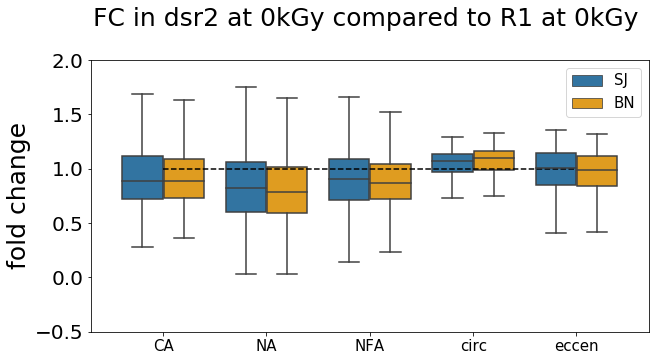

CA Ttest_indResult(statistic=0.5869971343452302, pvalue=0.5572150196997812)
NA Ttest_indResult(statistic=3.0141414162627393, pvalue=0.0025816521796576046)
NFA Ttest_indResult(statistic=4.258735524645436, pvalue=2.0691706687792685e-05)
circ Ttest_indResult(statistic=-7.511726902136346, pvalue=6.185064011050937e-14)
eccen Ttest_indResult(statistic=4.011368381431229, pvalue=6.0678945762093224e-05)


<Figure size 432x288 with 0 Axes>

In [175]:
dsr2_0k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr2_0k_r1_718,"morph": ['CA'] * len(CA_FC_dsr2_0k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr2_0k_r1_718)})
dsr2_0k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr2_0k_r1_718,"morph": ['NA'] * len(NA_FC_dsr2_0k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr2_0k_r1_718)})
dsr2_0k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr2_0k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr2_0k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr2_0k_r1_718)})
dsr2_0k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr2_0k_r1_718,"morph": ['circ'] * len(circ_FC_dsr2_0k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr2_0k_r1_718)})
dsr2_0k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr2_0k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr2_0k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr2_0k_r1_718)})
dsr2_0k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr2_0k_r1_314,"morph": ['CA'] * len(CA_FC_dsr2_0k_r1_314),
                                                   "name": ['BN'] * len(CA_FC_dsr2_0k_r1_314)})
dsr2_0k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr2_0k_r1_314,"morph": ['NA'] * len(NA_FC_dsr2_0k_r1_314),
                                                   "name": ['BN'] * len(NA_FC_dsr2_0k_r1_314)})
dsr2_0k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr2_0k_r1_314,"morph": ['NFA'] * len(NFA_FC_dsr2_0k_r1_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr2_0k_r1_314)})
dsr2_0k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr2_0k_r1_314,"morph": ['circ'] * len(circ_FC_dsr2_0k_r1_314),
                                                   "name": ['BN'] * len(circ_FC_dsr2_0k_r1_314)})
dsr2_0k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr2_0k_r1_314,"morph": ['eccen'] * len(eccen_FC_dsr2_0k_r1_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr2_0k_r1_314)})
dsr2 = dsr2_0k_r1_CA_SJ.append(dsr2_0k_r1_NA_SJ)
dsr2 = dsr2.append(dsr2_0k_r1_NFA_SJ)
dsr2 = dsr2.append(dsr2_0k_r1_circ_SJ)
dsr2 = dsr2.append(dsr2_0k_r1_eccen_SJ)
dsr2 = dsr2.append(dsr2_0k_r1_CA_BN)
dsr2 = dsr2.append(dsr2_0k_r1_NA_BN)
dsr2 = dsr2.append(dsr2_0k_r1_NFA_BN)
dsr2 = dsr2.append(dsr2_0k_r1_circ_BN)
dsr2 = dsr2.append(dsr2_0k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr2,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr2 at 0kGy compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()
plt.savefig("FC in dsr2 at 0kGy compared to R1 at 0kGy")

print('CA',stats.ttest_ind(a=CA_FC_dsr2_0k_r1_718, b=CA_FC_dsr2_0k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_0k_r1_718, b=NA_FC_dsr2_0k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_0k_r1_718, b=NFA_FC_dsr2_0k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_0k_r1_718, b=circ_FC_dsr2_0k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_0k_r1_718, b=eccen_FC_dsr2_0k_r1_314,equal_var=True))

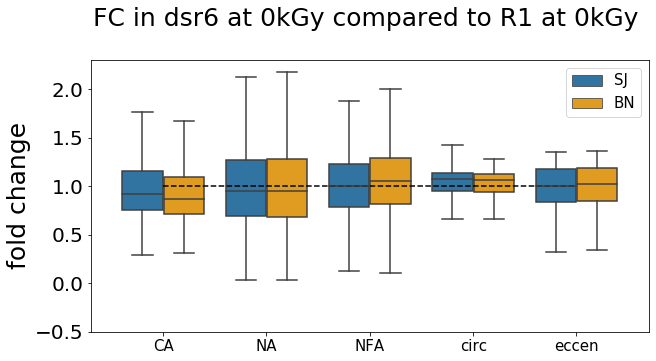

CA Ttest_indResult(statistic=9.582218211212158, pvalue=1.0748050924601537e-21)
NA Ttest_indResult(statistic=-1.3898260245925715, pvalue=0.16459953601948887)
NFA Ttest_indResult(statistic=-7.7507857832606755, pvalue=9.635141378712891e-15)
circ Ttest_indResult(statistic=1.0640996464170913, pvalue=0.28729836246109836)
eccen Ttest_indResult(statistic=-3.294892612499292, pvalue=0.0009865653434263624)


In [139]:
dsr6_0k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr6_0k_r1_718,"morph": ['CA'] * len(CA_FC_dsr6_0k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr6_0k_r1_718)})
dsr6_0k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr6_0k_r1_718,"morph": ['NA'] * len(NA_FC_dsr6_0k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr6_0k_r1_718)})
dsr6_0k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr6_0k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr6_0k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr6_0k_r1_718)})
dsr6_0k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr6_0k_r1_718,"morph": ['circ'] * len(circ_FC_dsr6_0k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr6_0k_r1_718)})
dsr6_0k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr6_0k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr6_0k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr6_0k_r1_718)})
dsr6_0k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr6_0k_r1_429,"morph": ['CA'] * len(CA_FC_dsr6_0k_r1_429),
                                                   "name": ['BN'] * len(CA_FC_dsr6_0k_r1_429)})
dsr6_0k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr6_0k_r1_429,"morph": ['NA'] * len(NA_FC_dsr6_0k_r1_429),
                                                   "name": ['BN'] * len(NA_FC_dsr6_0k_r1_429)})
dsr6_0k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr6_0k_r1_429,"morph": ['NFA'] * len(NFA_FC_dsr6_0k_r1_429),
                                                   "name": ['BN'] * len(NFA_FC_dsr6_0k_r1_429)})
dsr6_0k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr6_0k_r1_429,"morph": ['circ'] * len(circ_FC_dsr6_0k_r1_429),
                                                   "name": ['BN'] * len(circ_FC_dsr6_0k_r1_429)})
dsr6_0k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr6_0k_r1_429,"morph": ['eccen'] * len(eccen_FC_dsr6_0k_r1_429),
                                                   "name": ['BN'] * len(eccen_FC_dsr6_0k_r1_429)})
dsr6 = dsr6_0k_r1_CA_SJ.append(dsr6_0k_r1_NA_SJ)
dsr6 = dsr6.append(dsr6_0k_r1_NFA_SJ)
dsr6 = dsr6.append(dsr6_0k_r1_circ_SJ)
dsr6 = dsr6.append(dsr6_0k_r1_eccen_SJ)
dsr6 = dsr6.append(dsr6_0k_r1_CA_BN)
dsr6 = dsr6.append(dsr6_0k_r1_NA_BN)
dsr6 = dsr6.append(dsr6_0k_r1_NFA_BN)
dsr6 = dsr6.append(dsr6_0k_r1_circ_BN)
dsr6 = dsr6.append(dsr6_0k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr6,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr6 at 0kGy compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr6_0k_r1_718, b=CA_FC_dsr6_0k_r1_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_0k_r1_718, b=NA_FC_dsr6_0k_r1_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_0k_r1_718, b=NFA_FC_dsr6_0k_r1_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_0k_r1_718, b=circ_FC_dsr6_0k_r1_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_0k_r1_718, b=eccen_FC_dsr6_0k_r1_429,equal_var=True))

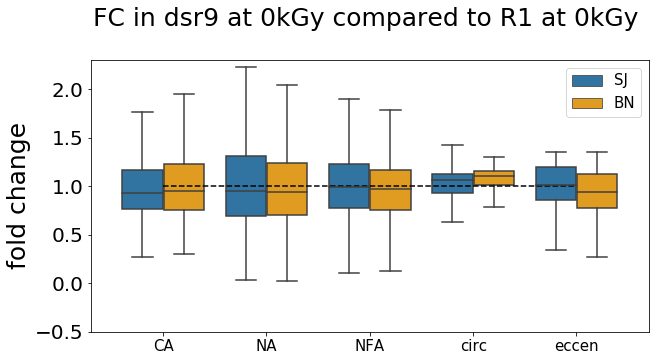

CA Ttest_indResult(statistic=-6.189209396631065, pvalue=6.227458599986672e-10)
NA Ttest_indResult(statistic=2.1186457643381584, pvalue=0.034139227938386967)
NFA Ttest_indResult(statistic=4.812896030418753, pvalue=1.504224922572089e-06)
circ Ttest_indResult(statistic=-12.53639448553067, pvalue=7.586965979251673e-36)
eccen Ttest_indResult(statistic=12.578752521837341, pvalue=4.470800069837107e-36)


In [140]:
dsr9_0k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr9_0k_r1_718,"morph": ['CA'] * len(CA_FC_dsr9_0k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr9_0k_r1_718)})
dsr9_0k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr9_0k_r1_718,"morph": ['NA'] * len(NA_FC_dsr9_0k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr9_0k_r1_718)})
dsr9_0k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr9_0k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr9_0k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr9_0k_r1_718)})
dsr9_0k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr9_0k_r1_718,"morph": ['circ'] * len(circ_FC_dsr9_0k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr9_0k_r1_718)})
dsr9_0k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr9_0k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr9_0k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr9_0k_r1_718)})
dsr9_0k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr9_0k_r1_506,"morph": ['CA'] * len(CA_FC_dsr9_0k_r1_506),
                                                   "name": ['BN'] * len(CA_FC_dsr9_0k_r1_506)})
dsr9_0k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr9_0k_r1_506,"morph": ['NA'] * len(NA_FC_dsr9_0k_r1_506),
                                                   "name": ['BN'] * len(NA_FC_dsr9_0k_r1_506)})
dsr9_0k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr9_0k_r1_506,"morph": ['NFA'] * len(NFA_FC_dsr9_0k_r1_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr9_0k_r1_506)})
dsr9_0k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr9_0k_r1_506,"morph": ['circ'] * len(circ_FC_dsr9_0k_r1_506),
                                                   "name": ['BN'] * len(circ_FC_dsr9_0k_r1_506)})
dsr9_0k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr9_0k_r1_506,"morph": ['eccen'] * len(eccen_FC_dsr9_0k_r1_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr9_0k_r1_506)})
dsr9 = dsr9_0k_r1_CA_SJ.append(dsr9_0k_r1_NA_SJ)
dsr9 = dsr9.append(dsr9_0k_r1_NFA_SJ)
dsr9 = dsr9.append(dsr9_0k_r1_circ_SJ)
dsr9 = dsr9.append(dsr9_0k_r1_eccen_SJ)
dsr9 = dsr9.append(dsr9_0k_r1_CA_BN)
dsr9 = dsr9.append(dsr9_0k_r1_NA_BN)
dsr9 = dsr9.append(dsr9_0k_r1_NFA_BN)
dsr9 = dsr9.append(dsr9_0k_r1_circ_BN)
dsr9 = dsr9.append(dsr9_0k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr9,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr9 at 0kGy compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr9_0k_r1_718, b=CA_FC_dsr9_0k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_0k_r1_718, b=NA_FC_dsr9_0k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_0k_r1_718, b=NFA_FC_dsr9_0k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_0k_r1_718, b=circ_FC_dsr9_0k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_0k_r1_718, b=eccen_FC_dsr9_0k_r1_506,equal_var=True))

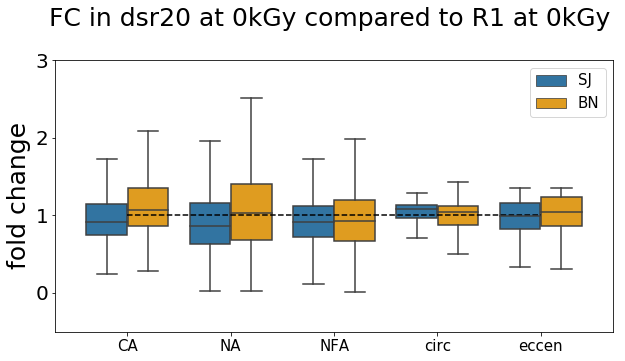

CA Ttest_indResult(statistic=-23.296259736859078, pvalue=2.2981373634354713e-117)
NA Ttest_indResult(statistic=-16.198395564143567, pvalue=2.249080190957569e-58)
NFA Ttest_indResult(statistic=-0.46750290657910987, pvalue=0.6401488715296473)
circ Ttest_indResult(statistic=11.243094752784181, pvalue=3.5411113400027974e-29)
eccen Ttest_indResult(statistic=-8.536760037058476, pvalue=1.5513750235211243e-17)


In [143]:
dsr20_0k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr20_0k_r1_718,"morph": ['CA'] * len(CA_FC_dsr20_0k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr20_0k_r1_718)})
dsr20_0k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr20_0k_r1_718,"morph": ['NA'] * len(NA_FC_dsr20_0k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr20_0k_r1_718)})
dsr20_0k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr20_0k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr20_0k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr20_0k_r1_718)})
dsr20_0k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr20_0k_r1_718,"morph": ['circ'] * len(circ_FC_dsr20_0k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr20_0k_r1_718)})
dsr20_0k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr20_0k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr20_0k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr20_0k_r1_718)})
dsr20_0k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr20_0k_r1_506,"morph": ['CA'] * len(CA_FC_dsr20_0k_r1_506),
                                                   "name": ['BN'] * len(CA_FC_dsr20_0k_r1_506)})
dsr20_0k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr20_0k_r1_506,"morph": ['NA'] * len(NA_FC_dsr20_0k_r1_506),
                                                   "name": ['BN'] * len(NA_FC_dsr20_0k_r1_506)})
dsr20_0k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr20_0k_r1_506,"morph": ['NFA'] * len(NFA_FC_dsr20_0k_r1_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr20_0k_r1_506)})
dsr20_0k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr20_0k_r1_506,"morph": ['circ'] * len(circ_FC_dsr20_0k_r1_506),
                                                   "name": ['BN'] * len(circ_FC_dsr20_0k_r1_506)})
dsr20_0k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr20_0k_r1_506,"morph": ['eccen'] * len(eccen_FC_dsr20_0k_r1_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr20_0k_r1_506)})
dsr20 = dsr20_0k_r1_CA_SJ.append(dsr20_0k_r1_NA_SJ)
dsr20 = dsr20.append(dsr20_0k_r1_NFA_SJ)
dsr20 = dsr20.append(dsr20_0k_r1_circ_SJ)
dsr20 = dsr20.append(dsr20_0k_r1_eccen_SJ)
dsr20 = dsr20.append(dsr20_0k_r1_CA_BN)
dsr20 = dsr20.append(dsr20_0k_r1_NA_BN)
dsr20 = dsr20.append(dsr20_0k_r1_NFA_BN)
dsr20 = dsr20.append(dsr20_0k_r1_circ_BN)
dsr20 = dsr20.append(dsr20_0k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr20,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr20 at 0kGy compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr20_0k_r1_718, b=CA_FC_dsr20_0k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr20_0k_r1_718, b=NA_FC_dsr20_0k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr20_0k_r1_718, b=NFA_FC_dsr20_0k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr20_0k_r1_718, b=circ_FC_dsr20_0k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr20_0k_r1_718, b=eccen_FC_dsr20_0k_r1_506,equal_var=True))

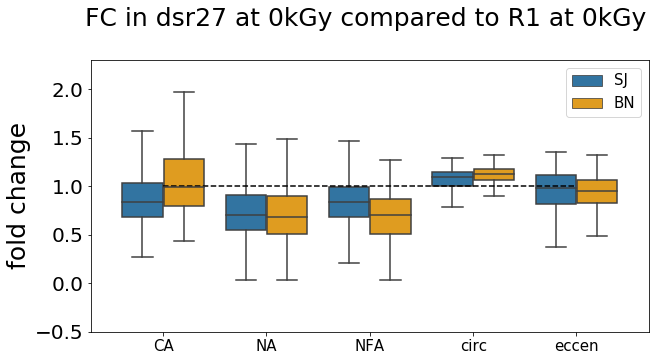

CA Ttest_indResult(statistic=-11.013831327741654, pvalue=5.865774390946357e-28)
NA Ttest_indResult(statistic=0.9798857123075967, pvalue=0.3271799019011735)
NFA Ttest_indResult(statistic=7.693402886558661, pvalue=1.6510119161535005e-14)
circ Ttest_indResult(statistic=-4.717659819724528, pvalue=2.4368394251350343e-06)
eccen Ttest_indResult(statistic=1.8777096235345518, pvalue=0.060466738878455814)


In [144]:
dsr27_0k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr27_0k_r1_718,"morph": ['CA'] * len(CA_FC_dsr27_0k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr27_0k_r1_718)})
dsr27_0k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr27_0k_r1_718,"morph": ['NA'] * len(NA_FC_dsr27_0k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr27_0k_r1_718)})
dsr27_0k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr27_0k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr27_0k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr27_0k_r1_718)})
dsr27_0k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr27_0k_r1_718,"morph": ['circ'] * len(circ_FC_dsr27_0k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr27_0k_r1_718)})
dsr27_0k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr27_0k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr27_0k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr27_0k_r1_718)})
dsr27_0k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr27_0k_r1_314,"morph": ['CA'] * len(CA_FC_dsr27_0k_r1_314),
                                                   "name": ['BN'] * len(CA_FC_dsr27_0k_r1_314)})
dsr27_0k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr27_0k_r1_314,"morph": ['NA'] * len(NA_FC_dsr27_0k_r1_314),
                                                   "name": ['BN'] * len(NA_FC_dsr27_0k_r1_314)})
dsr27_0k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr27_0k_r1_314,"morph": ['NFA'] * len(NFA_FC_dsr27_0k_r1_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr27_0k_r1_314)})
dsr27_0k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr27_0k_r1_314,"morph": ['circ'] * len(circ_FC_dsr27_0k_r1_314),
                                                   "name": ['BN'] * len(circ_FC_dsr27_0k_r1_314)})
dsr27_0k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr27_0k_r1_314,"morph": ['eccen'] * len(eccen_FC_dsr27_0k_r1_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr27_0k_r1_314)})
dsr27 = dsr27_0k_r1_CA_SJ.append(dsr27_0k_r1_NA_SJ)
dsr27 = dsr27.append(dsr27_0k_r1_NFA_SJ)
dsr27 = dsr27.append(dsr27_0k_r1_circ_SJ)
dsr27 = dsr27.append(dsr27_0k_r1_eccen_SJ)
dsr27 = dsr27.append(dsr27_0k_r1_CA_BN)
dsr27 = dsr27.append(dsr27_0k_r1_NA_BN)
dsr27 = dsr27.append(dsr27_0k_r1_NFA_BN)
dsr27 = dsr27.append(dsr27_0k_r1_circ_BN)
dsr27 = dsr27.append(dsr27_0k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr27,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr27 at 0kGy compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr27_0k_r1_718, b=CA_FC_dsr27_0k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_0k_r1_718, b=NA_FC_dsr27_0k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_0k_r1_718, b=NFA_FC_dsr27_0k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_0k_r1_718, b=circ_FC_dsr27_0k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_0k_r1_718, b=eccen_FC_dsr27_0k_r1_314,equal_var=True))

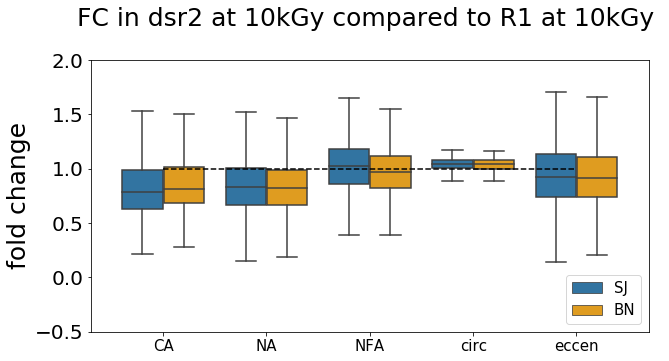

CA Ttest_indResult(statistic=-6.837859844480992, pvalue=8.447959232472575e-12)
NA Ttest_indResult(statistic=2.1816638782638993, pvalue=0.02915463867582859)
NFA Ttest_indResult(statistic=9.199234244136854, pvalue=4.228316122463553e-20)
circ Ttest_indResult(statistic=-2.856613551465022, pvalue=0.004289587554323891)
eccen Ttest_indResult(statistic=3.3159883552199654, pvalue=0.0009160404789292306)


In [176]:
dsr2_10k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_r1_718,"morph": ['CA'] * len(CA_FC_dsr2_10k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr2_10k_r1_718)})
dsr2_10k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_r1_718,"morph": ['NA'] * len(NA_FC_dsr2_10k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr2_10k_r1_718)})
dsr2_10k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr2_10k_r1_718)})
dsr2_10k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_r1_718,"morph": ['circ'] * len(circ_FC_dsr2_10k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr2_10k_r1_718)})
dsr2_10k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr2_10k_r1_718)})
dsr2_10k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_r1_314,"morph": ['CA'] * len(CA_FC_dsr2_10k_r1_314),
                                                   "name": ['BN'] * len(CA_FC_dsr2_10k_r1_314)})
dsr2_10k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_r1_314,"morph": ['NA'] * len(NA_FC_dsr2_10k_r1_314),
                                                   "name": ['BN'] * len(NA_FC_dsr2_10k_r1_314)})
dsr2_10k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_r1_314,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_r1_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr2_10k_r1_314)})
dsr2_10k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_r1_314,"morph": ['circ'] * len(circ_FC_dsr2_10k_r1_314),
                                                   "name": ['BN'] * len(circ_FC_dsr2_10k_r1_314)})
dsr2_10k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_r1_314,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_r1_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr2_10k_r1_314)})
dsr2 = dsr2_10k_r1_CA_SJ.append(dsr2_10k_r1_NA_SJ)
dsr2 = dsr2.append(dsr2_10k_r1_NFA_SJ)
dsr2 = dsr2.append(dsr2_10k_r1_circ_SJ)
dsr2 = dsr2.append(dsr2_10k_r1_eccen_SJ)
dsr2 = dsr2.append(dsr2_10k_r1_CA_BN)
dsr2 = dsr2.append(dsr2_10k_r1_NA_BN)
dsr2 = dsr2.append(dsr2_10k_r1_NFA_BN)
dsr2 = dsr2.append(dsr2_10k_r1_circ_BN)
dsr2 = dsr2.append(dsr2_10k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr2,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr2 at 10kGy compared to R1 at 10kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr2_10k_r1_718, b=CA_FC_dsr2_10k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_10k_r1_718, b=NA_FC_dsr2_10k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_10k_r1_718, b=NFA_FC_dsr2_10k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_10k_r1_718, b=circ_FC_dsr2_10k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_10k_r1_718, b=eccen_FC_dsr2_10k_r1_314,equal_var=True))

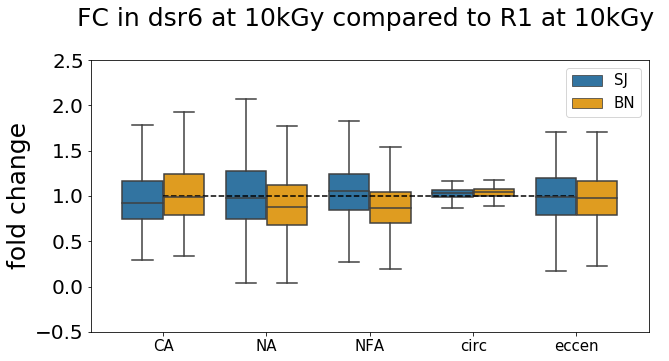

CA Ttest_indResult(statistic=-12.764268429663616, pvalue=4.152869218926409e-37)
NA Ttest_indResult(statistic=14.036639191065406, pvalue=1.844729139240238e-44)
NFA Ttest_indResult(statistic=26.04102056633895, pvalue=4.485226295073193e-146)
circ Ttest_indResult(statistic=-10.49505617558585, pvalue=1.1303067577141361e-25)
eccen Ttest_indResult(statistic=6.616737289950251, pvalue=3.803821493405165e-11)


In [177]:
dsr6_10k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_r1_718,"morph": ['CA'] * len(CA_FC_dsr6_10k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr6_10k_r1_718)})
dsr6_10k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_r1_718,"morph": ['NA'] * len(NA_FC_dsr6_10k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr6_10k_r1_718)})
dsr6_10k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr6_10k_r1_718)})
dsr6_10k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_r1_718,"morph": ['circ'] * len(circ_FC_dsr6_10k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr6_10k_r1_718)})
dsr6_10k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr6_10k_r1_718)})
dsr6_10k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_r1_429,"morph": ['CA'] * len(CA_FC_dsr6_10k_r1_429),
                                                   "name": ['BN'] * len(CA_FC_dsr6_10k_r1_429)})
dsr6_10k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_r1_429,"morph": ['NA'] * len(NA_FC_dsr6_10k_r1_429),
                                                   "name": ['BN'] * len(NA_FC_dsr6_10k_r1_429)})
dsr6_10k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_r1_429,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_r1_429),
                                                   "name": ['BN'] * len(NFA_FC_dsr6_10k_r1_429)})
dsr6_10k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_r1_429,"morph": ['circ'] * len(circ_FC_dsr6_10k_r1_429),
                                                   "name": ['BN'] * len(circ_FC_dsr6_10k_r1_429)})
dsr6_10k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_r1_429,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_r1_429),
                                                   "name": ['BN'] * len(eccen_FC_dsr6_10k_r1_429)})
dsr6 = dsr6_10k_r1_CA_SJ.append(dsr6_10k_r1_NA_SJ)
dsr6 = dsr6.append(dsr6_10k_r1_NFA_SJ)
dsr6 = dsr6.append(dsr6_10k_r1_circ_SJ)
dsr6 = dsr6.append(dsr6_10k_r1_eccen_SJ)
dsr6 = dsr6.append(dsr6_10k_r1_CA_BN)
dsr6 = dsr6.append(dsr6_10k_r1_NA_BN)
dsr6 = dsr6.append(dsr6_10k_r1_NFA_BN)
dsr6 = dsr6.append(dsr6_10k_r1_circ_BN)
dsr6 = dsr6.append(dsr6_10k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr6,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr6 at 10kGy compared to R1 at 10kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.5])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr6_10k_r1_718, b=CA_FC_dsr6_10k_r1_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_10k_r1_718, b=NA_FC_dsr6_10k_r1_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_10k_r1_718, b=NFA_FC_dsr6_10k_r1_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_10k_r1_718, b=circ_FC_dsr6_10k_r1_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_10k_r1_718, b=eccen_FC_dsr6_10k_r1_429,equal_var=True))

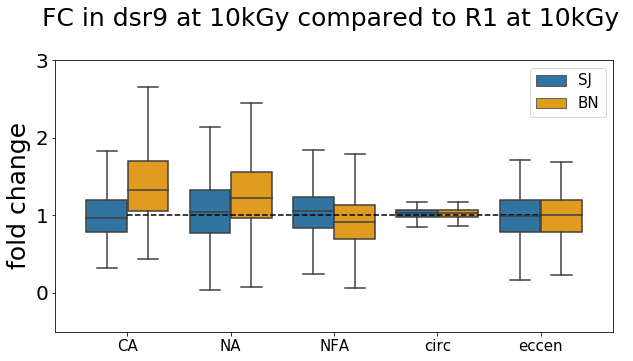

CA Ttest_indResult(statistic=-40.87053383402662, pvalue=0.0)
NA Ttest_indResult(statistic=-15.885832796056329, pvalue=4.215824251344659e-56)
NFA Ttest_indResult(statistic=10.343761576668866, pvalue=6.06717978070904e-25)
circ Ttest_indResult(statistic=0.08538911590182877, pvalue=0.9319538552956111)
eccen Ttest_indResult(statistic=1.302832344120839, pvalue=0.19266376165434052)


In [178]:
dsr9_10k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_r1_718,"morph": ['CA'] * len(CA_FC_dsr9_10k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr9_10k_r1_718)})
dsr9_10k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_r1_718,"morph": ['NA'] * len(NA_FC_dsr9_10k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr9_10k_r1_718)})
dsr9_10k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr9_10k_r1_718)})
dsr9_10k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_r1_718,"morph": ['circ'] * len(circ_FC_dsr9_10k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr9_10k_r1_718)})
dsr9_10k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr9_10k_r1_718)})
dsr9_10k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_r1_506,"morph": ['CA'] * len(CA_FC_dsr9_10k_r1_506),
                                                   "name": ['BN'] * len(CA_FC_dsr9_10k_r1_506)})
dsr9_10k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_r1_506,"morph": ['NA'] * len(NA_FC_dsr9_10k_r1_506),
                                                   "name": ['BN'] * len(NA_FC_dsr9_10k_r1_506)})
dsr9_10k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_r1_506,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_r1_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr9_10k_r1_506)})
dsr9_10k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_r1_506,"morph": ['circ'] * len(circ_FC_dsr9_10k_r1_506),
                                                   "name": ['BN'] * len(circ_FC_dsr9_10k_r1_506)})
dsr9_10k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_r1_506,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_r1_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr9_10k_r1_506)})
dsr9 = dsr9_10k_r1_CA_SJ.append(dsr9_10k_r1_NA_SJ)
dsr9 = dsr9.append(dsr9_10k_r1_NFA_SJ)
dsr9 = dsr9.append(dsr9_10k_r1_circ_SJ)
dsr9 = dsr9.append(dsr9_10k_r1_eccen_SJ)
dsr9 = dsr9.append(dsr9_10k_r1_CA_BN)
dsr9 = dsr9.append(dsr9_10k_r1_NA_BN)
dsr9 = dsr9.append(dsr9_10k_r1_NFA_BN)
dsr9 = dsr9.append(dsr9_10k_r1_circ_BN)
dsr9 = dsr9.append(dsr9_10k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr9,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr9 at 10kGy compared to R1 at 10kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr9_10k_r1_718, b=CA_FC_dsr9_10k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_10k_r1_718, b=NA_FC_dsr9_10k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_10k_r1_718, b=NFA_FC_dsr9_10k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_10k_r1_718, b=circ_FC_dsr9_10k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_10k_r1_718, b=eccen_FC_dsr9_10k_r1_506,equal_var=True))

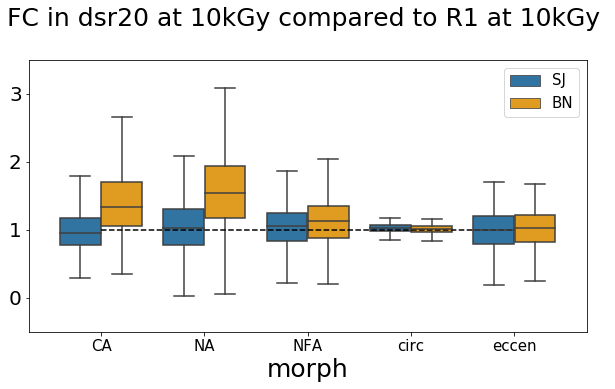

CA Ttest_indResult(statistic=-50.30715800177665, pvalue=0.0)
NA Ttest_indResult(statistic=-40.91906603459635, pvalue=0.0)
NFA Ttest_indResult(statistic=-5.825161463759614, pvalue=5.865509081841667e-09)
circ Ttest_indResult(statistic=3.307203384923765, pvalue=0.0009453437216645368)
eccen Ttest_indResult(statistic=-2.056262916182071, pvalue=0.03978070317639378)


In [151]:
dsr20_10k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_r1_718,"morph": ['CA'] * len(CA_FC_dsr20_10k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr20_10k_r1_718)})
dsr20_10k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_r1_718,"morph": ['NA'] * len(NA_FC_dsr20_10k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr20_10k_r1_718)})
dsr20_10k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr20_10k_r1_718)})
dsr20_10k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_r1_718,"morph": ['circ'] * len(circ_FC_dsr20_10k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr20_10k_r1_718)})
dsr20_10k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr20_10k_r1_718)})
dsr20_10k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_r1_506,"morph": ['CA'] * len(CA_FC_dsr20_10k_r1_506),
                                                   "name": ['BN'] * len(CA_FC_dsr20_10k_r1_506)})
dsr20_10k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_r1_506,"morph": ['NA'] * len(NA_FC_dsr20_10k_r1_506),
                                                   "name": ['BN'] * len(NA_FC_dsr20_10k_r1_506)})
dsr20_10k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_r1_506,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_r1_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr20_10k_r1_506)})
dsr20_10k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_r1_506,"morph": ['circ'] * len(circ_FC_dsr20_10k_r1_506),
                                                   "name": ['BN'] * len(circ_FC_dsr20_10k_r1_506)})
dsr20_10k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_r1_506,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_r1_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr20_10k_r1_506)})
dsr20 = dsr20_10k_r1_CA_SJ.append(dsr20_10k_r1_NA_SJ)
dsr20 = dsr20.append(dsr20_10k_r1_NFA_SJ)
dsr20 = dsr20.append(dsr20_10k_r1_circ_SJ)
dsr20 = dsr20.append(dsr20_10k_r1_eccen_SJ)
dsr20 = dsr20.append(dsr20_10k_r1_CA_BN)
dsr20 = dsr20.append(dsr20_10k_r1_NA_BN)
dsr20 = dsr20.append(dsr20_10k_r1_NFA_BN)
dsr20 = dsr20.append(dsr20_10k_r1_circ_BN)
dsr20 = dsr20.append(dsr20_10k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr20,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr20 at 10kGy compared to R1 at 10kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.ylabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3.5])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr20_10k_r1_718, b=CA_FC_dsr20_10k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr20_10k_r1_718, b=NA_FC_dsr20_10k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr20_10k_r1_718, b=NFA_FC_dsr20_10k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr20_10k_r1_718, b=circ_FC_dsr20_10k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr20_10k_r1_718, b=eccen_FC_dsr20_10k_r1_506,equal_var=True))

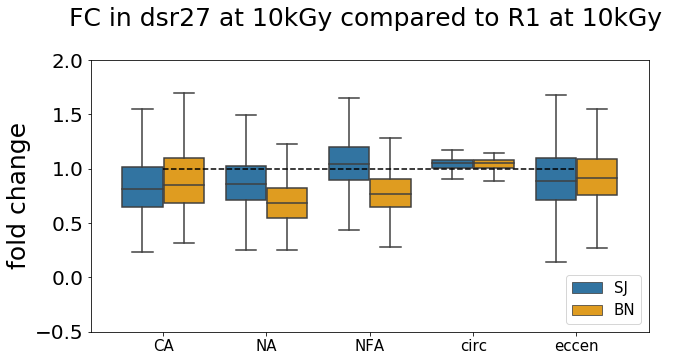

CA Ttest_indResult(statistic=-5.566993488262031, pvalue=2.674722181922154e-08)
NA Ttest_indResult(statistic=14.246048214060405, pvalue=1.6816355401332792e-45)
NFA Ttest_indResult(statistic=19.171850393035594, pvalue=3.757170991442619e-80)
circ Ttest_indResult(statistic=-2.3631897888707125, pvalue=0.018141927401296717)
eccen Ttest_indResult(statistic=0.5040980721338247, pvalue=0.6142062028225794)


In [179]:
dsr27_10k_r1_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_r1_718,"morph": ['CA'] * len(CA_FC_dsr27_10k_r1_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr27_10k_r1_718)})
dsr27_10k_r1_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_r1_718,"morph": ['NA'] * len(NA_FC_dsr27_10k_r1_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr27_10k_r1_718)})
dsr27_10k_r1_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_r1_718,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_r1_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr27_10k_r1_718)})
dsr27_10k_r1_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_r1_718,"morph": ['circ'] * len(circ_FC_dsr27_10k_r1_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr27_10k_r1_718)})
dsr27_10k_r1_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_r1_718,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_r1_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr27_10k_r1_718)})
dsr27_10k_r1_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_r1_314,"morph": ['CA'] * len(CA_FC_dsr27_10k_r1_314),
                                                   "name": ['BN'] * len(CA_FC_dsr27_10k_r1_314)})
dsr27_10k_r1_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_r1_314,"morph": ['NA'] * len(NA_FC_dsr27_10k_r1_314),
                                                   "name": ['BN'] * len(NA_FC_dsr27_10k_r1_314)})
dsr27_10k_r1_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_r1_314,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_r1_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr27_10k_r1_314)})
dsr27_10k_r1_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_r1_314,"morph": ['circ'] * len(circ_FC_dsr27_10k_r1_314),
                                                   "name": ['BN'] * len(circ_FC_dsr27_10k_r1_314)})
dsr27_10k_r1_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_r1_314,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_r1_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr27_10k_r1_314)})
dsr27 = dsr27_10k_r1_CA_SJ.append(dsr27_10k_r1_NA_SJ)
dsr27 = dsr27.append(dsr27_10k_r1_NFA_SJ)
dsr27 = dsr27.append(dsr27_10k_r1_circ_SJ)
dsr27 = dsr27.append(dsr27_10k_r1_eccen_SJ)
dsr27 = dsr27.append(dsr27_10k_r1_CA_BN)
dsr27 = dsr27.append(dsr27_10k_r1_NA_BN)
dsr27 = dsr27.append(dsr27_10k_r1_NFA_BN)
dsr27 = dsr27.append(dsr27_10k_r1_circ_BN)
dsr27 = dsr27.append(dsr27_10k_r1_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr27,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr27 at 10kGy compared to R1 at 10kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr27_10k_r1_718, b=CA_FC_dsr27_10k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_10k_r1_718, b=NA_FC_dsr27_10k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_10k_r1_718, b=NFA_FC_dsr27_10k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_10k_r1_718, b=circ_FC_dsr27_10k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_10k_r1_718, b=eccen_FC_dsr27_10k_r1_314,equal_var=True))

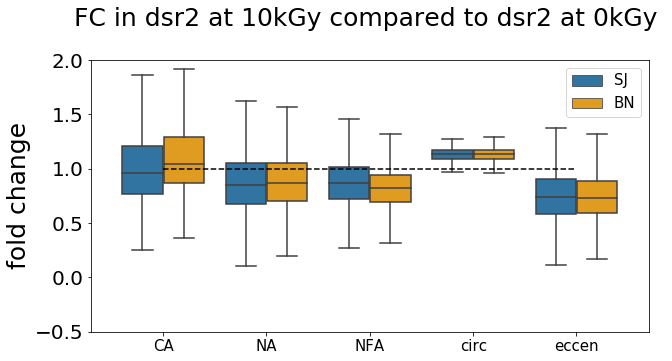

CA Ttest_indResult(statistic=-13.92396129204434, pvalue=1.0296671536567694e-43)
NA Ttest_indResult(statistic=-2.6040587281644814, pvalue=0.009224606980887425)
NFA Ttest_indResult(statistic=9.663123929583746, pvalue=5.248620575908465e-22)
circ Ttest_indResult(statistic=-3.049174788555214, pvalue=0.0022999557933971906)
eccen Ttest_indResult(statistic=1.9148229755244908, pvalue=0.055540004086484324)


In [180]:
dsr2_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_0k_314,"morph": ['CA'] * len(CA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(CA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_0k_314,"morph": ['NA'] * len(NA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(NA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_0k_314,"morph": ['circ'] * len(circ_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(circ_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr2_10k_0k_314)})
dsr2 = dsr2_10k_0k_CA_SJ.append(dsr2_10k_0k_NA_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_NFA_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_circ_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_eccen_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_CA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_NA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_NFA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_circ_BN)
dsr2 = dsr2.append(dsr2_10k_0k_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr2,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr2 at 10kGy compared to dsr2 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr2_10k_0k_718, b=CA_FC_dsr2_10k_0k_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_10k_0k_718, b=NA_FC_dsr2_10k_0k_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_10k_0k_718, b=NFA_FC_dsr2_10k_0k_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_10k_0k_718, b=circ_FC_dsr2_10k_0k_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_10k_0k_718, b=eccen_FC_dsr2_10k_0k_314,equal_var=True))

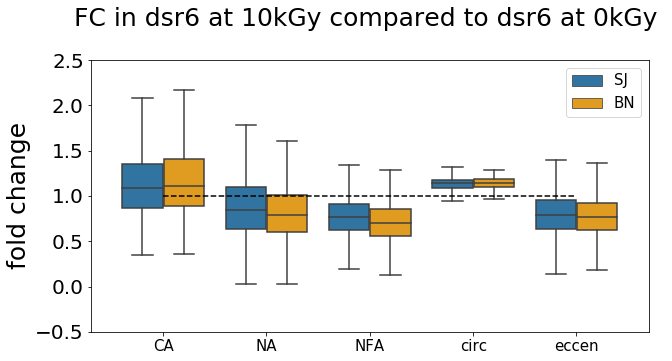

CA Ttest_indResult(statistic=-5.691364491617971, pvalue=1.2852102178864585e-08)
NA Ttest_indResult(statistic=8.233424582611331, pvalue=1.9769869071599733e-16)
NFA Ttest_indResult(statistic=12.072878332860345, pvalue=2.1415395395652953e-33)
circ Ttest_indResult(statistic=-8.4804392047301, pvalue=2.462963340150603e-17)
eccen Ttest_indResult(statistic=6.94909167143463, pvalue=3.836776506514644e-12)


In [181]:
dsr6_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_0k_429,"morph": ['CA'] * len(CA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(CA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_0k_429,"morph": ['NA'] * len(NA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(NA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_0k_429,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(NFA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_0k_429,"morph": ['circ'] * len(circ_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(circ_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_0k_429,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(eccen_FC_dsr6_10k_0k_429)})
dsr6 = dsr6_10k_0k_CA_SJ.append(dsr6_10k_0k_NA_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_NFA_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_circ_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_eccen_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_CA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_NA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_NFA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_circ_BN)
dsr6 = dsr6.append(dsr6_10k_0k_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr6,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr6 at 10kGy compared to dsr6 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.5])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr6_10k_0k_718, b=CA_FC_dsr6_10k_0k_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_10k_0k_718, b=NA_FC_dsr6_10k_0k_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_10k_0k_718, b=NFA_FC_dsr6_10k_0k_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_10k_0k_718, b=circ_FC_dsr6_10k_0k_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_10k_0k_718, b=eccen_FC_dsr6_10k_0k_429,equal_var=True))

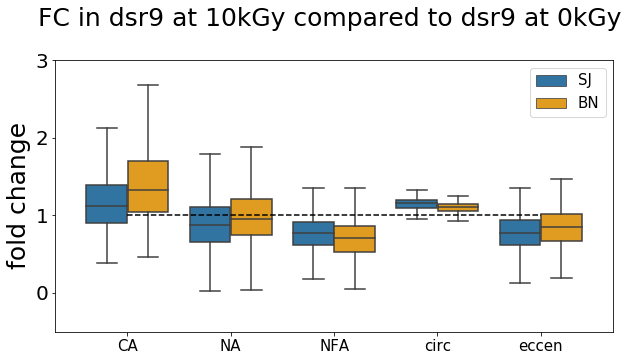

CA Ttest_indResult(statistic=-21.86859156023235, pvalue=1.851461862012982e-103)
NA Ttest_indResult(statistic=-8.207862173328625, pvalue=2.546488538223979e-16)
NFA Ttest_indResult(statistic=6.909007105186649, pvalue=5.195832909791733e-12)
circ Ttest_indResult(statistic=10.225661217823378, pvalue=2.0393595237849807e-24)
eccen Ttest_indResult(statistic=-7.787904750002865, pvalue=7.530304609145267e-15)


In [182]:
dsr9_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_0k_506,"morph": ['CA'] * len(CA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(CA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_0k_506,"morph": ['NA'] * len(NA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(NA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_0k_506,"morph": ['circ'] * len(circ_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(circ_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr9_10k_0k_506)})
dsr9 = dsr9_10k_0k_CA_SJ.append(dsr9_10k_0k_NA_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_NFA_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_circ_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_eccen_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_CA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_NA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_NFA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_circ_BN)
dsr9 = dsr9.append(dsr9_10k_0k_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr9,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr9 at 10kGy compared to dsr9 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr9_10k_0k_718, b=CA_FC_dsr9_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_10k_0k_718, b=NA_FC_dsr9_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_10k_0k_718, b=NFA_FC_dsr9_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_10k_0k_718, b=circ_FC_dsr9_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_10k_0k_718, b=eccen_FC_dsr9_10k_0k_506,equal_var=True))

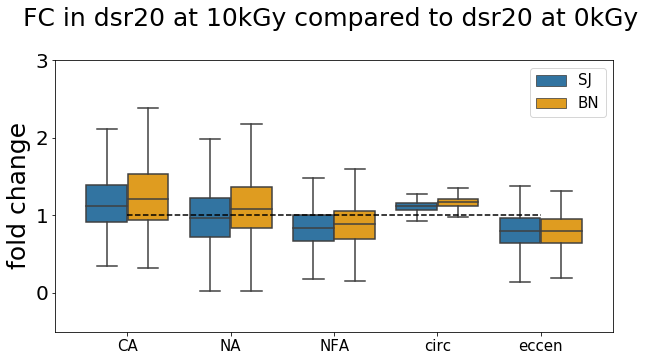

CA Ttest_indResult(statistic=-10.675009835462635, pvalue=1.7950561373561754e-26)
NA Ttest_indResult(statistic=-10.50581534882498, pvalue=1.0743970562963007e-25)
NFA Ttest_indResult(statistic=-4.990027550235087, pvalue=6.129365446365512e-07)
circ Ttest_indResult(statistic=-14.342329961692082, pvalue=3.1027533580646005e-46)
eccen Ttest_indResult(statistic=1.9363041576934124, pvalue=0.05285602460957329)


In [183]:
dsr20_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_0k_506,"morph": ['CA'] * len(CA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(CA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_0k_506,"morph": ['NA'] * len(NA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(NA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_0k_506,"morph": ['circ'] * len(circ_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(circ_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr20_10k_0k_506)})
dsr20 = dsr20_10k_0k_CA_SJ.append(dsr20_10k_0k_NA_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_NFA_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_circ_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_eccen_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_CA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_NA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_NFA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_circ_BN)
dsr20 = dsr20.append(dsr20_10k_0k_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr20,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr20 at 10kGy compared to dsr20 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr20_10k_0k_718, b=CA_FC_dsr20_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr20_10k_0k_718, b=NA_FC_dsr20_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr20_10k_0k_718, b=NFA_FC_dsr20_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr20_10k_0k_718, b=circ_FC_dsr20_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr20_10k_0k_718, b=eccen_FC_dsr20_10k_0k_506,equal_var=True))

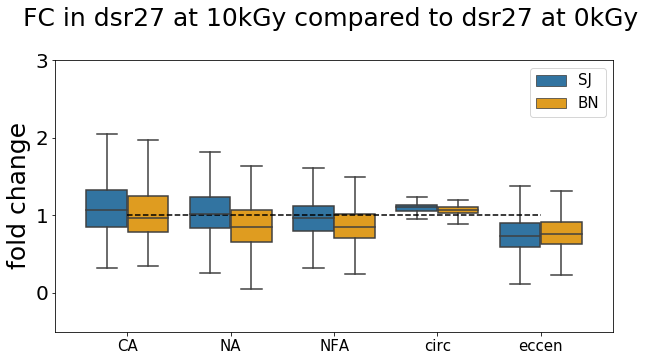

CA Ttest_indResult(statistic=5.620479266966522, pvalue=1.9676116408787177e-08)
NA Ttest_indResult(statistic=10.250299561113625, pvalue=1.665794997889665e-24)
NFA Ttest_indResult(statistic=7.562595859300998, pvalue=4.384977026927484e-14)
circ Ttest_indResult(statistic=1.6725136232101412, pvalue=0.09446178956762634)
eccen Ttest_indResult(statistic=-0.2870956456888351, pvalue=0.7740464461782997)


In [184]:
dsr27_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_0k_314,"morph": ['CA'] * len(CA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(CA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_0k_314,"morph": ['NA'] * len(NA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(NA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_0k_314,"morph": ['circ'] * len(circ_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(circ_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr27_10k_0k_314)})
dsr27 = dsr27_10k_0k_CA_SJ.append(dsr27_10k_0k_NA_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_NFA_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_circ_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_eccen_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_CA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_NA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_NFA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_circ_BN)
dsr27 = dsr27.append(dsr27_10k_0k_eccen_BN)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue", "BN": "orange"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr27,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr27 at 10kGy compared to dsr27 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('CA',stats.ttest_ind(a=CA_FC_dsr27_10k_0k_718, b=CA_FC_dsr27_10k_0k_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_10k_0k_718, b=NA_FC_dsr27_10k_0k_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_10k_0k_718, b=NFA_FC_dsr27_10k_0k_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_10k_0k_718, b=circ_FC_dsr27_10k_0k_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_10k_0k_718, b=eccen_FC_dsr27_10k_0k_314,equal_var=True))

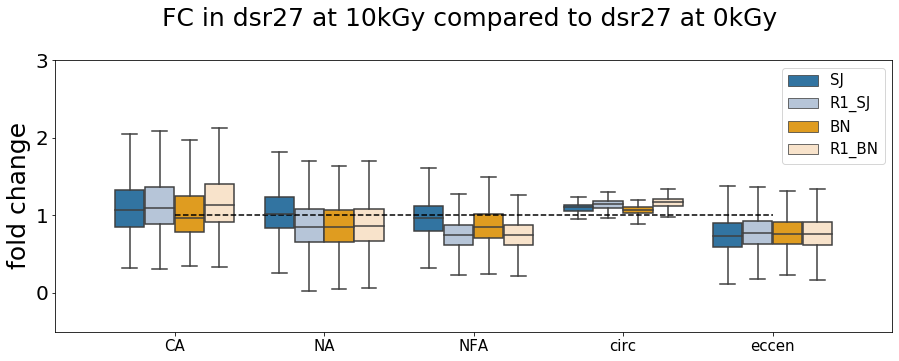

SJ vsR1_SJ
CA Ttest_indResult(statistic=-7.032437862364026, pvalue=2.1318475506691122e-12)
NA Ttest_indResult(statistic=28.353945439871847, pvalue=1.2904304249030718e-171)
NFA Ttest_indResult(statistic=40.009578736343954, pvalue=0.0)
circ Ttest_indResult(statistic=-13.459911037261119, pvalue=5.091317092470511e-41)
eccen Ttest_indResult(statistic=-5.406518874065527, pvalue=6.540565533657958e-08)
BN vs R1_BN
CA Ttest_indResult(statistic=-9.621093536279727, pvalue=9.268433003079769e-22)
NA Ttest_indResult(statistic=0.24941716895156218, pvalue=0.8030464462518456)
NFA Ttest_indResult(statistic=10.110513370029485, pvalue=7.61989044035782e-24)
circ Ttest_indResult(statistic=-12.21755441681016, pvalue=6.188992705002202e-34)
eccen Ttest_indResult(statistic=-0.8129741372357199, pvalue=0.4162643976175605)


In [191]:
dsr27_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr27_10k_0k_718)})
dsr27_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr27_10k_0k_314,"morph": ['CA'] * len(CA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(CA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr27_10k_0k_314,"morph": ['NA'] * len(NA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(NA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr27_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr27_10k_0k_314,"morph": ['circ'] * len(circ_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(circ_FC_dsr27_10k_0k_314)})
dsr27_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr27_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_dsr27_10k_0k_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr27_10k_0k_314)})
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_314,"morph": ['CA'] * len(CA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(CA_FC_r1_10k_0k_314)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_314,"morph": ['NA'] * len(NA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(NA_FC_r1_10k_0k_314)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(NFA_FC_r1_10k_0k_314)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_314,"morph": ['circ'] * len(circ_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(circ_FC_r1_10k_0k_314)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(eccen_FC_r1_10k_0k_314)})

dsr27 = dsr27_10k_0k_CA_SJ.append(dsr27_10k_0k_NA_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_NFA_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_circ_SJ)
dsr27 = dsr27.append(dsr27_10k_0k_eccen_SJ)
dsr27 = dsr27.append(r1_10k_0k_CA_jul)
dsr27 = dsr27.append(r1_10k_0k_NA_jul)
dsr27 = dsr27.append(r1_10k_0k_NFA_jul)
dsr27 = dsr27.append(r1_10k_0k_circ_jul)
dsr27 = dsr27.append(r1_10k_0k_eccen_jul)
dsr27 = dsr27.append(dsr27_10k_0k_CA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_NA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_NFA_BN)
dsr27 = dsr27.append(dsr27_10k_0k_circ_BN)
dsr27 = dsr27.append(dsr27_10k_0k_eccen_BN)
dsr27 = dsr27.append(r1_10k_0k_CA_march)
dsr27 = dsr27.append(r1_10k_0k_NA_march)
dsr27 = dsr27.append(r1_10k_0k_NFA_march)
dsr27 = dsr27.append(r1_10k_0k_circ_march)
dsr27 = dsr27.append(r1_10k_0k_eccen_march)


plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue","R1_SJ": "lightsteelblue", "BN": "orange", "R1_BN": "bisque"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr27,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr27 at 10kGy compared to dsr27 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print("SJ vsR1_SJ")
print('CA',stats.ttest_ind(a=CA_FC_dsr27_10k_0k_718, b=CA_FC_r1_10k_0k_718,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_10k_0k_718, b=NA_FC_r1_10k_0k_718,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_10k_0k_718, b=NFA_FC_r1_10k_0k_718,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_10k_0k_718, b=circ_FC_r1_10k_0k_718,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_10k_0k_718, b=eccen_FC_r1_10k_0k_718,equal_var=True))
print("BN vs R1_BN")
print('CA',stats.ttest_ind(a=CA_FC_dsr27_10k_0k_314, b=CA_FC_r1_10k_0k_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_10k_0k_314, b=NA_FC_r1_10k_0k_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_10k_0k_314, b=NFA_FC_r1_10k_0k_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_10k_0k_314, b=circ_FC_r1_10k_0k_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_10k_0k_314, b=eccen_FC_r1_10k_0k_314,equal_var=True))

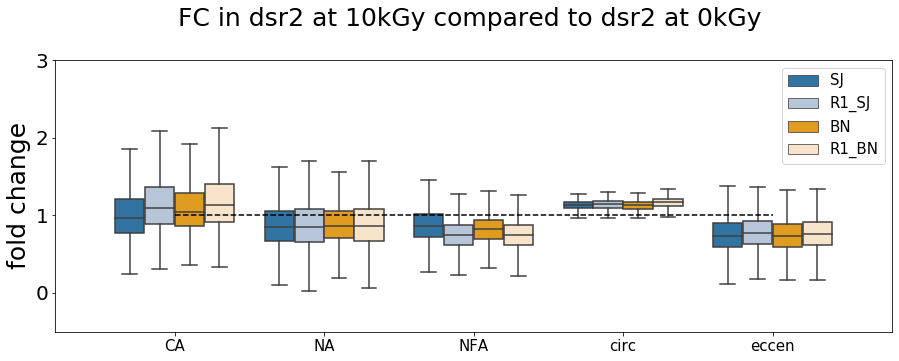

SJ vsR1_SJ
CA Ttest_indResult(statistic=-23.65898857498194, pvalue=2.8954869892807228e-121)
NA Ttest_indResult(statistic=0.2630918295779258, pvalue=0.7924838516340162)
NFA Ttest_indResult(statistic=22.8955332975112, pvalue=7.813834375648763e-114)
circ Ttest_indResult(statistic=-1.1435784263980566, pvalue=0.2528189692686408)
eccen Ttest_indResult(statistic=-6.105596637748364, pvalue=1.052507188900113e-09)
BN vs R1_BN
CA Ttest_indResult(statistic=-11.1635043021785, pvalue=9.491100861584429e-29)
NA Ttest_indResult(statistic=0.8410160200689418, pvalue=0.4003612661916198)
NFA Ttest_indResult(statistic=13.081118567637139, pvalue=9.502024948218013e-39)
circ Ttest_indResult(statistic=-9.490648919294976, pvalue=2.8852618878651616e-21)
eccen Ttest_indResult(statistic=-4.7615367210535124, pvalue=1.9511891937697362e-06)


In [196]:
dsr2_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr2_10k_0k_718)})
dsr2_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr2_10k_0k_314,"morph": ['CA'] * len(CA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(CA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr2_10k_0k_314,"morph": ['NA'] * len(NA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(NA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr2_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(NFA_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr2_10k_0k_314,"morph": ['circ'] * len(circ_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(circ_FC_dsr2_10k_0k_314)})
dsr2_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr2_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_dsr2_10k_0k_314),
                                                   "name": ['BN'] * len(eccen_FC_dsr2_10k_0k_314)})
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_314,"morph": ['CA'] * len(CA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(CA_FC_r1_10k_0k_314)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_314,"morph": ['NA'] * len(NA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(NA_FC_r1_10k_0k_314)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(NFA_FC_r1_10k_0k_314)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_314,"morph": ['circ'] * len(circ_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(circ_FC_r1_10k_0k_314)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_314),
                                                   "name": ['R1_BN'] * len(eccen_FC_r1_10k_0k_314)})

dsr2 = dsr2_10k_0k_CA_SJ.append(dsr2_10k_0k_NA_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_NFA_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_circ_SJ)
dsr2 = dsr2.append(dsr2_10k_0k_eccen_SJ)
dsr2 = dsr2.append(r1_10k_0k_CA_jul)
dsr2 = dsr2.append(r1_10k_0k_NA_jul)
dsr2 = dsr2.append(r1_10k_0k_NFA_jul)
dsr2 = dsr2.append(r1_10k_0k_circ_jul)
dsr2 = dsr2.append(r1_10k_0k_eccen_jul)
dsr2 = dsr2.append(dsr2_10k_0k_CA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_NA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_NFA_BN)
dsr2 = dsr2.append(dsr2_10k_0k_circ_BN)
dsr2 = dsr2.append(dsr2_10k_0k_eccen_BN)
dsr2 = dsr2.append(r1_10k_0k_CA_march)
dsr2 = dsr2.append(r1_10k_0k_NA_march)
dsr2 = dsr2.append(r1_10k_0k_NFA_march)
dsr2 = dsr2.append(r1_10k_0k_circ_march)
dsr2 = dsr2.append(r1_10k_0k_eccen_march)


plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue","R1_SJ": "lightsteelblue", "BN": "orange", "R1_BN": "bisque"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr2,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr2 at 10kGy compared to dsr2 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print("SJ vsR1_SJ")
print('CA',stats.ttest_ind(a=CA_FC_dsr2_10k_0k_718, b=CA_FC_r1_10k_0k_718,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_10k_0k_718, b=NA_FC_r1_10k_0k_718,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_10k_0k_718, b=NFA_FC_r1_10k_0k_718,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_10k_0k_718, b=circ_FC_r1_10k_0k_718,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_10k_0k_718, b=eccen_FC_r1_10k_0k_718,equal_var=True))
print("BN vs R1_BN")
print('CA',stats.ttest_ind(a=CA_FC_dsr2_10k_0k_314, b=CA_FC_r1_10k_0k_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr2_10k_0k_314, b=NA_FC_r1_10k_0k_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr2_10k_0k_314, b=NFA_FC_r1_10k_0k_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr2_10k_0k_314, b=circ_FC_r1_10k_0k_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr2_10k_0k_314, b=eccen_FC_r1_10k_0k_314,equal_var=True))

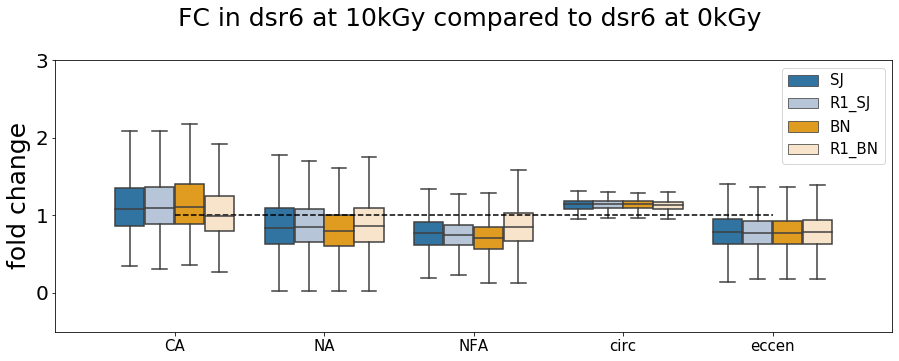

SJ vsR1_SJ
CA Ttest_indResult(statistic=-1.8275168456704083, pvalue=0.06764209177218666)
NA Ttest_indResult(statistic=1.8045650412377434, pvalue=0.07116296252079418)
NFA Ttest_indResult(statistic=4.353697447856672, pvalue=1.3475345792203484e-05)
circ Ttest_indResult(statistic=-4.043052546713823, pvalue=5.30252435817488e-05)
eccen Ttest_indResult(statistic=4.930263586086677, pvalue=8.300287094110747e-07)
BN vs R1_BN
CA Ttest_indResult(statistic=18.543734494171584, pvalue=1.0579531684737158e-75)
NA Ttest_indResult(statistic=-9.598959261458297, pvalue=9.676775793152474e-22)
NFA Ttest_indResult(statistic=-24.82250336639659, pvalue=1.1542164598407585e-132)
circ Ttest_indResult(statistic=7.181286127537646, pvalue=7.316275388566712e-13)
eccen Ttest_indResult(statistic=-3.836780015535559, pvalue=0.00012530073054248952)


In [197]:
dsr6_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr6_10k_0k_718)})
dsr6_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr6_10k_0k_429,"morph": ['CA'] * len(CA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(CA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr6_10k_0k_429,"morph": ['NA'] * len(NA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(NA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr6_10k_0k_429,"morph": ['NFA'] * len(NFA_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(NFA_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr6_10k_0k_429,"morph": ['circ'] * len(circ_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(circ_FC_dsr6_10k_0k_429)})
dsr6_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr6_10k_0k_429,"morph": ['eccen'] * len(eccen_FC_dsr6_10k_0k_429),
                                                   "name": ['BN'] * len(eccen_FC_dsr6_10k_0k_429)})
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_429,"morph": ['CA'] * len(CA_FC_r1_10k_0k_429),
                                                   "name": ['R1_BN'] * len(CA_FC_r1_10k_0k_429)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_429,"morph": ['NA'] * len(NA_FC_r1_10k_0k_429),
                                                   "name": ['R1_BN'] * len(NA_FC_r1_10k_0k_429)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_429,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_429),
                                                   "name": ['R1_BN'] * len(NFA_FC_r1_10k_0k_429)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_429,"morph": ['circ'] * len(circ_FC_r1_10k_0k_429),
                                                   "name": ['R1_BN'] * len(circ_FC_r1_10k_0k_429)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_429,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_429),
                                                   "name": ['R1_BN'] * len(eccen_FC_r1_10k_0k_429)})

dsr6 = dsr6_10k_0k_CA_SJ.append(dsr6_10k_0k_NA_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_NFA_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_circ_SJ)
dsr6 = dsr6.append(dsr6_10k_0k_eccen_SJ)
dsr6 = dsr6.append(r1_10k_0k_CA_jul)
dsr6 = dsr6.append(r1_10k_0k_NA_jul)
dsr6 = dsr6.append(r1_10k_0k_NFA_jul)
dsr6 = dsr6.append(r1_10k_0k_circ_jul)
dsr6 = dsr6.append(r1_10k_0k_eccen_jul)
dsr6 = dsr6.append(dsr6_10k_0k_CA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_NA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_NFA_BN)
dsr6 = dsr6.append(dsr6_10k_0k_circ_BN)
dsr6 = dsr6.append(dsr6_10k_0k_eccen_BN)
dsr6 = dsr6.append(r1_10k_0k_CA_march)
dsr6 = dsr6.append(r1_10k_0k_NA_march)
dsr6 = dsr6.append(r1_10k_0k_NFA_march)
dsr6 = dsr6.append(r1_10k_0k_circ_march)
dsr6 = dsr6.append(r1_10k_0k_eccen_march)


plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue","R1_SJ": "lightsteelblue", "BN": "orange", "R1_BN": "bisque"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr6,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr6 at 10kGy compared to dsr6 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print("SJ vsR1_SJ")
print('CA',stats.ttest_ind(a=CA_FC_dsr6_10k_0k_718, b=CA_FC_r1_10k_0k_718,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_10k_0k_718, b=NA_FC_r1_10k_0k_718,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_10k_0k_718, b=NFA_FC_r1_10k_0k_718,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_10k_0k_718, b=circ_FC_r1_10k_0k_718,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_10k_0k_718, b=eccen_FC_r1_10k_0k_718,equal_var=True))
print("BN vs R1_BN")
print('CA',stats.ttest_ind(a=CA_FC_dsr6_10k_0k_429, b=CA_FC_r1_10k_0k_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_10k_0k_429, b=NA_FC_r1_10k_0k_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_10k_0k_429, b=NFA_FC_r1_10k_0k_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_10k_0k_429, b=circ_FC_r1_10k_0k_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_10k_0k_429, b=eccen_FC_r1_10k_0k_429,equal_var=True))

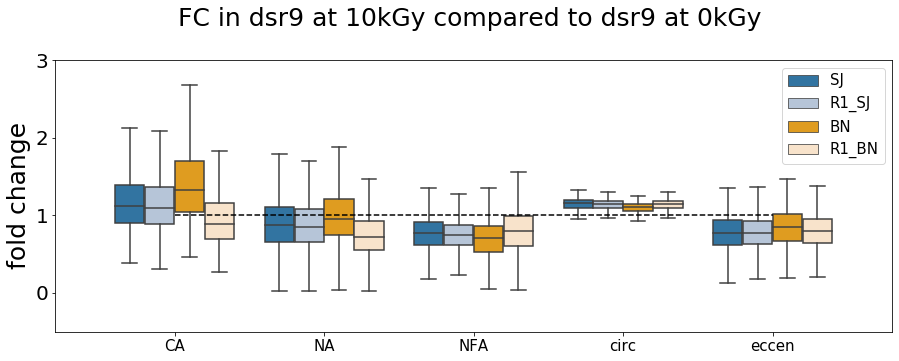

SJ vsR1_SJ
CA Ttest_indResult(statistic=4.867782122388587, pvalue=1.1416983245694286e-06)
NA Ttest_indResult(statistic=6.195507185159995, pvalue=5.983280908929768e-10)
NFA Ttest_indResult(statistic=4.471485591637445, pvalue=7.832922581634151e-06)
circ Ttest_indResult(statistic=0.8045030601475077, pvalue=0.42112106227107204)
eccen Ttest_indResult(statistic=1.4772622190471782, pvalue=0.13962933455980245)
BN vs R1_BN
CA Ttest_indResult(statistic=38.63424162832798, pvalue=7.293903100339427e-290)
NA Ttest_indResult(statistic=23.930643556557907, pvalue=1.2980503371077041e-120)
NFA Ttest_indResult(statistic=-9.470513913687533, pvalue=3.996432798783696e-21)
circ Ttest_indResult(statistic=-13.362387072827204, pvalue=4.074410247479432e-40)
eccen Ttest_indResult(statistic=6.7309049752446555, pvalue=1.85342429167264e-11)


In [198]:
dsr9_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr9_10k_0k_718)})
dsr9_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr9_10k_0k_506,"morph": ['CA'] * len(CA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(CA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr9_10k_0k_506,"morph": ['NA'] * len(NA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(NA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr9_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr9_10k_0k_506,"morph": ['circ'] * len(circ_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(circ_FC_dsr9_10k_0k_506)})
dsr9_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr9_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_dsr9_10k_0k_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr9_10k_0k_506)})
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_506,"morph": ['CA'] * len(CA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(CA_FC_r1_10k_0k_506)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_506,"morph": ['NA'] * len(NA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(NA_FC_r1_10k_0k_506)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(NFA_FC_r1_10k_0k_506)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_506,"morph": ['circ'] * len(circ_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(circ_FC_r1_10k_0k_506)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(eccen_FC_r1_10k_0k_506)})

dsr9 = dsr9_10k_0k_CA_SJ.append(dsr9_10k_0k_NA_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_NFA_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_circ_SJ)
dsr9 = dsr9.append(dsr9_10k_0k_eccen_SJ)
dsr9 = dsr9.append(r1_10k_0k_CA_jul)
dsr9 = dsr9.append(r1_10k_0k_NA_jul)
dsr9 = dsr9.append(r1_10k_0k_NFA_jul)
dsr9 = dsr9.append(r1_10k_0k_circ_jul)
dsr9 = dsr9.append(r1_10k_0k_eccen_jul)
dsr9 = dsr9.append(dsr9_10k_0k_CA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_NA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_NFA_BN)
dsr9 = dsr9.append(dsr9_10k_0k_circ_BN)
dsr9 = dsr9.append(dsr9_10k_0k_eccen_BN)
dsr9 = dsr9.append(r1_10k_0k_CA_march)
dsr9 = dsr9.append(r1_10k_0k_NA_march)
dsr9 = dsr9.append(r1_10k_0k_NFA_march)
dsr9 = dsr9.append(r1_10k_0k_circ_march)
dsr9 = dsr9.append(r1_10k_0k_eccen_march)


plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue","R1_SJ": "lightsteelblue", "BN": "orange", "R1_BN": "bisque"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr9,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr9 at 10kGy compared to dsr9 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print("SJ vsR1_SJ")
print('CA',stats.ttest_ind(a=CA_FC_dsr9_10k_0k_718, b=CA_FC_r1_10k_0k_718,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_10k_0k_718, b=NA_FC_r1_10k_0k_718,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_10k_0k_718, b=NFA_FC_r1_10k_0k_718,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_10k_0k_718, b=circ_FC_r1_10k_0k_718,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_10k_0k_718, b=eccen_FC_r1_10k_0k_718,equal_var=True))
print("BN vs R1_BN")
print('CA',stats.ttest_ind(a=CA_FC_dsr9_10k_0k_506, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_10k_0k_506, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_10k_0k_506, b=NFA_FC_r1_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_10k_0k_506, b=circ_FC_r1_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_10k_0k_506, b=eccen_FC_r1_10k_0k_506,equal_var=True))

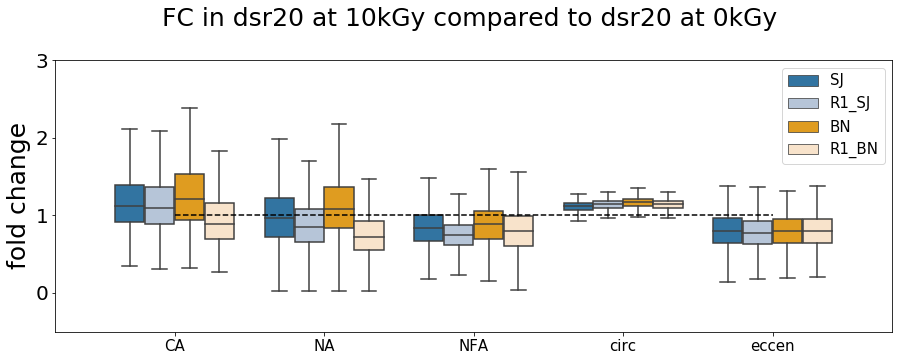

SJ vsR1_SJ
CA Ttest_indResult(statistic=5.065618657984208, pvalue=4.1246882336627267e-07)
NA Ttest_indResult(statistic=17.665801713554927, pvalue=4.6249301495201915e-69)
NFA Ttest_indResult(statistic=16.950810967516713, pvalue=8.7081046532356e-64)
circ Ttest_indResult(statistic=-9.908510061125432, pvalue=4.585673985904579e-23)
eccen Ttest_indResult(statistic=6.4981727898105195, pvalue=8.416530903790298e-11)
BN vs R1_BN
CA Ttest_indResult(statistic=33.11920873144041, pvalue=2.634989458169801e-223)
NA Ttest_indResult(statistic=36.4077857204156, pvalue=1.4769923263947657e-265)
NFA Ttest_indResult(statistic=10.105662529552738, pvalue=7.646166695837775e-24)
circ Ttest_indResult(statistic=2.8098373874964833, pvalue=0.004970657841716541)
eccen Ttest_indResult(statistic=0.9701797626266464, pvalue=0.33199102129718416)


In [199]:
dsr20_10k_0k_CA_SJ = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_0k_718,"morph": ['CA'] * len(CA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(CA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_NA_SJ = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_0k_718,"morph": ['NA'] * len(NA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(NA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_NFA_SJ = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(NFA_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_circ_SJ = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_0k_718,"morph": ['circ'] * len(circ_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(circ_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_eccen_SJ = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_0k_718),
                                                   "name": ['SJ'] * len(eccen_FC_dsr20_10k_0k_718)})
dsr20_10k_0k_CA_BN = pd.DataFrame(data={"FC": CA_FC_dsr20_10k_0k_506,"morph": ['CA'] * len(CA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(CA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_NA_BN = pd.DataFrame(data={"FC": NA_FC_dsr20_10k_0k_506,"morph": ['NA'] * len(NA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(NA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_NFA_BN = pd.DataFrame(data={"FC": NFA_FC_dsr20_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(NFA_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_circ_BN = pd.DataFrame(data={"FC": circ_FC_dsr20_10k_0k_506,"morph": ['circ'] * len(circ_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(circ_FC_dsr20_10k_0k_506)})
dsr20_10k_0k_eccen_BN = pd.DataFrame(data={"FC": eccen_FC_dsr20_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_dsr20_10k_0k_506),
                                                   "name": ['BN'] * len(eccen_FC_dsr20_10k_0k_506)})
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['R1_SJ'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_506,"morph": ['CA'] * len(CA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(CA_FC_r1_10k_0k_506)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_506,"morph": ['NA'] * len(NA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(NA_FC_r1_10k_0k_506)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(NFA_FC_r1_10k_0k_506)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_506,"morph": ['circ'] * len(circ_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(circ_FC_r1_10k_0k_506)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_506),
                                                   "name": ['R1_BN'] * len(eccen_FC_r1_10k_0k_506)})

dsr20 = dsr20_10k_0k_CA_SJ.append(dsr20_10k_0k_NA_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_NFA_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_circ_SJ)
dsr20 = dsr20.append(dsr20_10k_0k_eccen_SJ)
dsr20 = dsr20.append(r1_10k_0k_CA_jul)
dsr20 = dsr20.append(r1_10k_0k_NA_jul)
dsr20 = dsr20.append(r1_10k_0k_NFA_jul)
dsr20 = dsr20.append(r1_10k_0k_circ_jul)
dsr20 = dsr20.append(r1_10k_0k_eccen_jul)
dsr20 = dsr20.append(dsr20_10k_0k_CA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_NA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_NFA_BN)
dsr20 = dsr20.append(dsr20_10k_0k_circ_BN)
dsr20 = dsr20.append(dsr20_10k_0k_eccen_BN)
dsr20 = dsr20.append(r1_10k_0k_CA_march)
dsr20 = dsr20.append(r1_10k_0k_NA_march)
dsr20 = dsr20.append(r1_10k_0k_NFA_march)
dsr20 = dsr20.append(r1_10k_0k_circ_march)
dsr20 = dsr20.append(r1_10k_0k_eccen_march)


plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"SJ": "tab:blue","R1_SJ": "lightsteelblue", "BN": "orange", "R1_BN": "bisque"}
ax=sns.boxplot(x="morph",
            y="FC",
            hue="name",
            data=dsr20,
            palette=custom_palette,
            width=0.8,showfliers=False)
plt.title("FC in dsr20 at 10kGy compared to dsr20 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print("SJ vsR1_SJ")
print('CA',stats.ttest_ind(a=CA_FC_dsr20_10k_0k_718, b=CA_FC_r1_10k_0k_718,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr20_10k_0k_718, b=NA_FC_r1_10k_0k_718,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr20_10k_0k_718, b=NFA_FC_r1_10k_0k_718,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr20_10k_0k_718, b=circ_FC_r1_10k_0k_718,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr20_10k_0k_718, b=eccen_FC_r1_10k_0k_718,equal_var=True))
print("BN vs R1_BN")
print('CA',stats.ttest_ind(a=CA_FC_dsr20_10k_0k_506, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr20_10k_0k_506, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr20_10k_0k_506, b=NFA_FC_r1_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr20_10k_0k_506, b=circ_FC_r1_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr20_10k_0k_506, b=eccen_FC_r1_10k_0k_506,equal_var=True))

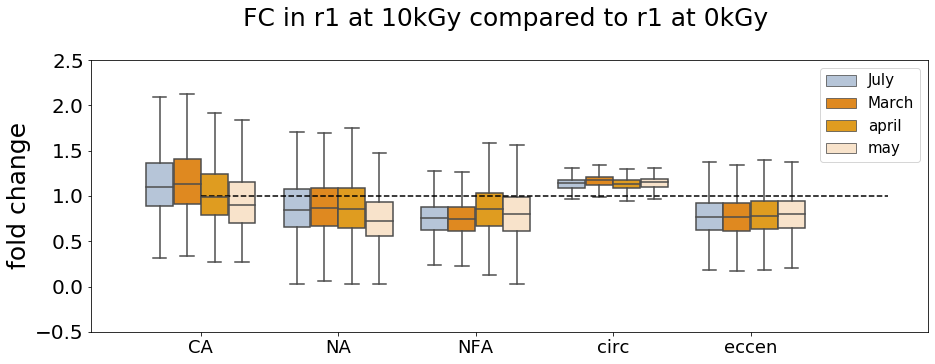

July-March
CA Ttest_indResult(statistic=-4.679833491685968, pvalue=2.9054694312806793e-06)
NA Ttest_indResult(statistic=-1.8948135085196423, pvalue=0.058143404781240346)
NFA Ttest_indResult(statistic=2.3624721209270816, pvalue=0.01817087746648761)
circ Ttest_indResult(statistic=-12.086796876852425, pvalue=2.022713950939583e-33)
eccen Ttest_indResult(statistic=2.7281898860125593, pvalue=0.006378440575964493)
July-April
CA Ttest_indResult(statistic=15.845777008432567, pvalue=5.201114924081406e-56)
NA Ttest_indResult(statistic=-3.461838957536805, pvalue=0.0005382728897968952)
NFA Ttest_indResult(statistic=-18.68519344964717, pvalue=7.075230458419509e-77)
circ Ttest_indResult(statistic=2.296953362327561, pvalue=0.021637706670308267)
eccen Ttest_indResult(statistic=-1.6606991083930207, pvalue=0.0967987067629508)
July-May
CA Ttest_indResult(statistic=25.777545420114198, pvalue=1.337101087722615e-141)
NA Ttest_indResult(statistic=15.652296048001423, pvalue=1.579763669649342e-54)
NFA Ttest_ind

In [195]:
r1_10k_0k_CA_jul = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_718,"morph": ['CA'] * len(CA_FC_r1_10k_0k_718),
                                                   "name": ['July'] * len(CA_FC_r1_10k_0k_718)})
r1_10k_0k_NA_jul = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_718,"morph": ['NA'] * len(NA_FC_r1_10k_0k_718),
                                                   "name": ['July'] * len(NA_FC_r1_10k_0k_718)})
r1_10k_0k_NFA_jul = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_718,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_718),
                                                   "name": ['July'] * len(NFA_FC_r1_10k_0k_718)})
r1_10k_0k_circ_jul = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_718,"morph": ['circ'] * len(circ_FC_r1_10k_0k_718),
                                                   "name": ['July'] * len(circ_FC_r1_10k_0k_718)})
r1_10k_0k_eccen_jul = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_718,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_718),
                                                   "name": ['July'] * len(eccen_FC_r1_10k_0k_718)})
r1_10k_0k_CA_march = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_314,"morph": ['CA'] * len(CA_FC_r1_10k_0k_314),
                                                   "name": ['March'] * len(CA_FC_r1_10k_0k_314)})
r1_10k_0k_NA_march = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_314,"morph": ['NA'] * len(NA_FC_r1_10k_0k_314),
                                                   "name": ['March'] * len(NA_FC_r1_10k_0k_314)})
r1_10k_0k_NFA_march = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_314,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_314),
                                                   "name": ['March'] * len(NFA_FC_r1_10k_0k_314)})
r1_10k_0k_circ_march = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_314,"morph": ['circ'] * len(circ_FC_r1_10k_0k_314),
                                                   "name": ['March'] * len(circ_FC_r1_10k_0k_314)})
r1_10k_0k_eccen_march = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_314,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_314),
                                                   "name": ['March'] * len(eccen_FC_r1_10k_0k_314)})
r1_10k_0k_CA_april = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_429,"morph": ['CA'] * len(CA_FC_r1_10k_0k_429),
                                                   "name": ['april'] * len(CA_FC_r1_10k_0k_429)})
r1_10k_0k_NA_april = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_429,"morph": ['NA'] * len(NA_FC_r1_10k_0k_429),
                                                   "name": ['april'] * len(NA_FC_r1_10k_0k_429)})
r1_10k_0k_NFA_april = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_429,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_429),
                                                   "name": ['april'] * len(NFA_FC_r1_10k_0k_429)})
r1_10k_0k_circ_april = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_429,"morph": ['circ'] * len(circ_FC_r1_10k_0k_429),
                                                   "name": ['april'] * len(circ_FC_r1_10k_0k_429)})
r1_10k_0k_eccen_april = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_429,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_429),
                                                   "name": ['april'] * len(eccen_FC_r1_10k_0k_429)})
r1_10k_0k_CA_may = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_506,"morph": ['CA'] * len(CA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(CA_FC_r1_10k_0k_506)})
r1_10k_0k_NA_may = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_506,"morph": ['NA'] * len(NA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(NA_FC_r1_10k_0k_506)})
r1_10k_0k_NFA_may = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(NFA_FC_r1_10k_0k_506)})
r1_10k_0k_circ_may = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_506,"morph": ['circ'] * len(circ_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(circ_FC_r1_10k_0k_506)})
r1_10k_0k_eccen_may = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(eccen_FC_r1_10k_0k_506)})
r1 = r1_10k_0k_CA_jul.append(r1_10k_0k_NA_jul)
r1 = r1.append(r1_10k_0k_NFA_jul)
r1 = r1.append(r1_10k_0k_circ_jul)
r1 = r1.append(r1_10k_0k_eccen_jul)
r1 = r1.append(r1_10k_0k_CA_march)
r1 = r1.append(r1_10k_0k_NA_march)
r1 = r1.append(r1_10k_0k_NFA_march)
r1 = r1.append(r1_10k_0k_circ_march)
r1 = r1.append(r1_10k_0k_eccen_march)
r1 = r1.append(r1_10k_0k_CA_april)
r1 = r1.append(r1_10k_0k_NA_april)
r1 = r1.append(r1_10k_0k_NFA_april)
r1 = r1.append(r1_10k_0k_circ_april)
r1 = r1.append(r1_10k_0k_eccen_april)
r1 = r1.append(r1_10k_0k_CA_may)
r1 = r1.append(r1_10k_0k_NA_may)
r1 = r1.append(r1_10k_0k_NFA_may)
r1 = r1.append(r1_10k_0k_circ_may)
r1 = r1.append(r1_10k_0k_eccen_may)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
custom_palette = {"July": "lightsteelblue", "March": "darkorange","april": "orange","may": "bisque"}
ax=sns.boxplot(x="morph",y="FC",hue="name",data=r1,
            palette=custom_palette,showfliers=False)
plt.title("FC in r1 at 10kGy compared to r1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=18)
plt.ylabel("fold change")
plt.xlabel("")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.5])
plt.legend(prop={'size':15})
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

print('July-March')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_718, b=CA_FC_r1_10k_0k_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_718, b=NA_FC_r1_10k_0k_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_718, b=NFA_FC_r1_10k_0k_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_718, b=circ_FC_r1_10k_0k_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_718, b=eccen_FC_r1_10k_0k_314,equal_var=True))
print('July-April')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_718, b=CA_FC_r1_10k_0k_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_718, b=NA_FC_r1_10k_0k_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_718, b=NFA_FC_r1_10k_0k_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_718, b=circ_FC_r1_10k_0k_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_718, b=eccen_FC_r1_10k_0k_429,equal_var=True))
print('July-May')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_718, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_718, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_718, b=NFA_FC_r1_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_718, b=circ_FC_r1_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_718, b=eccen_FC_r1_10k_0k_506,equal_var=True))
print('March-April')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_314, b=CA_FC_r1_10k_0k_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_314, b=NA_FC_r1_10k_0k_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_314, b=NFA_FC_r1_10k_0k_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_314, b=circ_FC_r1_10k_0k_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_314, b=eccen_FC_r1_10k_0k_429,equal_var=True))
print('March-May')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_314, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_314, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_314, b=NFA_FC_r1_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_314, b=circ_FC_r1_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_314, b=eccen_FC_r1_10k_0k_506,equal_var=True))
print('April-May')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_429, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_429, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_429, b=NFA_FC_r1_10k_0k_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_429, b=circ_FC_r1_10k_0k_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_429, b=eccen_FC_r1_10k_0k_506,equal_var=True))

In [ ]:
print('May-April')
print('CA',stats.ttest_ind(a=CA_FC_r1_10k_0k_429, b=CA_FC_r1_10k_0k_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_r1_10k_0k_429, b=NA_FC_r1_10k_0k_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_r1_10k_0k_429, b=NFA_FC_r1_10k_0k_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_r1_10k_0k_429, b=circ_FC_r1_10k_0k_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_r1_10k_0k_429, b=eccen_FC_r1_10k_0k_429,equal_var=True))

In [ ]:
r1_10k_0k_CA_may = pd.DataFrame(data={"FC": CA_FC_r1_10k_0k_506,"morph": ['CA'] * len(CA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(CA_FC_r1_10k_0k_506)})
r1_10k_0k_NA_may = pd.DataFrame(data={"FC": NA_FC_r1_10k_0k_506,"morph": ['NA'] * len(NA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(NA_FC_r1_10k_0k_506)})
r1_10k_0k_NFA_may = pd.DataFrame(data={"FC": NFA_FC_r1_10k_0k_506,"morph": ['NFA'] * len(NFA_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(NFA_FC_r1_10k_0k_506)})
r1_10k_0k_circ_may = pd.DataFrame(data={"FC": circ_FC_r1_10k_0k_506,"morph": ['circ'] * len(circ_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(circ_FC_r1_10k_0k_506)})
r1_10k_0k_eccen_may = pd.DataFrame(data={"FC": eccen_FC_r1_10k_0k_506,"morph": ['eccen'] * len(eccen_FC_r1_10k_0k_506),
                                                   "name": ['may'] * len(eccen_FC_r1_10k_0k_506)})

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr6_0k_r1_718,
                       NA_FC_dsr6_0k_r1_718,
                       NFA_FC_dsr6_0k_r1_718,
                       circ_FC_dsr6_0k_r1_718,
                       eccen_FC_dsr6_0k_r1_718],color="blue",saturation=0.2,showfliers=False)
plt.title("SJ dsr6 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_718_dsr6_0k, b=CA_718_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_718_dsr6_0k, b=NA_718_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_718_dsr6_0k, b=NFA_718_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_718_dsr6_0k, b=circ_718_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_718_dsr6_0k, b=eccen_718_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr6_0k_r1_718, b=CA_FC_dsr6_0k_r1_429,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr6_0k_r1_718, b=NA_FC_dsr6_0k_r1_429,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr6_0k_r1_718, b=NFA_FC_dsr6_0k_r1_429,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr6_0k_r1_718, b=circ_FC_dsr6_0k_r1_429,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr6_0k_r1_718, b=eccen_FC_dsr6_0k_r1_429,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr6_0k_r1_429,
                       NA_FC_dsr6_0k_r1_429,
                       NFA_FC_dsr6_0k_r1_429,
                       circ_FC_dsr6_0k_r1_429,
                       eccen_FC_dsr6_0k_r1_429],color="orange",saturation=0.7,showfliers=False)
plt.title("BN dsr6 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_429_dsr6_0k, b=CA_429_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_429_dsr6_0k, b=NA_429_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_429_dsr6_0k, b=NFA_429_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_429_dsr6_0k, b=circ_429_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_429_dsr6_0k, b=eccen_429_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr9_0k_r1_718, b=CA_FC_dsr9_0k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_0k_r1_718, b=NA_FC_dsr9_0k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_0k_r1_718, b=NFA_FC_dsr9_0k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_0k_r1_718, b=circ_FC_dsr9_0k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_0k_r1_718, b=eccen_FC_dsr9_0k_r1_506,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr9_0k_r1_718,
                       NA_FC_dsr9_0k_r1_718,
                       NFA_FC_dsr9_0k_r1_718,
                       circ_FC_dsr9_0k_r1_718,
                       eccen_FC_dsr9_0k_r1_718],color="blue",saturation=0.2,showfliers=False)
plt.title("SJ dsr9 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_718_dsr9_0k, b=CA_718_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_718_dsr9_0k, b=NA_718_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_718_dsr9_0k, b=NFA_718_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_718_dsr9_0k, b=circ_718_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_718_dsr9_0k, b=eccen_718_r1_0k,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr9_0k_r1_506,
                       NA_FC_dsr9_0k_r1_506,
                       NFA_FC_dsr9_0k_r1_506,
                       circ_FC_dsr9_0k_r1_506,
                       eccen_FC_dsr9_0k_r1_506],color="orange",saturation=0.7,showfliers=False)
plt.title("BN dsr9 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_506_dsr9_0k, b=CA_506_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_506_dsr9_0k, b=NA_506_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_506_dsr9_0k, b=NFA_506_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_506_dsr9_0k, b=circ_506_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_506_dsr9_0k, b=eccen_506_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr9_0k_r1_718, b=CA_FC_dsr9_0k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_0k_r1_718, b=NA_FC_dsr9_0k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_0k_r1_718, b=NFA_FC_dsr9_0k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_0k_r1_718, b=circ_FC_dsr9_0k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_0k_r1_718, b=eccen_FC_dsr9_0k_r1_506,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr20_0k_r1_718,
                       NA_FC_dsr20_0k_r1_718,
                       NFA_FC_dsr20_0k_r1_718,
                       circ_FC_dsr20_0k_r1_718,
                       eccen_FC_dsr20_0k_r1_718],color="blue",saturation=0.2,showfliers=False)
plt.title("SJ dsr20 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_718_dsr20_0k, b=CA_718_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_718_dsr20_0k, b=NA_718_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_718_dsr20_0k, b=NFA_718_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_718_dsr20_0k, b=circ_718_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_718_dsr20_0k, b=eccen_718_r1_0k,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr20_0k_r1_506,
                       NA_FC_dsr20_0k_r1_506,
                       NFA_FC_dsr20_0k_r1_506,
                       circ_FC_dsr20_0k_r1_506,
                       eccen_FC_dsr20_0k_r1_506],color="orange",saturation=0.7,showfliers=False)
plt.title("BN dsr20 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_506_dsr20_0k, b=CA_506_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_506_dsr20_0k, b=NA_506_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_506_dsr20_0k, b=NFA_506_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_506_dsr20_0k, b=circ_506_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_506_dsr20_0k, b=eccen_506_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr9_0k_r1_718, b=CA_FC_dsr9_0k_r1_506,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr9_0k_r1_718, b=NA_FC_dsr9_0k_r1_506,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr9_0k_r1_718, b=NFA_FC_dsr9_0k_r1_506,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr9_0k_r1_718, b=circ_FC_dsr9_0k_r1_506,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr9_0k_r1_718, b=eccen_FC_dsr9_0k_r1_506,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr27_0k_r1_718,
                       NA_FC_dsr27_0k_r1_718,
                       NFA_FC_dsr27_0k_r1_718,
                       circ_FC_dsr27_0k_r1_718,
                       eccen_FC_dsr27_0k_r1_718],color="blue",saturation=0.2,showfliers=False)
plt.title("SJ dsr27 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_718_dsr27_0k, b=CA_718_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_718_dsr27_0k, b=NA_718_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_718_dsr27_0k, b=NFA_718_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_718_dsr27_0k, b=circ_718_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_718_dsr27_0k, b=eccen_718_r1_0k,equal_var=True))

In [ ]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_FC_dsr27_0k_r1_314,
                       NA_FC_dsr27_0k_r1_314,
                       NFA_FC_dsr27_0k_r1_314,
                       circ_FC_dsr27_0k_r1_314,
                       eccen_FC_dsr27_0k_r1_314],color="orange",saturation=0.7,showfliers=False)
plt.title("BN dsr27 FC compared to R1 at 0kGy \n")
ax.set_xticklabels(["CA", "NA", "NFA", "circ","eccen"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA',stats.ttest_ind(a=CA_314_dsr27_0k, b=CA_314_r1_0k,equal_var=True))
print('NA',stats.ttest_ind(a=NA_314_dsr27_0k, b=NA_314_r1_0k,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_314_dsr27_0k, b=NFA_314_r1_0k,equal_var=True))
print('circ',stats.ttest_ind(a=circ_314_dsr27_0k, b=circ_314_r1_0k,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_314_dsr27_0k, b=eccen_314_r1_0k,equal_var=True))

print('CA',stats.ttest_ind(a=CA_FC_dsr27_0k_r1_718, b=CA_FC_dsr27_0k_r1_314,equal_var=True))
print('NA',stats.ttest_ind(a=NA_FC_dsr27_0k_r1_718, b=NA_FC_dsr27_0k_r1_314,equal_var=True))
print('NFA',stats.ttest_ind(a=NFA_FC_dsr27_0k_r1_718, b=NFA_FC_dsr27_0k_r1_314,equal_var=True))
print('circ',stats.ttest_ind(a=circ_FC_dsr27_0k_r1_718, b=circ_FC_dsr27_0k_r1_314,equal_var=True))
print('eccen',stats.ttest_ind(a=eccen_FC_dsr27_0k_r1_718, b=eccen_FC_dsr27_0k_r1_314,equal_var=True))